In [1]:
import sys
import os
import astropy.io.fits as fits
import math
import os.path
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
# import matplotlib as plt
import os.path
import glob
import matplotlib.pyplot as plt
import operator
from matplotlib.colors import LogNorm
from photutils.datasets import make_4gaussians_image
from photutils import centroid_com, centroid_1dg, centroid_2dg
import numpy as np
from astropy.visualization import PercentileInterval
from photutils import CircularAperture
from photutils import aperture_photometry
from astropy.io import ascii
from astropy.table import Table, Column, MaskedColumn

In [2]:
# definitions
def slicing_im(npix,box):
    npix = npix #total pixels
    box = box #changes the display of arrays
    result= (npix - box)/2
#     print(result)
#     print(result)
    if result % 1 == 0:
        end_num = int(result)
        strt_num = end_num
        new_st = strt_num
        new_end = npix - end_num
    else:
#         end_num = int(round(result,0))
        end_num = result +0.5
        strt_num = end_num - 1
        new_st = strt_num 
        new_end = npix - end_num
#     print("total pixels is: ",npix,'\nLeft side start by:',new_st,"\nRight side end by:",new_end)
    strt = int(new_st)
    end = int(new_end)
    return strt, end

def scale_image(scale,time, data_image):
    scale_num = scale
    interval = PercentileInterval(scale_num)
    interval.get_limits(data_image[time,:,:])
    scale_array = interval(data_image[time,:,:])
    return scale_array 

def diff_arr(array):
    new_array = []
    for i in range(len(array)):
        result = array[i]-i-1
        new_array.append(result)
    return new_array

def aperture_sum(radius, data, val_x, val_y):
    R = radius
    val_2dg_x = val_x
    val_2dg_y = val_y
    # for positions we will take the 2dg Gaussian outputs.
    positions = [(val_2dg_x, val_2dg_y)]
    apertures = CircularAperture(positions, r=R)
    # print(apertures)
    phot_table = aperture_photometry(data,apertures)
    return phot_table['aperture_sum']
  

In [3]:
tot_dir_bcd = ['/Users/melaniapena/Rsrch/Luhman_16_Research/bcd_files/only_bcd_part_1',
           '/Users/melaniapena/Rsrch/Luhman_16_Research/bcd_files/only_bcd_part_2',
           '/Users/melaniapena/Rsrch/Luhman_16_Research/bcd_files/only_bcd_part_3',
           '/Users/melaniapena/Rsrch/Luhman_16_Research/bcd_files/only_bcd_part_4',
           '/Users/melaniapena/Rsrch/Luhman_16_Research/bcd_files/only_bcd_part_5',
           '/Users/melaniapena/Rsrch/Luhman_16_Research/bcd_files/only_bcd_part_6-1',
           '/Users/melaniapena/Rsrch/Luhman_16_Research/bcd_files/only_bcd_part_6-2',
           '/Users/melaniapena/Rsrch/Luhman_16_Research/bcd_files/only_bcd_part_7',]


In [4]:
#Opening the file
# test with one bcd file

dir_bcd ='/Users/melaniapena/Rsrch/Luhman_16_Research/bcd_files/only_bcd_part_1/SPITZER_I1_50037760_0000_0000_2_bcd.fits'
# dir_bcd ='/Users/melaniapena/Rsrch/Luhman_16_Research/bcd_files/only_bcd_part_2/SPITZER_I2_50038016_0000_0000_2_bcd.fits'
# dir_bcd='/Users/melaniapena/Rsrch/Luhman_16_Research/bcd_files/only_bcd_part_3/SPITZER_I1_50038272_0000_0000_2_bcd.fits'

fits_file = fits.open(dir_bcd)
## displays HDUL types within the fits file.
fits_data = get_pkg_data_filename(dir_bcd)
# fits.info(fits_data)
list_Primary = fits_file[0]
# list_Primary.header
image_data= fits.getdata(fits_data, ext=0)

In [47]:
## pulls out specific information when needed.
bmjd_obs = fits_file[0].header['BMJD_OBS']
print('bmjd observation:', bmjd_obs)
bmjd_beg = fits_file[0].header['AINTBEG']
print('bmjd strt:', bmjd_beg)
bmjd_end = fits_file[0].header['ATIMEEND']
print('bmjd end:', bmjd_end)

frame_t = fits_file[0].header['FRAMTIME']
# print('Frame Time:',frame_t)
flux_conv= fits_file[0].header['FLUXCONV']
# print('Flux Conversion',flux_conv)
gain = fits_file[0].header['GAIN']
# print('Gain',gain)
exp_time= fits_file[0].header['EXPTIME']
print('Exp-time', exp_time)
conversion_factor = gain*exp_time/flux_conv
# print(conversion_factor)
counts_image = image_data * conversion_factor

bmjd observation: 56781.095898
bmjd strt: 22164318.13
bmjd end: 22164444.1
Exp-time 1.92


In [92]:
i = 0
j_final = 63

frameday = frame_t/(3600*24)
print('frame day: ',frameday)
list_bmjd=[]
shift_bmjd = bmjd_obs + 0.5* frameday
print('starting shift: ',shift_bmjd,'\n')

list_bmjd =[shift_bmjd]
# print(list_bmjd[0])
# Adding
for j in range(j_final):
    add_on_val = (j+1)*frameday
#     print(add_on_val)
    value = list_bmjd[0] + add_on_val
    list_bmjd.append(value)
#     print(value)

n =12
test = list_bmjd[n]-list_bmjd[n-1]
m = n+1
test2 =list_bmjd[m]-list_bmjd[m-1]
print(test2/test)
print(test/test2)

frame day:  2.3148148148148147e-05
starting shift:  56781.095909574076 

1.0
1.0


In [99]:
# definitions
def slicing_im(npix,box):
    npix = npix #total pixels
    box = box #changes the display of arrays
    result= (npix - box)/2
#     print(result)
#     print(result)
    if result % 1 == 0:
        end_num = int(result)
        strt_num = end_num
        new_st = strt_num
        new_end = npix - end_num
    else:
#         end_num = int(round(result,0))
        end_num = result +0.5
        strt_num = end_num - 1
        new_st = strt_num 
        new_end = npix - end_num
#     print("total pixels is: ",npix,'\nLeft side start by:',new_st,"\nRight side end by:",new_end)
    strt = int(new_st)
    end = int(new_end)
    return strt, end
print(slicing_im(32,10))
slicing_im(32,7)


def scale_image(scale,time, data_image):
    scale_num = scale
    interval = PercentileInterval(scale_num)
    interval.get_limits(data_image[time,:,:])
    scale_array = interval(data_image[time,:,:])
    return scale_array

(11, 21)


/anaconda3/envs/astroconda/lib/python3.5/site-packages/skimage/measure/_moments.py:258: UserWarning: Using deprecated 2D-only, xy-coordinate interface to moments_central. This interface will be removed in scikit-image 0.16. Use moments_central(image, center=(cr, cc), order=3).
  warn(message)


3 14 17
Box Size:  3 x 3
COM:  1.2036079943459241 1.1836054465663683
2dG:  1.2240183549098045 1.228082592859419
1 0 



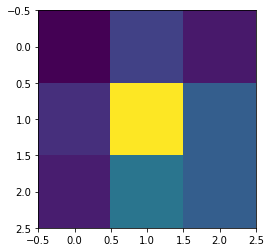

5 13 18
Box Size:  5 x 5
COM:  2.23334358450898 2.2560900544770246
2dG:  2.1881247387064806 2.2022355255965254
2 0 



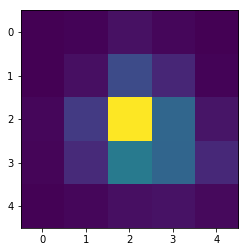

7 12 19
Box Size:  7 x 7
COM:  3.2370198341948173 3.2541745450187602
2dG:  3.1813711742139237 3.1965485875604625
3 0 



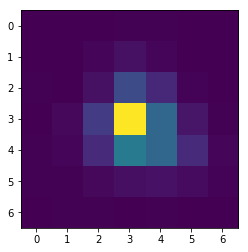

9 11 20
Box Size:  9 x 9
COM:  4.2338463190413265 4.256329669048975
2dG:  4.17904102725515 4.194564366579067
4 0 



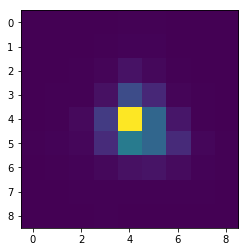

11 10 21
Box Size:  11 x 11
COM:  5.23094584035022 5.252240652382279
2dG:  5.177891432423041 5.193583262236859
5 0 



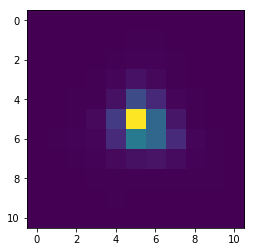

13 9 22
Box Size:  13 x 13
COM:  6.222307396857766 6.245849707642067
2dG:  6.177211276423466 6.19300240351119
6 0 



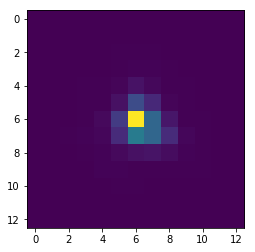

15 8 23
Box Size:  15 x 15
COM:  7.214247766353056 7.241804147599047
2dG:  7.17677821170044 7.192632508110222
7 0 



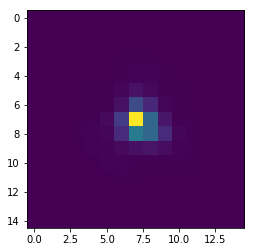

17 7 24
Box Size:  17 x 17
COM:  8.198224255747949 8.23499889099521
2dG:  8.176482703421714 8.19238007968047
8 0 



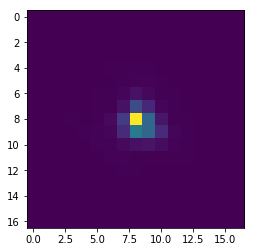

19 6 25
Box Size:  19 x 19
COM:  9.095903011610087 9.093862792107512
2dG:  9.176261805889906 9.192190651434375
9 0 



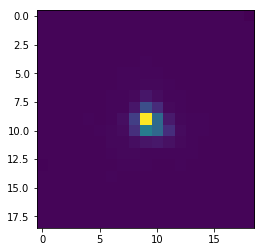

21 5 26
Box Size:  21 x 21
COM:  10.081895147051 10.080661857079955
2dG:  10.175205694977903 10.191220547611945
10 0 



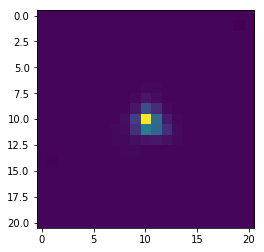

23 4 27
Box Size:  23 x 23
COM:  11.067530249871597 11.074502715952875
2dG:  11.17575248178608 11.191753176188175
11 0 



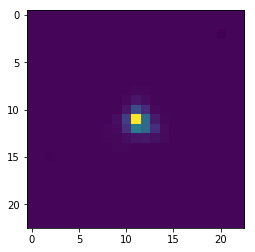

25 3 28
Box Size:  25 x 25
COM:  12.055238817593917 12.069871618912874
2dG:  12.175826173744294 12.19181818988396
12 0 



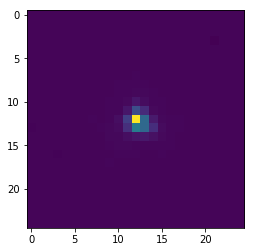

27 2 29
Box Size:  27 x 27
COM:  13.043022304275704 13.07268493526023
2dG:  13.16762252154941 13.185745065093156
13 0 



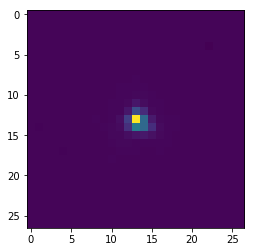

29 1 30
Box Size:  29 x 29
COM:  14.033923445206899 14.076382623279041
2dG:  14.175073150974741 14.191166465269077
14 0 



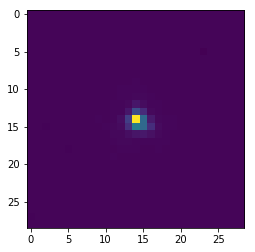

31 0 31
Box Size:  31 x 31
COM:  15.030210446561075 15.080047744392521
2dG:  15.175671303622972 15.191685825344567
15 0 



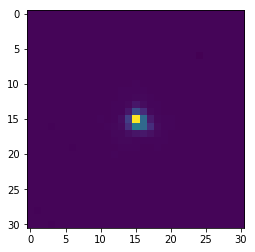

3 14 17
Box Size:  3 x 3
COM:  1.2034387665078126 1.1900321076312141
2dG:  1.2336718514267986 1.2322931470450342
16 1 



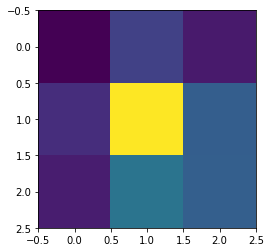

5 13 18
Box Size:  5 x 5
COM:  2.235542897167279 2.2610306511321774
2dG:  2.1954710180366876 2.205429679273407
17 1 



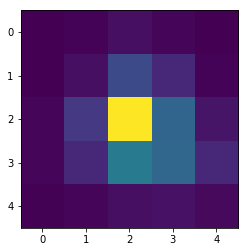

7 12 19
Box Size:  7 x 7
COM:  3.2371219109538023 3.26153579439231
2dG:  3.1884277590435675 3.199540040474066
18 1 



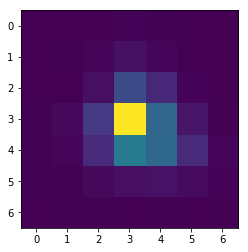

9 11 20
Box Size:  9 x 9
COM:  4.233650748332276 4.266671220113069
2dG:  4.1859975923470865 4.19747614217368
19 1 



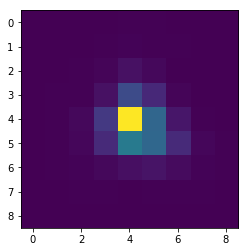

11 10 21
Box Size:  11 x 11
COM:  5.2297682173379485 5.2614312303479505
2dG:  5.184794824692332 5.196450327994908
20 1 



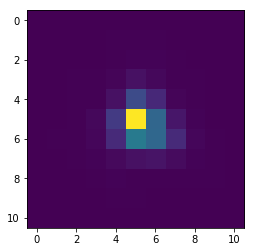

13 9 22
Box Size:  13 x 13
COM:  6.224587354133906 6.258756899755877
2dG:  6.184081661812182 6.195840975955493
21 1 



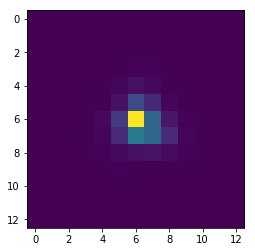

15 8 23
Box Size:  15 x 15
COM:  7.21463806649998 7.257367059112716
2dG:  7.183621727672717 7.195447602298052
22 1 



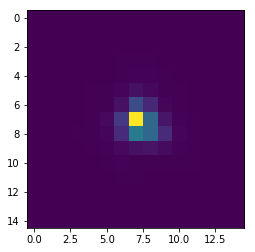

17 7 24
Box Size:  17 x 17
COM:  8.200657704757297 8.2502897059879
2dG:  8.18331486908522 8.195184999232264
23 1 



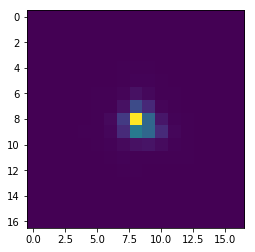

19 6 25
Box Size:  19 x 19
COM:  9.114117314323924 9.122141231613803
2dG:  9.1830527291291 9.194956121065102
24 1 



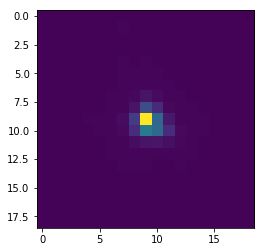

21 5 26
Box Size:  21 x 21
COM:  10.100512936179683 10.110113173638911
2dG:  10.182718533067229 10.194657540130189
25 1 



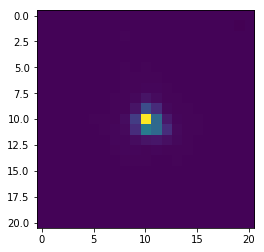

23 4 27
Box Size:  23 x 23
COM:  11.085430965486262 11.100952102053956
2dG:  11.181338275953685 11.193396362554944
26 1 



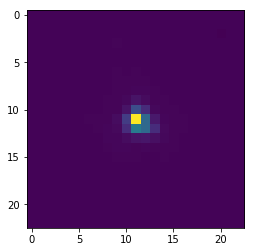

25 3 28
Box Size:  25 x 25
COM:  12.074618393389592 12.09388230728389
2dG:  12.181803479214386 12.193938035132247
27 1 



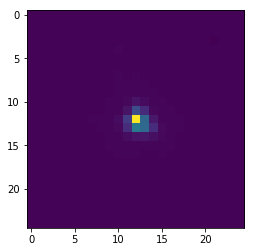

27 2 29
Box Size:  27 x 27
COM:  13.061218344940288 13.088750562735349
2dG:  13.181867707847946 13.193924814520965
28 1 



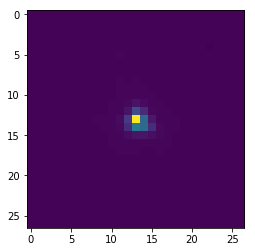

29 1 30
Box Size:  29 x 29
COM:  14.051704906194619 14.087248876281622
2dG:  14.1822334836574 14.194236666331546
29 1 



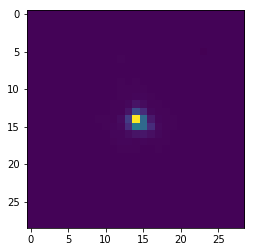

31 0 31
Box Size:  31 x 31
COM:  15.046781556957837 15.080922764265743
2dG:  15.18097049133158 15.193442017558217
30 1 



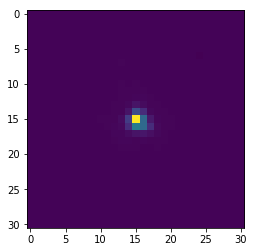

3 14 17
Box Size:  3 x 3
COM:  1.2071975187835235 1.1877249574558117
2dG:  1.2320782146359797 1.2355063500419534
31 2 



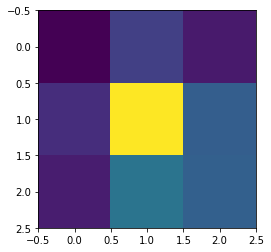

5 13 18
Box Size:  5 x 5
COM:  2.240356231384599 2.2601683589192088
2dG:  2.194129999994295 2.208319362468863
32 2 



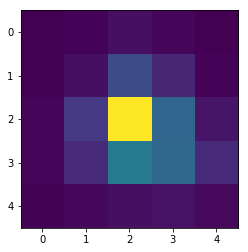

7 12 19
Box Size:  7 x 7
COM:  3.24129476226384 3.2614592690449937
2dG:  3.1871448431273532 3.2023974317032984
33 2 



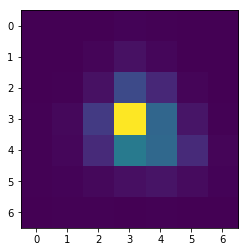

9 11 20
Box Size:  9 x 9
COM:  4.238314774244476 4.2649126242621955
2dG:  4.184732175749908 4.200326691271108
34 2 



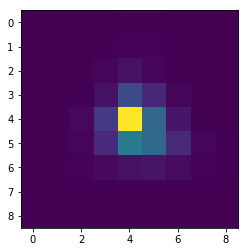

11 10 21
Box Size:  11 x 11
COM:  5.236077219545631 5.262308181803916
2dG:  5.183533559380897 5.199295097033764
35 2 



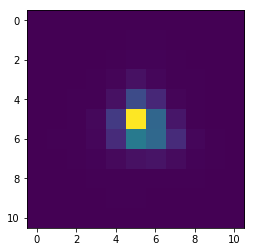

13 9 22
Box Size:  13 x 13
COM:  6.231588171607635 6.260584048033266
2dG:  6.18282544344129 6.198685094998257
36 2 



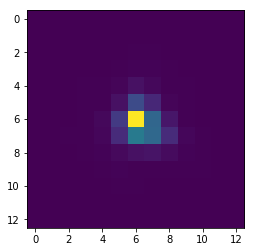

15 8 23
Box Size:  15 x 15
COM:  7.222228063078458 7.254940963379271
2dG:  7.182375575581398 7.1982973558751455
37 2 



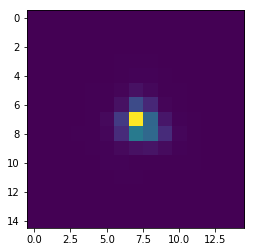

17 7 24
Box Size:  17 x 17
COM:  8.209272394479596 8.24833992522513
2dG:  8.182070402937217 8.198034291662674
38 2 



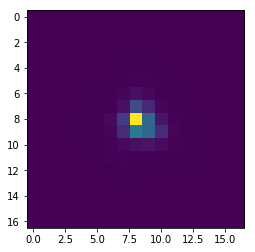

19 6 25
Box Size:  19 x 19
COM:  9.185388580308834 9.254939443013564
2dG:  9.18185572495518 9.197849221777128
39 2 



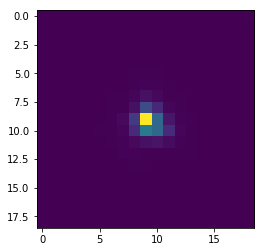

21 5 26
Box Size:  21 x 21
COM:  10.175671380723827 10.249085668086211
2dG:  10.181688959162905 10.197705455169956
40 2 



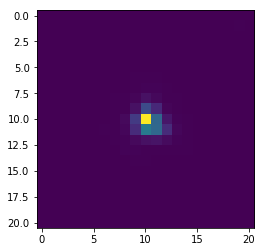

23 4 27
Box Size:  23 x 23
COM:  11.164707792202687 11.254041180777458
2dG:  11.181551878802454 11.197587202958283
41 2 



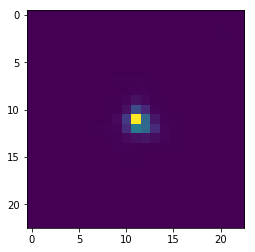

25 3 28
Box Size:  25 x 25
COM:  12.155797580171894 12.253837658254705
2dG:  12.181405647036794 12.197459656951699
42 2 



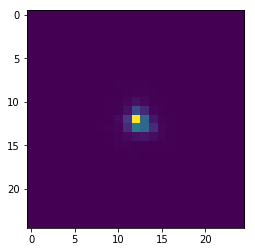

27 2 29
Box Size:  27 x 27
COM:  13.138882340700903 13.258455320627055
2dG:  13.181386968243217 13.19744515682358
43 2 



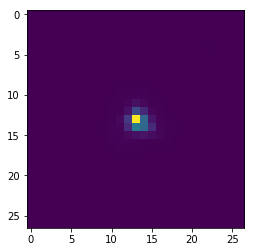

29 1 30
Box Size:  29 x 29
COM:  14.124286538250374 14.268706628420286
2dG:  14.1813185126335 14.197384639587277
44 2 



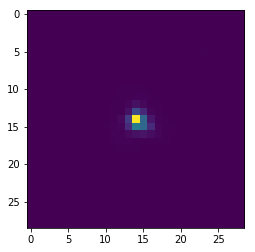

31 0 31
Box Size:  31 x 31
COM:  15.1187472970604 15.263070628941447
2dG:  15.181238097185588 15.197315856035512
45 2 



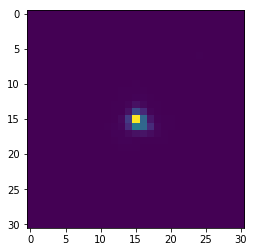

3 14 17
Box Size:  3 x 3
COM:  1.206432987531022 1.1895348773706076
2dG:  1.2326169605254789 1.2346836975248894
46 3 



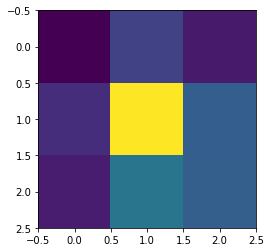

5 13 18
Box Size:  5 x 5
COM:  2.2388682625259047 2.262902266313867
2dG:  2.1951842946411357 2.2082515860387035
47 3 



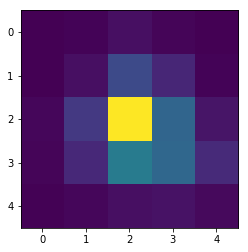

7 12 19
Box Size:  7 x 7
COM:  3.2410508638685 3.2635714217308407
2dG:  3.1881720683282393 3.202389603890292
48 3 



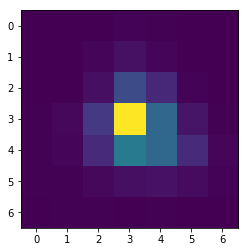

9 11 20
Box Size:  9 x 9
COM:  4.235587476700626 4.267967081668435
2dG:  4.185770250819539 4.200354071808901
49 3 



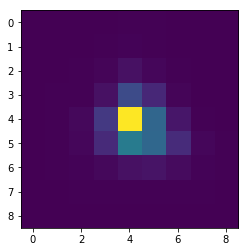

11 10 21
Box Size:  11 x 11
COM:  5.232621717457365 5.263115251573997
2dG:  5.184567862176335 5.199331681920499
50 3 



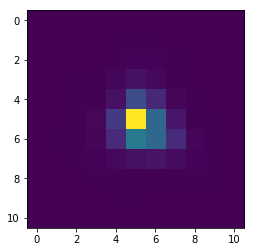

13 9 22
Box Size:  13 x 13
COM:  6.226545859338438 6.260209772712139
2dG:  6.183859137233705 6.198728270270664
51 3 



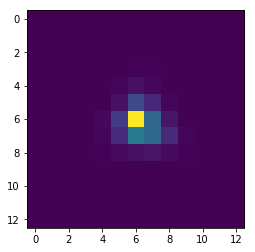

15 8 23
Box Size:  15 x 15
COM:  7.2209110993649785 7.258663005216882
2dG:  7.1834075585338075 7.19834353873498
52 3 



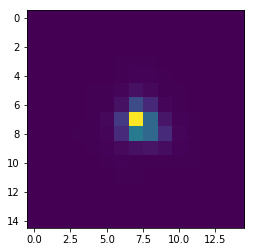

17 7 24
Box Size:  17 x 17
COM:  8.204640410174639 8.253083324130554
2dG:  8.183097708056183 8.198079472867459
53 3 



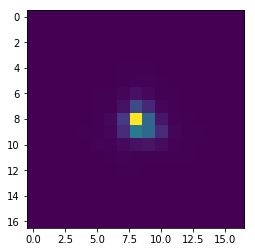

19 6 25
Box Size:  19 x 19
COM:  9.189958290817362 9.252971121438392
2dG:  9.18287790930367 9.197892118832696
54 3 



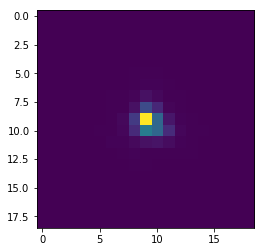

21 5 26
Box Size:  21 x 21
COM:  10.179137645839038 10.240138879407352
2dG:  10.182711716899764 10.197750446935705
55 3 



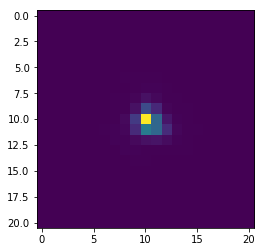

23 4 27
Box Size:  23 x 23
COM:  11.158715665765905 11.23483846721825
2dG:  11.182559573363692 11.197619570646248
56 3 



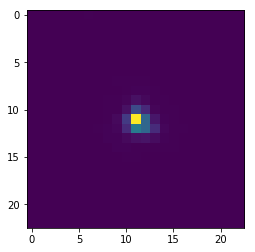

25 3 28
Box Size:  25 x 25
COM:  12.14944223359252 12.233364770987667
2dG:  12.182329939035148 12.197416802620573
57 3 



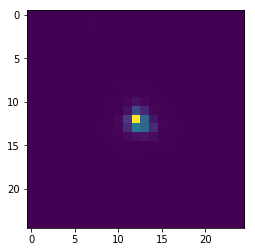

27 2 29
Box Size:  27 x 27
COM:  13.13664864372235 13.238174300426019
2dG:  13.182413168104869 13.197496063090474
58 3 



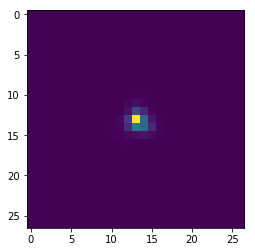

29 1 30
Box Size:  29 x 29
COM:  14.118896295102983 14.24530642082413
2dG:  14.1823438460569 14.197436776688019
59 3 



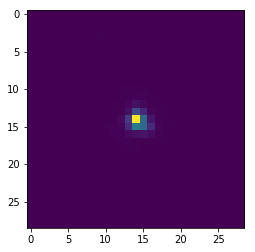

31 0 31
Box Size:  31 x 31
COM:  15.082210486135619 15.186610717625813
2dG:  15.182286542713085 15.197384748980102
60 3 



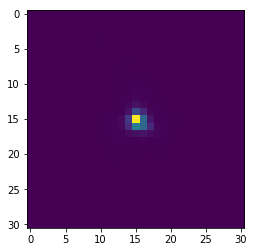

3 14 17
Box Size:  3 x 3
COM:  1.2036686596948416 1.1902082083722516
2dG:  1.2332742568533328 1.2319934387426115
61 4 



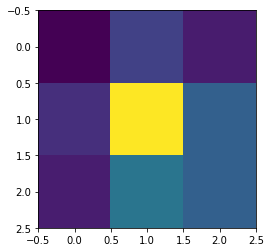

5 13 18
Box Size:  5 x 5
COM:  2.2377042693836358 2.265087093694422
2dG:  2.1961944530071893 2.205799703175641
62 4 



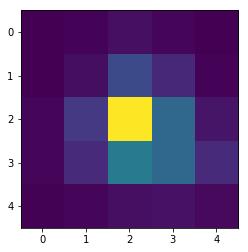

7 12 19
Box Size:  7 x 7
COM:  3.239818501939786 3.265761343785936
2dG:  3.189311773003587 3.20002733841812
63 4 



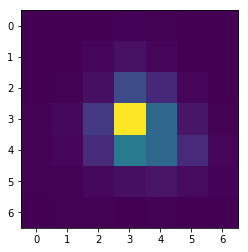

9 11 20
Box Size:  9 x 9
COM:  4.237482462097708 4.2704083776147135
2dG:  4.186931974681617 4.1980023540535205
64 4 



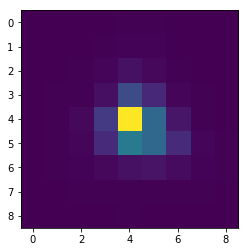

11 10 21
Box Size:  11 x 11
COM:  5.233921977439262 5.264115289018713
2dG:  5.185749396015364 5.196992225648687
65 4 



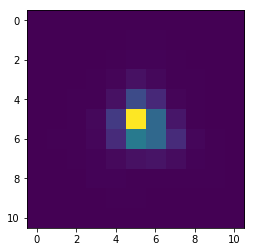

13 9 22
Box Size:  13 x 13
COM:  6.227670905754646 6.258310780694375
2dG:  6.185055935849473 6.196398922482187
66 4 



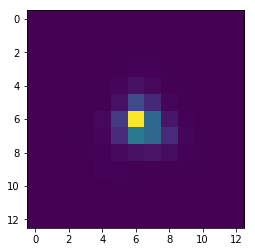

15 8 23
Box Size:  15 x 15
COM:  7.217872986876113 7.257718606269732
2dG:  7.184609970565394 7.196017051806419
67 4 



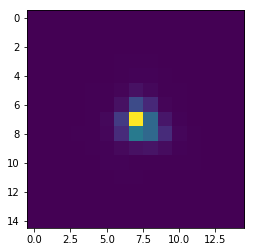

17 7 24
Box Size:  17 x 17
COM:  8.198964972111215 8.256430188508526
2dG:  8.184312772256755 8.195762438410316
68 4 



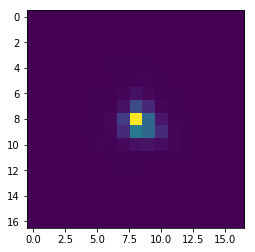

19 6 25
Box Size:  19 x 19
COM:  9.167782008957337 9.262905008605818
2dG:  9.18410875624732 9.195587747535159
69 4 



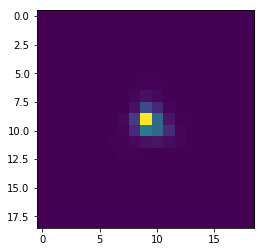

21 5 26
Box Size:  21 x 21
COM:  10.164050970984102 10.26016958034829
2dG:  10.183855730128444 10.195363882536425
70 4 



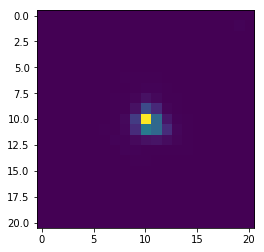

23 4 27
Box Size:  23 x 23
COM:  11.14972165292125 11.251317946728873
2dG:  11.183814879289653 11.195329202318648
71 4 



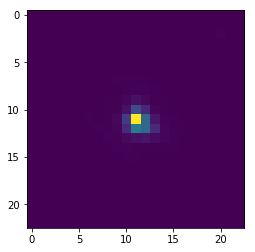

25 3 28
Box Size:  25 x 25
COM:  12.133329873237734 12.24770857910601
2dG:  12.183707578248944 12.19524246060818
72 4 



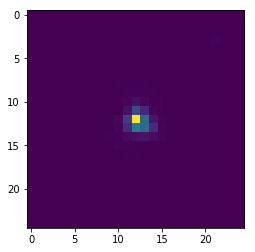

27 2 29
Box Size:  27 x 27
COM:  13.119285893713824 13.249704350321664
2dG:  13.183642779124508 13.195184981723898
73 4 



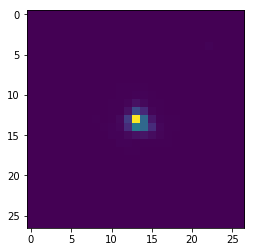

29 1 30
Box Size:  29 x 29
COM:  14.099946933475946 14.24126572341316
2dG:  14.183578886007886 14.195132553838086
74 4 



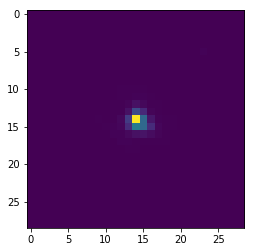

31 0 31
Box Size:  31 x 31
COM:  15.094496780189413 15.248860892432218
2dG:  15.183531809377296 15.195090592625714
75 4 



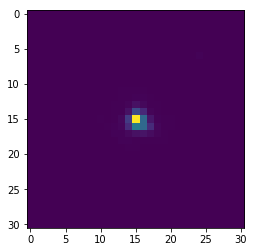

3 14 17
Box Size:  3 x 3
COM:  1.207535132928828 1.193558134246724
2dG:  1.2398005009847741 1.237410459989988
76 5 



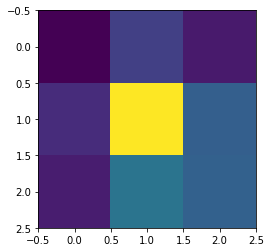

5 13 18
Box Size:  5 x 5
COM:  2.240861835906686 2.2670673656498264
2dG:  2.200622162273348 2.2099313346143594
77 5 



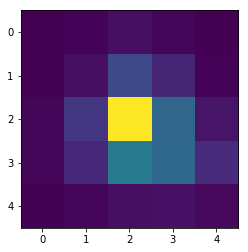

7 12 19
Box Size:  7 x 7
COM:  3.2425807344987363 3.2658849049731367
2dG:  3.193381239224765 3.2038556810303507
78 5 



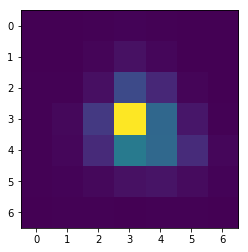

9 11 20
Box Size:  9 x 9
COM:  4.240549951927976 4.270529261219055
2dG:  4.190874666125918 4.2017197790577825
79 5 



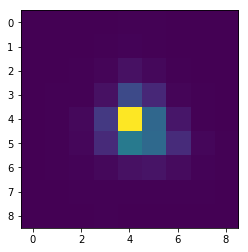

11 10 21
Box Size:  11 x 11
COM:  5.238385292028154 5.265844671084983
2dG:  5.18964508870542 5.200667649959006
80 5 



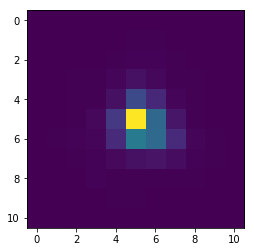

13 9 22
Box Size:  13 x 13
COM:  6.23099003761408 6.259816953277829
2dG:  6.1889183145155755 6.20004464902539
81 5 



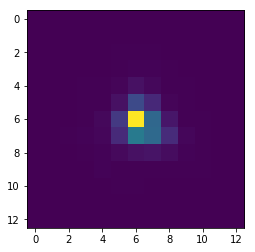

15 8 23
Box Size:  15 x 15
COM:  7.227327298619643 7.2575524711646215
2dG:  7.188454457633745 7.199646640392998
82 5 



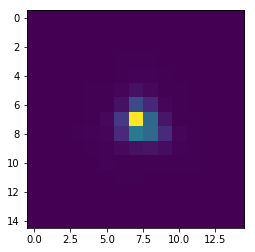

17 7 24
Box Size:  17 x 17
COM:  8.21371000787742 8.253960379136675
2dG:  8.188142767468923 8.199379031404566
83 5 



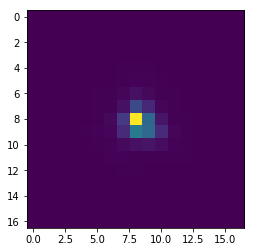

19 6 25
Box Size:  19 x 19
COM:  9.17321361874005 9.214580990825572
2dG:  9.187906794263794 9.199176183725982
84 5 



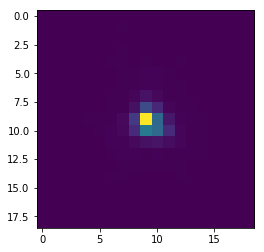

21 5 26
Box Size:  21 x 21
COM:  10.156464755994342 10.200557551827162
2dG:  10.00710078055839 10.126471734145024
85 5 



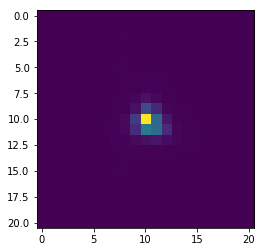

23 4 27
Box Size:  23 x 23
COM:  11.142930159217004 11.191371131023773
2dG:  11.187606873924487 11.198918374775213
86 5 



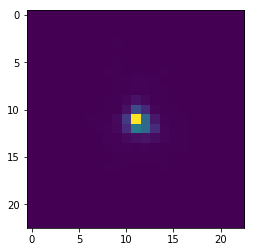

25 3 28
Box Size:  25 x 25
COM:  12.131811863029093 12.183400588326501
2dG:  12.187524382763941 12.198846283574055
87 5 



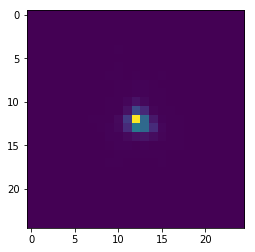

27 2 29
Box Size:  27 x 27
COM:  13.117660555760235 13.184934659670082
2dG:  13.187439681282859 13.198773406072263
88 5 



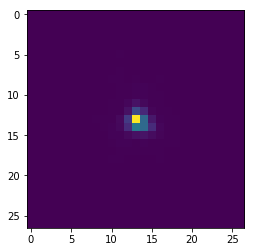

29 1 30
Box Size:  29 x 29
COM:  14.107782580525763 14.184053551149352
2dG:  14.187397835205593 14.198695875698704
89 5 



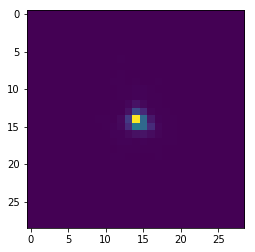

31 0 31
Box Size:  31 x 31
COM:  15.10519099846221 15.181292338722663
2dG:  15.187215524483612 15.198576928846409
90 5 



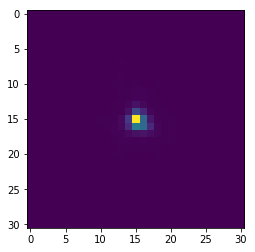

3 14 17
Box Size:  3 x 3
COM:  1.2041332298128133 1.1896069184901978
2dG:  1.2339432880918526 1.232419907280817
91 6 



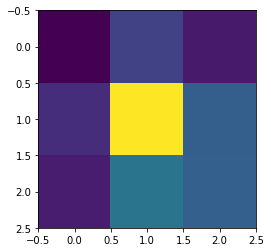

5 13 18
Box Size:  5 x 5
COM:  2.2354674417325704 2.261960188521814
2dG:  2.1952128409518976 2.205258453753303
92 6 



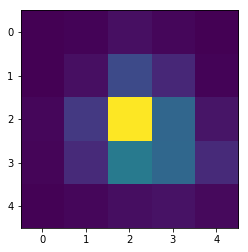

7 12 19
Box Size:  7 x 7
COM:  3.2366449511798385 3.260433409231369
2dG:  3.1881588618925485 3.199379849875729
93 6 



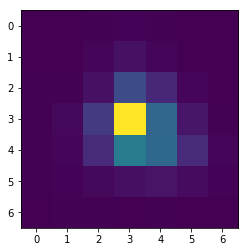

9 11 20
Box Size:  9 x 9
COM:  4.232167359456455 4.265960733204829
2dG:  4.18574552030044 4.197338651270655
94 6 



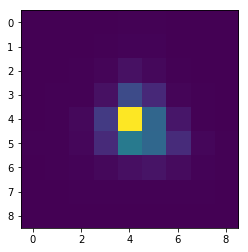

11 10 21
Box Size:  11 x 11
COM:  5.228575620668225 5.265213365533958
2dG:  5.184538120048121 5.196313525189611
95 6 



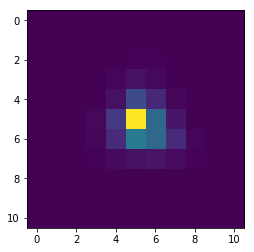

13 9 22
Box Size:  13 x 13
COM:  6.221061178716619 6.255548998931018
2dG:  6.18382630411119 6.195708180058999
96 6 



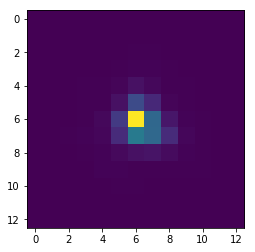

15 8 23
Box Size:  15 x 15
COM:  7.218376271431867 7.254016187556787
2dG:  7.183376075621995 7.195324984231991
97 6 



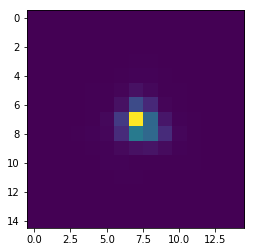

17 7 24
Box Size:  17 x 17
COM:  8.204930751990096 8.248770570581689
2dG:  8.183071547421322 8.195065682935168
98 6 



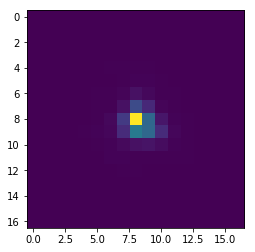

19 6 25
Box Size:  19 x 19
COM:  9.18141717290464 9.249652928254655
2dG:  9.182858073623715 9.19488378144387
99 6 



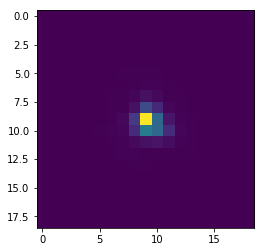

21 5 26
Box Size:  21 x 21
COM:  10.173062684112853 10.239824173788522
2dG:  10.182551773682256 10.194616220596389
100 6 



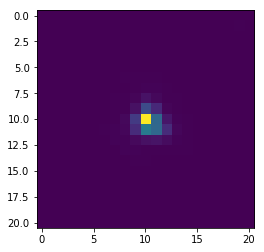

23 4 27
Box Size:  23 x 23
COM:  11.161491303211095 11.238690154261606
2dG:  11.182557990967748 11.1946272258654
101 6 



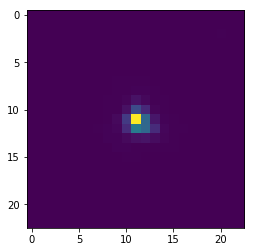

25 3 28
Box Size:  25 x 25
COM:  12.149376660975953 12.237905501259851
2dG:  12.182462074029202 12.194546614305125
102 6 



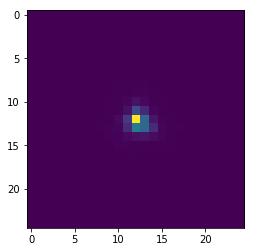

27 2 29
Box Size:  27 x 27
COM:  13.147737065139145 13.241051385183777
2dG:  13.182314890389524 13.194415091961842
103 6 



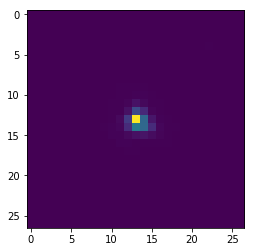

29 1 30
Box Size:  29 x 29
COM:  14.127235521526416 14.229142760179476
2dG:  14.182284241993905 14.194389118639165
104 6 



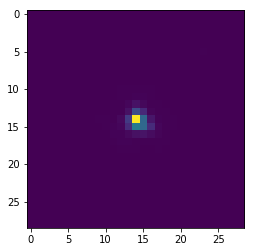

31 0 31
Box Size:  31 x 31
COM:  15.123443244719471 15.223639396846893
2dG:  15.18227027643072 15.194381554525773
105 6 



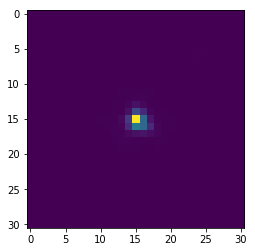

3 14 17
Box Size:  3 x 3
COM:  1.1945182011580762 1.189224746666206
2dG:  1.2318454085486936 1.221093169191894
106 7 



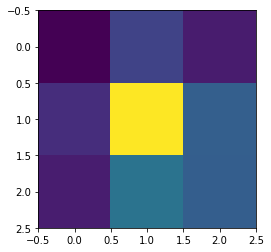

5 13 18
Box Size:  5 x 5
COM:  2.225426733556049 2.2612610647499705
2dG:  2.192918233483391 2.194832464866734
107 7 



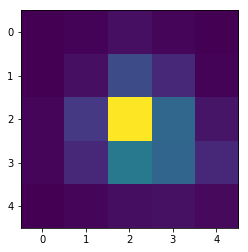

7 12 19
Box Size:  7 x 7
COM:  3.2278027384512327 3.264565350649976
2dG:  3.1859585016514416 3.1892271340912512
108 7 



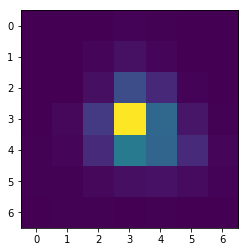

9 11 20
Box Size:  9 x 9
COM:  4.222514592082675 4.264502577801599
2dG:  4.1835976076982035 4.187289515245899
109 7 



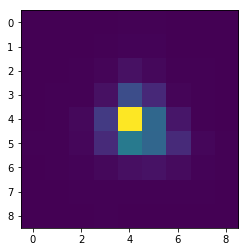

11 10 21
Box Size:  11 x 11
COM:  5.220414954854425 5.261733243761719
2dG:  5.182414011557738 5.186312585590232
110 7 



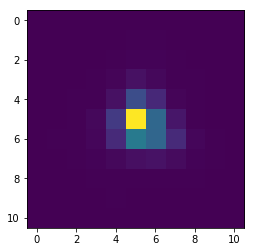

13 9 22
Box Size:  13 x 13
COM:  6.213658943774551 6.2562385983101345
2dG:  6.181706032354825 6.1857266674404
111 7 



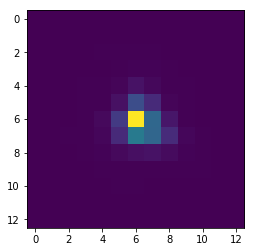

15 8 23
Box Size:  15 x 15
COM:  7.203953154775181 7.2502089090584825
2dG:  7.181257211008923 7.185354684057674
112 7 



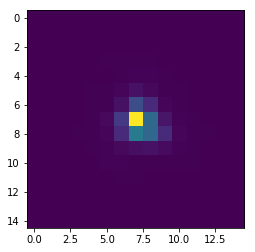

17 7 24
Box Size:  17 x 17
COM:  8.188654505410563 8.248673016377804
2dG:  8.180953890943494 8.18510304440036
113 7 



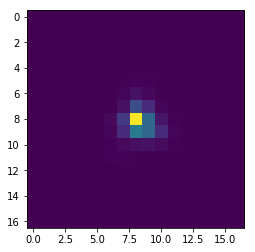

19 6 25
Box Size:  19 x 19
COM:  9.148612552204321 9.191079455437258
2dG:  9.17938547978802 9.183639524279885
114 7 



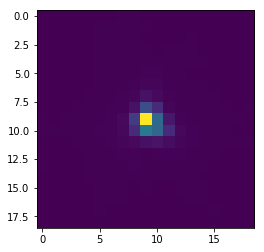

21 5 26
Box Size:  21 x 21
COM:  10.13469596420172 10.173939241677216
2dG:  10.176018482559662 10.180844224760774
115 7 



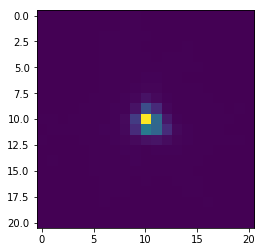

23 4 27
Box Size:  23 x 23
COM:  11.124499496135178 11.161452768287054
2dG:  11.180137814847065 11.184389573975018
116 7 



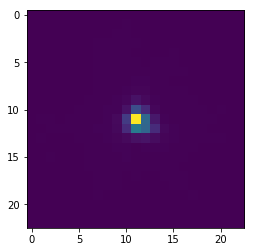

25 3 28
Box Size:  25 x 25
COM:  12.111375530498465 12.154782972601295
2dG:  12.18035058871891 12.184599810061561
117 7 



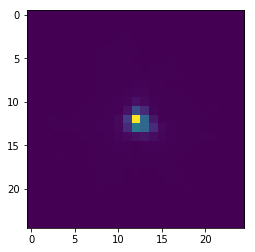

27 2 29
Box Size:  27 x 27
COM:  13.100888815117166 13.147883211907642
2dG:  13.177914802329651 13.182840813749918
118 7 



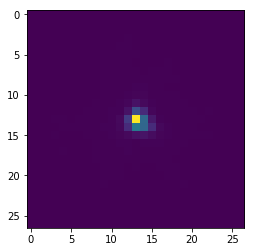

29 1 30
Box Size:  29 x 29
COM:  14.083872793558415 14.141257113226496
2dG:  14.180204329093224 14.184480255916117
119 7 



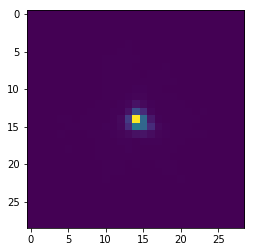

31 0 31
Box Size:  31 x 31
COM:  15.077651683011357 15.139663052591356
2dG:  15.17992191858881 15.18419259992566
120 7 



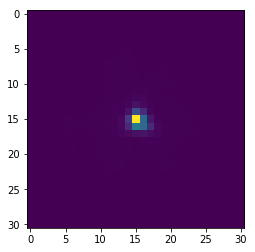

3 14 17
Box Size:  3 x 3
COM:  1.2051597629819022 1.1897904837580378
2dG:  1.232792150481217 1.2325675277471153
121 8 



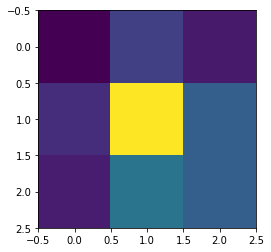

5 13 18
Box Size:  5 x 5
COM:  2.2365421250511033 2.2606594540954785
2dG:  2.1950193257118027 2.2056638768627725
122 8 



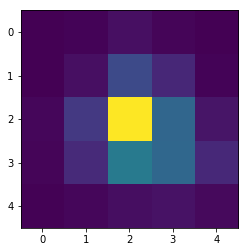

7 12 19
Box Size:  7 x 7
COM:  3.2376670535656062 3.2617939917466665
2dG:  3.1880754401094915 3.1998101709125373
123 8 



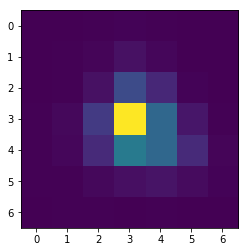

9 11 20
Box Size:  9 x 9
COM:  4.234839008337306 4.268714498621141
2dG:  4.185717992511848 4.197795082110335
124 8 



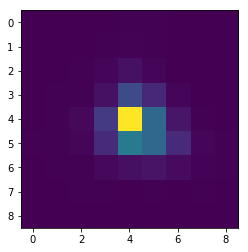

11 10 21
Box Size:  11 x 11
COM:  5.230680257128032 5.262864386302292
2dG:  5.184530956170164 5.19677677525188
125 8 



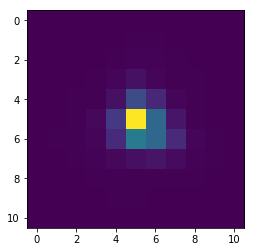

13 9 22
Box Size:  13 x 13
COM:  6.222537767532526 6.2572732350756155
2dG:  6.183829582071824 6.196174230226826
126 8 



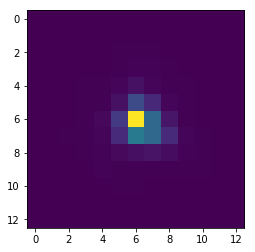

15 8 23
Box Size:  15 x 15
COM:  7.214903212378775 7.258230668253728
2dG:  7.183385359477342 7.195792307803134
127 8 



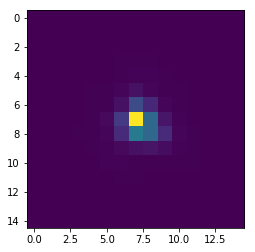

17 7 24
Box Size:  17 x 17
COM:  8.201721482035959 8.254173847896638
2dG:  8.183087285899406 8.195535924761263
128 8 



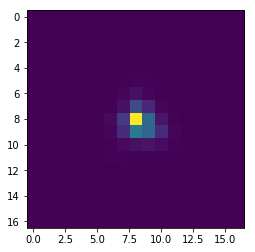

19 6 25
Box Size:  19 x 19
COM:  9.174023526488813 9.264807481543777
2dG:  9.181371809323453 9.194568246851711
129 8 



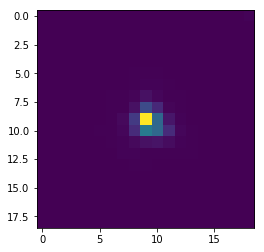

21 5 26
Box Size:  21 x 21
COM:  10.150870589037108 10.231698809491977
2dG:  10.182701649775698 10.195201429560319
130 8 



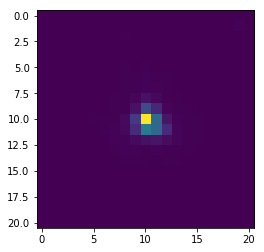

23 4 27
Box Size:  23 x 23
COM:  11.148934070754846 11.22932054299445
2dG:  11.182096273701557 11.194667106297391
131 8 



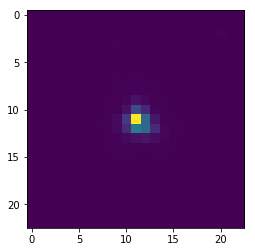

25 3 28
Box Size:  25 x 25
COM:  12.133922197601972 12.22048266756377
2dG:  12.182488915593618 12.195020235933328
132 8 



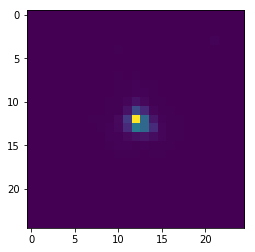

27 2 29
Box Size:  27 x 27
COM:  13.1233801921539 13.212802187208723
2dG:  13.182406952213753 13.194947764124029
133 8 



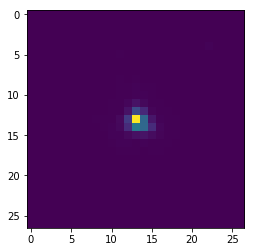

29 1 30
Box Size:  29 x 29
COM:  14.07855217000094 14.191289709045764
2dG:  14.182351488386542 14.194901691825299
134 8 



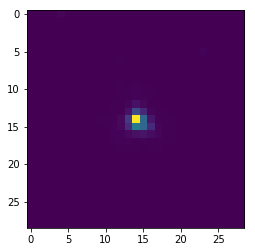

31 0 31
Box Size:  31 x 31
COM:  15.071303387009486 15.191012139331773
2dG:  15.18229200012441 15.194849502121086
135 8 



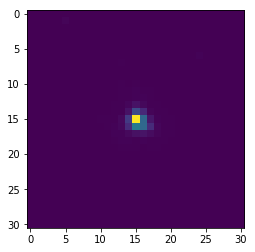

3 14 17
Box Size:  3 x 3
COM:  1.2099590404500613 1.1901975605038837
2dG:  1.2352051108911064 1.2412203892192615
136 9 



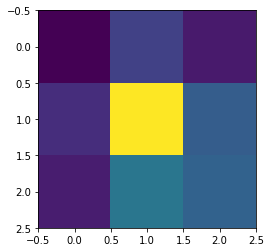

5 13 18
Box Size:  5 x 5
COM:  2.2445222662824613 2.264531994066333
2dG:  2.196672218600968 2.213597496982627
137 9 



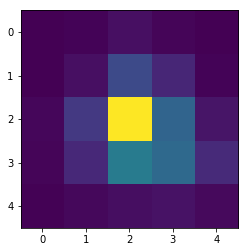

7 12 19
Box Size:  7 x 7
COM:  3.2449033324292054 3.2648919733195645
2dG:  3.1896618950975313 3.207628590398162
138 9 



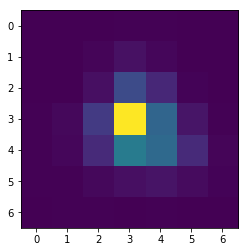

9 11 20
Box Size:  9 x 9
COM:  4.24009262323945 4.267716703142442
2dG:  4.187233272940461 4.20553375363454
139 9 



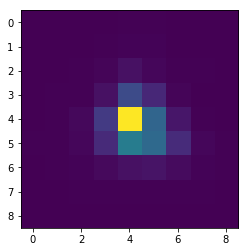

11 10 21
Box Size:  11 x 11
COM:  5.2384682016829975 5.262993445178672
2dG:  5.1860346943421485 5.204496787656358
140 9 



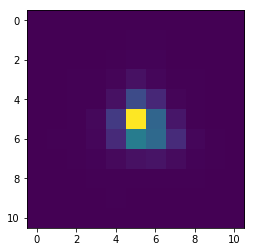

13 9 22
Box Size:  13 x 13
COM:  6.234587329053277 6.264163197599763
2dG:  6.185327378239595 6.203884158355789
141 9 



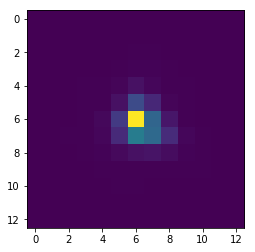

15 8 23
Box Size:  15 x 15
COM:  7.226959288603344 7.255063986265688
2dG:  7.184873016505312 7.203490413896772
142 9 



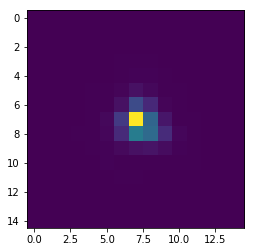

17 7 24
Box Size:  17 x 17
COM:  8.209302705614116 8.247053838883051
2dG:  8.184563068066494 8.203221730873961
143 9 



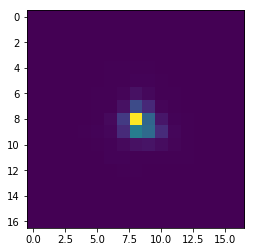

19 6 25
Box Size:  19 x 19
COM:  9.175543160683304 9.201001070068326
2dG:  9.184341379331471 9.20302953683614
144 9 



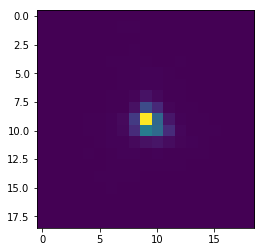

21 5 26
Box Size:  21 x 21
COM:  10.167819526708445 10.193520487426634
2dG:  10.184175210516788 10.202885461764073
145 9 



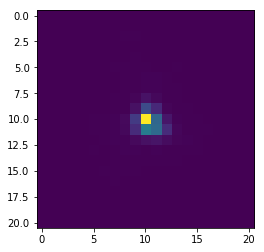

23 4 27
Box Size:  23 x 23
COM:  11.160447062060618 11.181224382541762
2dG:  10.967821482414328 11.058983758320299
146 9 



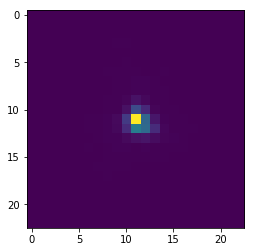

25 3 28
Box Size:  25 x 25
COM:  12.14942229589584 12.176267954065205
2dG:  12.183953895114316 12.202692708969348
147 9 



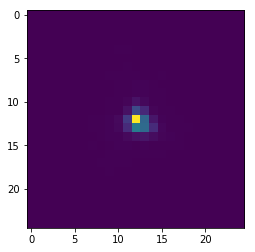

27 2 29
Box Size:  27 x 27
COM:  13.134754412017955 13.17586384836246
2dG:  13.183870065434629 13.202619944635405
148 9 



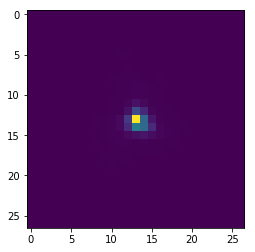

29 1 30
Box Size:  29 x 29
COM:  14.11779218986008 14.175297709418665
2dG:  14.183809230752093 14.202567245108206
149 9 



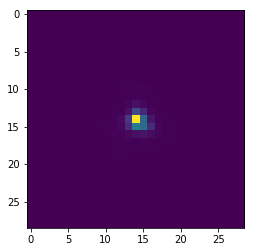

31 0 31
Box Size:  31 x 31
COM:  15.116988624331478 15.170373275948846
2dG:  15.183746787961146 15.202514136405698
150 9 



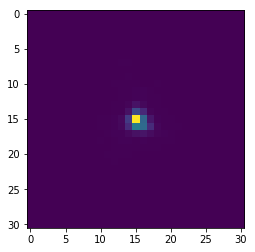

3 14 17
Box Size:  3 x 3
COM:  1.2080276313606957 1.1903383857530943
2dG:  1.2374291785896587 1.2374630068827832
151 10 



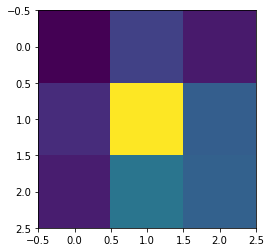

5 13 18
Box Size:  5 x 5
COM:  2.2417126759581842 2.2636507631811003
2dG:  2.197288650799968 2.2095341813804033
152 10 



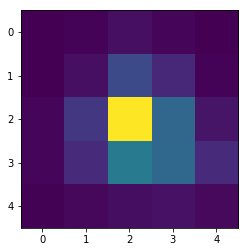

7 12 19
Box Size:  7 x 7
COM:  3.245360887530832 3.26549320841635
2dG:  3.1901168421129587 3.2035872043450406
153 10 



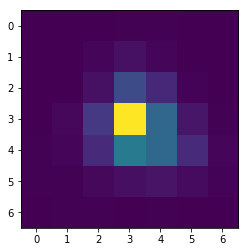

9 11 20
Box Size:  9 x 9
COM:  4.239377208606111 4.269081804940929
2dG:  4.187664425795713 4.201525690455166
154 10 



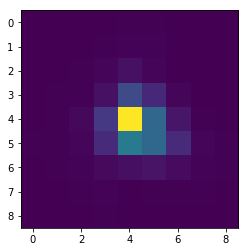

11 10 21
Box Size:  11 x 11
COM:  5.233660243758342 5.2604065079142055
2dG:  5.186446532844628 5.200498686751921
155 10 



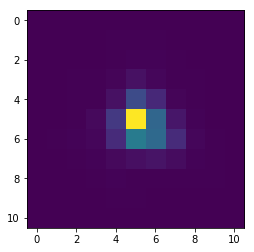

13 9 22
Box Size:  13 x 13
COM:  6.22416301171016 6.259096755311516
2dG:  6.185726188346196 6.199890504295133
156 10 



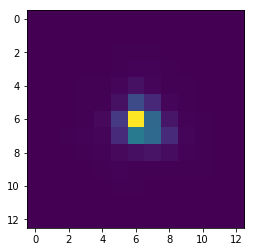

15 8 23
Box Size:  15 x 15
COM:  7.215067410048541 7.256870583625207
2dG:  7.185265835934194 7.199501635908833
157 10 



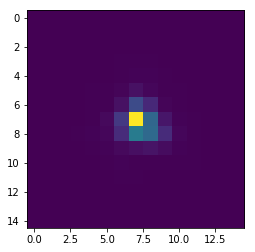

17 7 24
Box Size:  17 x 17
COM:  8.201665847147101 8.25264880398407
2dG:  8.18495795419914 8.199241486215119
158 10 



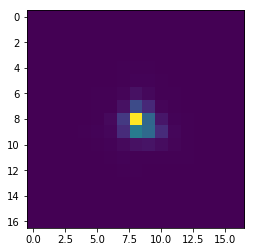

19 6 25
Box Size:  19 x 19
COM:  9.184180206343354 9.250717049977998
2dG:  9.18473355802597 9.199051849667583
159 10 



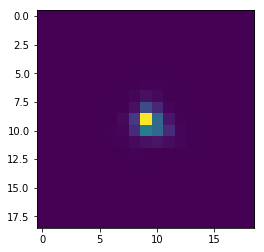

21 5 26
Box Size:  21 x 21
COM:  10.184348169401611 10.225937933901525
2dG:  10.184560028217755 10.198902704065356
160 10 



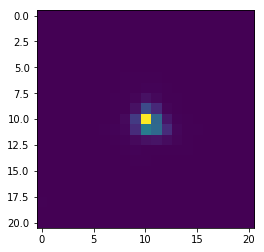

23 4 27
Box Size:  23 x 23
COM:  11.173949132188755 11.220472030993166
2dG:  11.184375637207621 11.198748143775466
161 10 



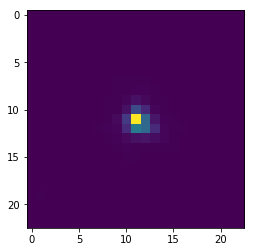

25 3 28
Box Size:  25 x 25
COM:  12.16996330433247 12.211989301226785
2dG:  12.184298817085919 12.19866654750421
162 10 



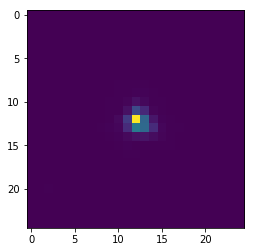

27 2 29
Box Size:  27 x 27
COM:  13.16304233549982 13.202579089404686
2dG:  13.18420701226611 13.19860326720268
163 10 



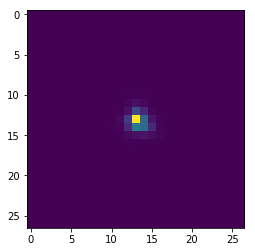

29 1 30
Box Size:  29 x 29
COM:  14.151616268279462 14.206173328698013
2dG:  14.184188802442582 14.198591387873854
164 10 



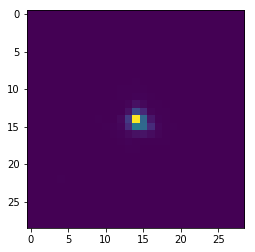

31 0 31
Box Size:  31 x 31
COM:  15.140430104323341 15.201017332724527
2dG:  15.184141791591065 15.198550825113076
165 10 



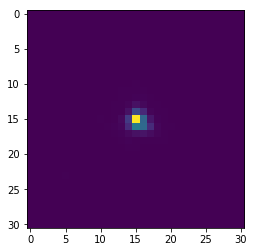

3 14 17
Box Size:  3 x 3
COM:  1.2049220750987077 1.190643063055739
2dG:  1.2360098461208862 1.231399992348913
166 11 



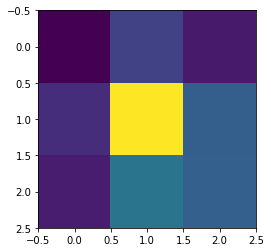

5 13 18
Box Size:  5 x 5
COM:  2.238037430222198 2.2636965367326294
2dG:  2.1974198211745697 2.20484259571791
167 11 



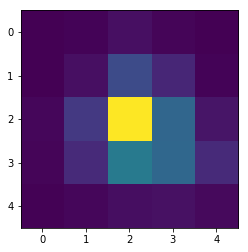

7 12 19
Box Size:  7 x 7
COM:  3.239320480250888 3.2636108625761953
2dG:  3.19036798368971 3.199085857579123
168 11 



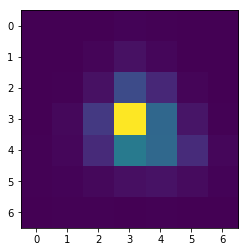

9 11 20
Box Size:  9 x 9
COM:  4.237539824797288 4.267733341189409
2dG:  4.187967786590138 4.197098764886536
169 11 



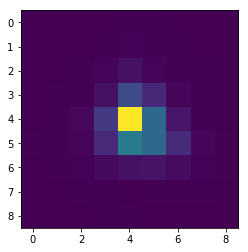

11 10 21
Box Size:  11 x 11
COM:  5.237423344269375 5.260622439974929
2dG:  5.186765127631818 5.196099695379748
170 11 



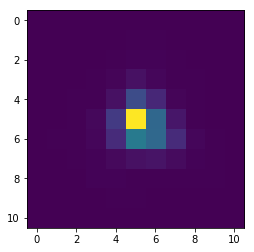

13 9 22
Box Size:  13 x 13
COM:  6.230855382640611 6.255629676016419
2dG:  6.186060372826765 6.1955134477453155
171 11 



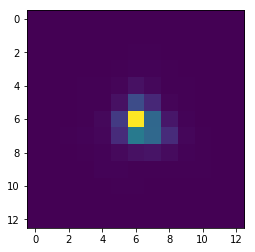

15 8 23
Box Size:  15 x 15
COM:  7.227458700327562 7.250861533011797
2dG:  7.185613165767677 7.195141199764789
172 11 



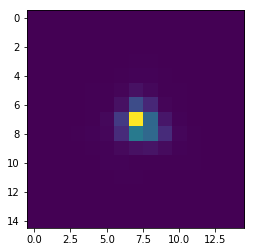

17 7 24
Box Size:  17 x 17
COM:  8.211942996594036 8.241501629915808
2dG:  8.185309314077267 8.194888194664873
173 11 



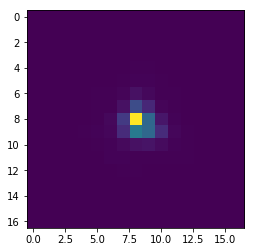

19 6 25
Box Size:  19 x 19
COM:  9.178908957627586 9.255079859054224
2dG:  9.185097599689366 9.194712029954871
174 11 



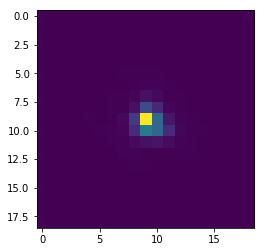

21 5 26
Box Size:  21 x 21
COM:  10.17393134741533 10.24812754229554
2dG:  10.18491418516049 10.194547421425993
175 11 



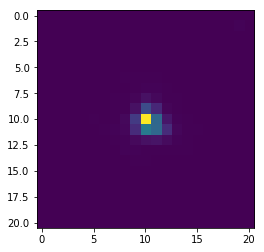

23 4 27
Box Size:  23 x 23
COM:  11.17176728410433 11.243801440555679
2dG:  11.184806532748821 11.194462803121866
176 11 



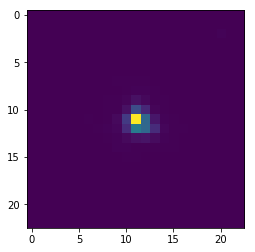

25 3 28
Box Size:  25 x 25
COM:  12.161133689618794 12.24146048451417
2dG:  12.183810712131326 12.193664014262971
177 11 



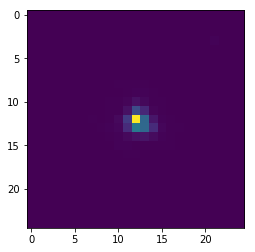

27 2 29
Box Size:  27 x 27
COM:  13.151791760500602 13.245016470783133
2dG:  13.184487028312873 13.194197870869685
178 11 



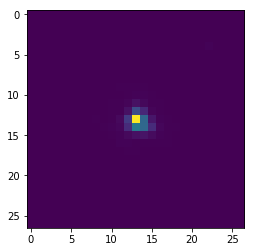

29 1 30
Box Size:  29 x 29
COM:  14.140216163369146 14.246706472889612
2dG:  14.184368763037684 14.194096496999444
179 11 



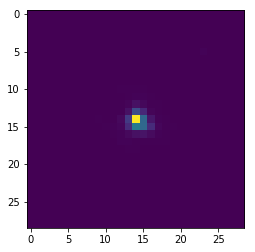

31 0 31
Box Size:  31 x 31
COM:  15.13752496078673 15.241794376407537
2dG:  15.184509064366674 15.194220087304581
180 11 



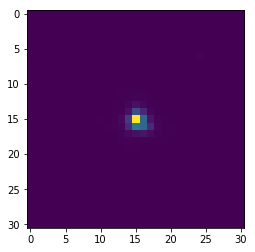

3 14 17
Box Size:  3 x 3
COM:  1.1997183598145384 1.193818253688163
2dG:  1.2399211743844973 1.2272937428129782
181 12 



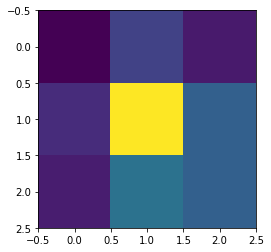

5 13 18
Box Size:  5 x 5
COM:  2.23306310410328 2.2711200588985707
2dG:  2.2001655953339143 2.2007036995234808
182 12 



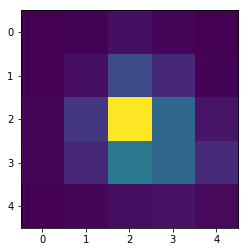

7 12 19
Box Size:  7 x 7
COM:  3.2325793336785806 3.2695532862308165
2dG:  3.1928555397124114 3.1948140565423535
183 12 



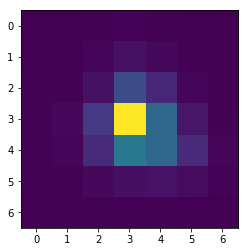

9 11 20
Box Size:  9 x 9
COM:  4.231295481832565 4.274610995527073
2dG:  4.190389663312961 4.1927872449617185
184 12 



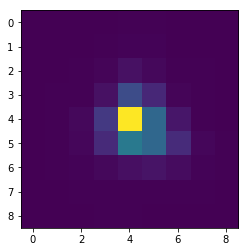

11 10 21
Box Size:  11 x 11
COM:  5.227579386776804 5.267772267911509
2dG:  5.189164241154197 5.1917738386108905
185 12 



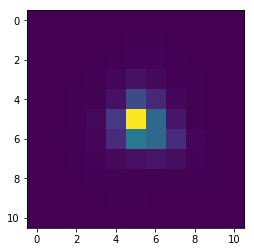

13 9 22
Box Size:  13 x 13
COM:  6.221067138358968 6.263832963404586
2dG:  6.188441254037524 6.1911741853594515
186 12 



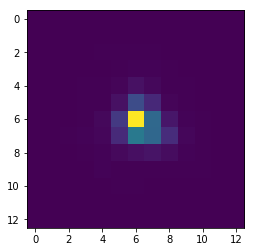

15 8 23
Box Size:  15 x 15
COM:  7.21613127143028 7.25925994657263
2dG:  7.1879842924531 7.190794549801734
187 12 



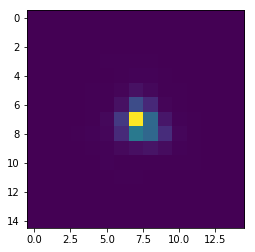

17 7 24
Box Size:  17 x 17
COM:  8.204407360607505 8.257518433721485
2dG:  8.1876734945654 8.190536080871942
188 12 



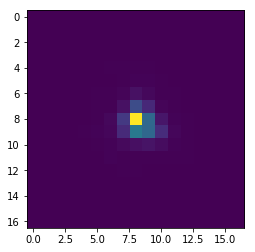

19 6 25
Box Size:  19 x 19
COM:  9.177088540444233 9.262587671085878
2dG:  9.187455838892278 9.190354109081113
189 12 



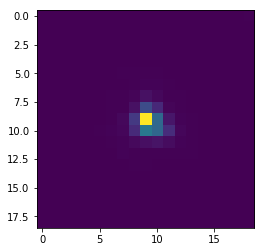

21 5 26
Box Size:  21 x 21
COM:  10.172319081656338 10.257350223062648
2dG:  10.187288739171441 10.190214397351076
190 12 



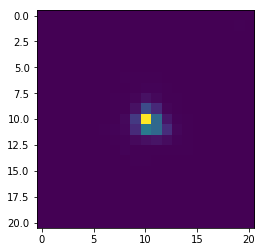

23 4 27
Box Size:  23 x 23
COM:  11.155366021348826 11.24210646652345
2dG:  11.18705885087277 11.19001322308266
191 12 



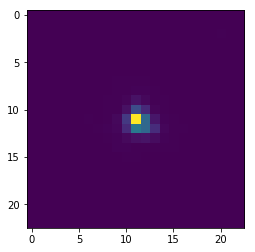

25 3 28
Box Size:  25 x 25
COM:  12.132635240893304 12.224028970563198
2dG:  12.18703386430152 12.190002296295194
192 12 



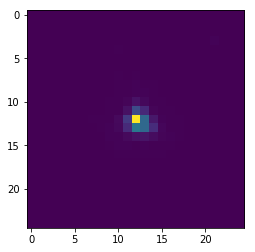

27 2 29
Box Size:  27 x 27
COM:  13.117529274423559 13.226804051902374
2dG:  13.186975182577099 13.189953128434462
193 12 



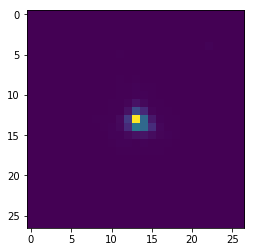

29 1 30
Box Size:  29 x 29
COM:  14.10365572433553 14.228333257601737
2dG:  14.186912045022009 14.18989800680887
194 12 



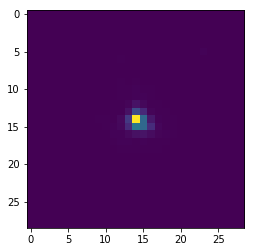

31 0 31
Box Size:  31 x 31
COM:  15.102041183037851 15.218176667110527
2dG:  15.18658020511051 15.189590837985545
195 12 



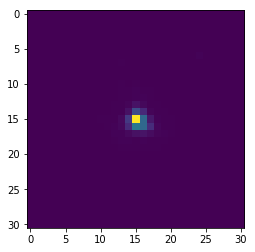

3 14 17
Box Size:  3 x 3
COM:  1.2035460912911933 1.193708142829563
2dG:  1.2412118008689126 1.2343689623685101
196 13 



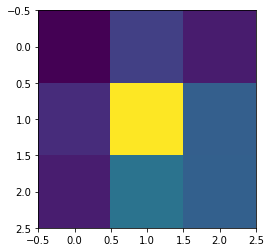

5 13 18
Box Size:  5 x 5
COM:  2.2372439083010356 2.2652459277596746
2dG:  2.199857182408642 2.206090521938437
197 13 



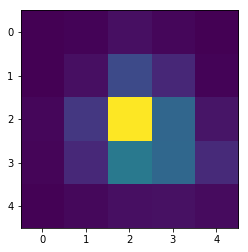

7 12 19
Box Size:  7 x 7
COM:  3.2384359188005547 3.2650210073119785
2dG:  3.192462850245331 3.199995014668839
198 13 



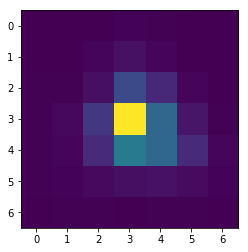

9 11 20
Box Size:  9 x 9
COM:  4.236916487017522 4.269224565491614
2dG:  4.189935446086785 4.19787363387339
199 13 



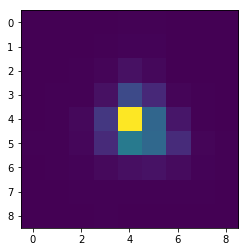

11 10 21
Box Size:  11 x 11
COM:  5.233347810354785 5.261448875513175
2dG:  5.188677274583316 5.196812031100084
200 13 



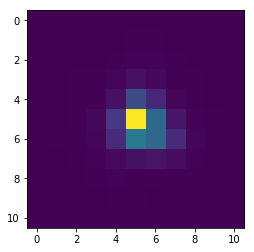

13 9 22
Box Size:  13 x 13
COM:  6.229199052000766 6.2619808355118955
2dG:  6.18793969444144 6.196188192392648
201 13 



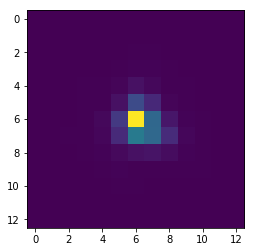

15 8 23
Box Size:  15 x 15
COM:  7.221411581557806 7.261239569612485
2dG:  7.187466033851121 7.195787046109008
202 13 



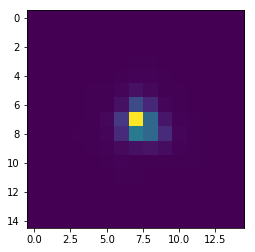

17 7 24
Box Size:  17 x 17
COM:  8.208440600748554 8.256826249072809
2dG:  8.187147891699192 8.19551740579949
203 13 



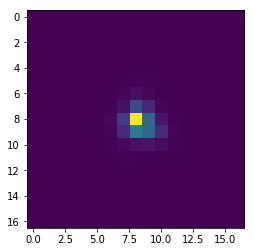

19 6 25
Box Size:  19 x 19
COM:  9.153441267467645 9.179999344787692
2dG:  9.18690989498929 9.195315246942489
204 13 



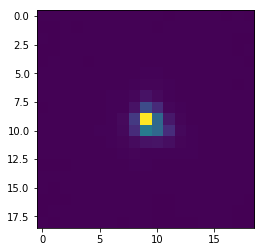

21 5 26
Box Size:  21 x 21
COM:  10.135338510092456 10.165670534807607
2dG:  10.186153515042701 10.194643608551429
205 13 



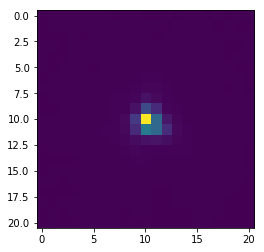

23 4 27
Box Size:  23 x 23
COM:  11.124770610675604 11.152581509327412
2dG:  11.186594942294576 11.19504563406704
206 13 



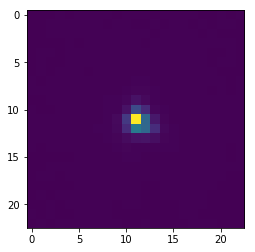

25 3 28
Box Size:  25 x 25
COM:  12.111416163859065 12.14459478625406
2dG:  12.186505223243756 12.19496797653367
207 13 



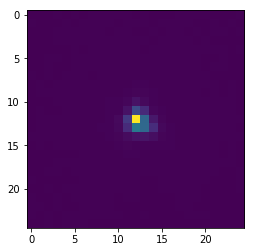

27 2 29
Box Size:  27 x 27
COM:  13.101775804016196 13.136165154631861
2dG:  13.186337693654696 13.19481698791158
208 13 



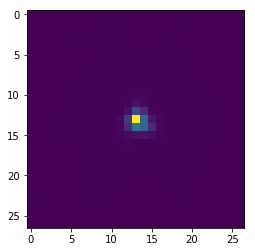

29 1 30
Box Size:  29 x 29
COM:  14.091307022298531 14.131635024184927
2dG:  14.186304259995692 14.19479135044899
209 13 



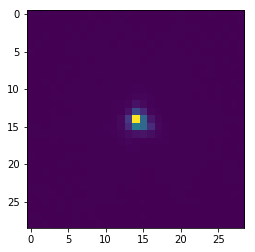

31 0 31
Box Size:  31 x 31
COM:  15.076105137230892 15.128044698047306
2dG:  15.300768153110589 15.23672231553671
210 13 



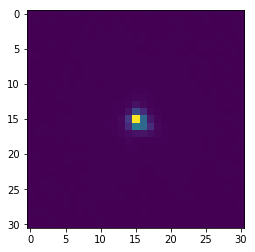

3 14 17
Box Size:  3 x 3
COM:  1.2073167735405137 1.191752632750319
2dG:  1.2375752132178914 1.237117002344849
211 14 



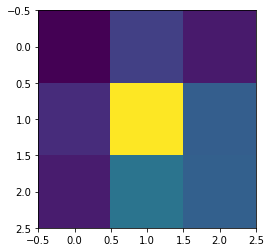

5 13 18
Box Size:  5 x 5
COM:  2.2400607316192844 2.2646474638876883
2dG:  2.1977913238705997 2.2092870171207473
212 14 



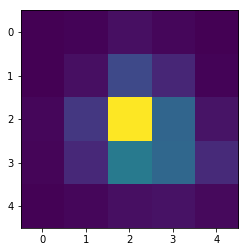

7 12 19
Box Size:  7 x 7
COM:  3.2427539781157018 3.265370767716078
2dG:  3.190536074629989 3.2032303104906585
213 14 



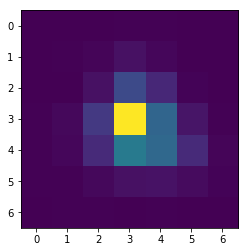

9 11 20
Box Size:  9 x 9
COM:  4.238001407013877 4.2706952657769275
2dG:  4.18805488520396 4.201127861565911
214 14 



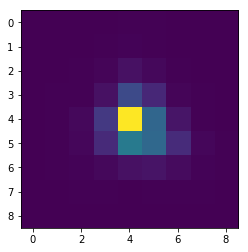

11 10 21
Box Size:  11 x 11
COM:  5.234763438406596 5.267116813904852
2dG:  5.186812399325053 5.200070986030428
215 14 



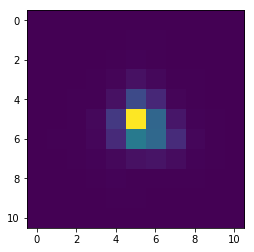

13 9 22
Box Size:  13 x 13
COM:  6.228333040806826 6.264857416072583
2dG:  6.186080424208646 6.199447353314382
216 14 



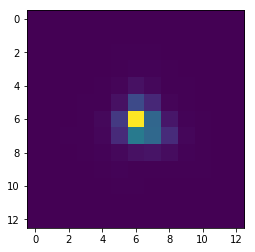

15 8 23
Box Size:  15 x 15
COM:  7.218551350101076 7.2645682158186355
2dG:  7.1856194838856515 7.199054314324987
217 14 



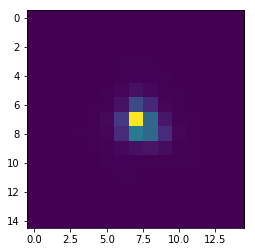

17 7 24
Box Size:  17 x 17
COM:  8.197653203033916 8.256884583554264
2dG:  8.185307899684178 8.198788525941447
218 14 



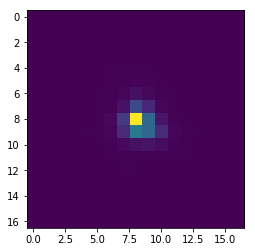

19 6 25
Box Size:  19 x 19
COM:  9.189616464707429 9.24501456546769
2dG:  9.185085398968612 9.198598667470595
219 14 



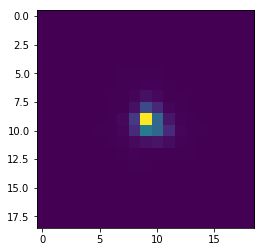

21 5 26
Box Size:  21 x 21
COM:  10.178930003472502 10.232615973626116
2dG:  10.184916431360934 10.198454455169104
220 14 



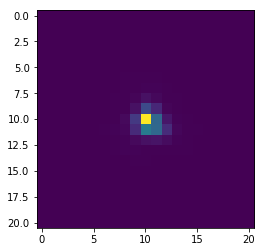

23 4 27
Box Size:  23 x 23
COM:  11.16967975243755 11.23353886466345
2dG:  11.184785651013069 11.198342989198132
221 14 



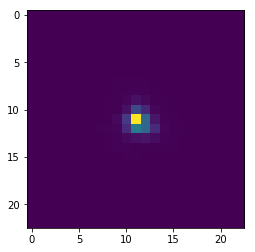

25 3 28
Box Size:  25 x 25
COM:  12.161575301218804 12.230319945372084
2dG:  12.184682468388022 12.198253244418591
222 14 



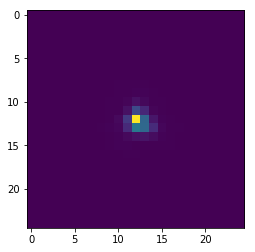

27 2 29
Box Size:  27 x 27
COM:  13.150361972711124 13.236953789954455
2dG:  13.184599726789386 13.198181722442229
223 14 



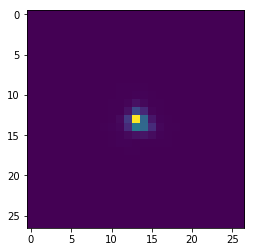

29 1 30
Box Size:  29 x 29
COM:  14.13887753065795 14.232356555413098
2dG:  14.184471475982559 14.198070067818287
224 14 



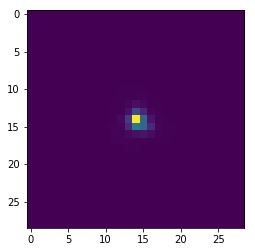

31 0 31
Box Size:  31 x 31
COM:  15.122531111264227 15.200678861774575
2dG:  15.184484904207991 15.19808447347653
225 14 



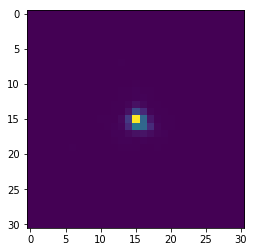

3 14 17
Box Size:  3 x 3
COM:  1.2071529228848878 1.1909100117851554
2dG:  1.235904546447991 1.2358593919102028
226 15 



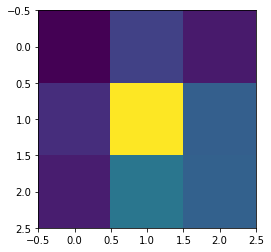

5 13 18
Box Size:  5 x 5
COM:  2.2402097539974237 2.2643337807937742
2dG:  2.1972288973122973 2.208924675678914
227 15 



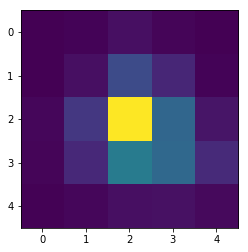

7 12 19
Box Size:  7 x 7
COM:  3.2433709483252944 3.2643132562651833
2dG:  3.1901620212090926 3.2030813304042334
228 15 



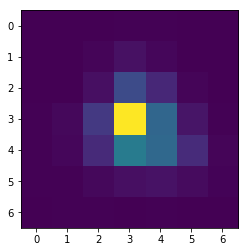

9 11 20
Box Size:  9 x 9
COM:  4.239352326689053 4.2648340871037576
2dG:  4.187716279970432 4.2010313326820885
229 15 



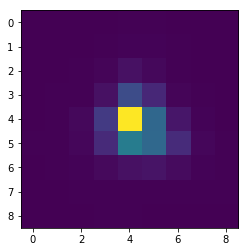

11 10 21
Box Size:  11 x 11
COM:  5.238889458192959 5.260854890871492
2dG:  5.186520022142077 5.200025427113878
230 15 



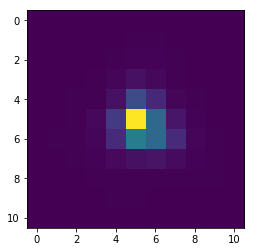

13 9 22
Box Size:  13 x 13
COM:  6.232649031854958 6.2605485378869865
2dG:  6.185803853671516 6.199422483031709
231 15 



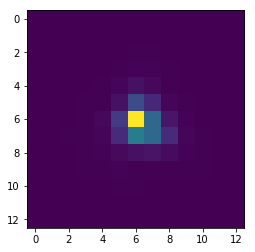

15 8 23
Box Size:  15 x 15
COM:  7.229762582790254 7.262553181895595
2dG:  7.185347079920488 7.199037723540216
232 15 



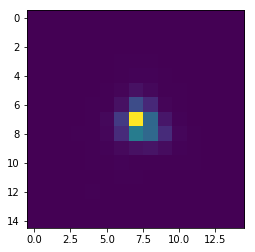

17 7 24
Box Size:  17 x 17
COM:  8.214216680862148 8.259008027468337
2dG:  8.185036833134967 8.198776317957359
233 15 



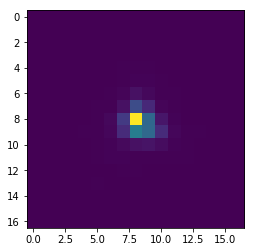

19 6 25
Box Size:  19 x 19
COM:  9.18160765025046 9.24014606237493
2dG:  9.184813702423249 9.198588259603387
234 15 



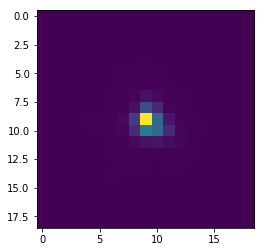

21 5 26
Box Size:  21 x 21
COM:  10.173684562856165 10.226348306911653
2dG:  10.18464809011748 10.198448680253515
235 15 



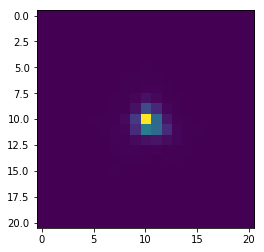

23 4 27
Box Size:  23 x 23
COM:  11.167246857114213 11.220667797282701
2dG:  11.184446330463667 11.198276669319231
236 15 



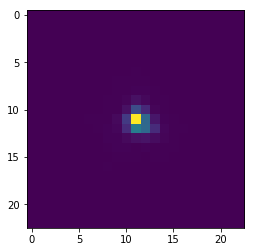

25 3 28
Box Size:  25 x 25
COM:  12.160858643683254 12.2241691620817
2dG:  12.18442005531107 12.198256451945829
237 15 



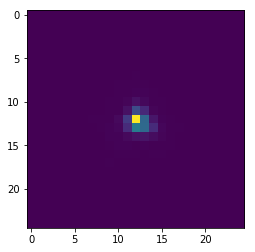

27 2 29
Box Size:  27 x 27
COM:  13.150775567327768 13.221248663736835
2dG:  13.184128253180523 13.198000139976772
238 15 



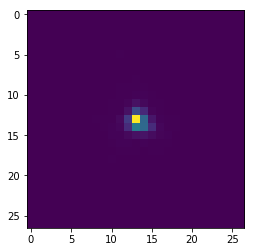

29 1 30
Box Size:  29 x 29
COM:  14.147123536365372 14.222676293045891
2dG:  14.184282209848934 14.198138639707345
239 15 



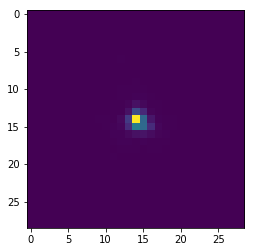

31 0 31
Box Size:  31 x 31
COM:  15.138260915216533 15.224570694043216
2dG:  15.184228051120952 15.198093939555164
240 15 



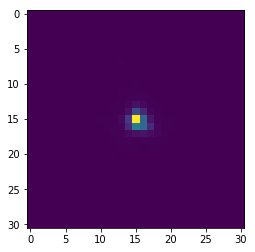

3 14 17
Box Size:  3 x 3
COM:  1.2095471113757716 1.1896215465359723
2dG:  1.2362449038832342 1.2401481074054943
241 16 



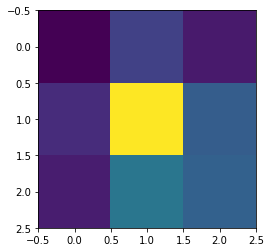

5 13 18
Box Size:  5 x 5
COM:  2.2424585176356704 2.263629555891584
2dG:  2.19629540405463 2.211894959224339
242 16 



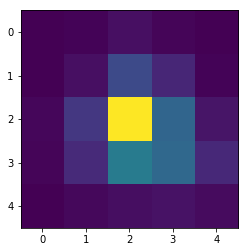

7 12 19
Box Size:  7 x 7
COM:  3.243355437688498 3.263827490013072
2dG:  3.1891640778051618 3.205904161094606
243 16 



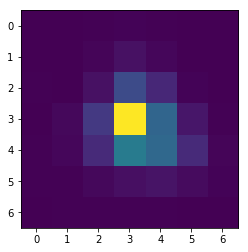

9 11 20
Box Size:  9 x 9
COM:  4.240567915840416 4.26761642500165
2dG:  4.186719186045904 4.20382342756879
244 16 



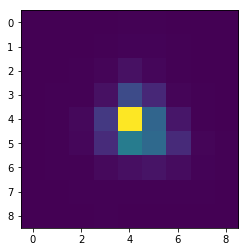

11 10 21
Box Size:  11 x 11
COM:  5.240563712702576 5.261043838557441
2dG:  5.185500460941654 5.202783204167792
245 16 



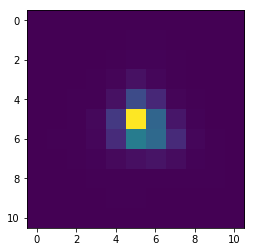

13 9 22
Box Size:  13 x 13
COM:  6.228747303561982 6.253372673142791
2dG:  6.184772529383748 6.202161222413198
246 16 



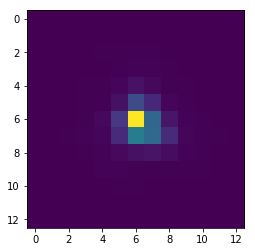

15 8 23
Box Size:  15 x 15
COM:  7.223133073832247 7.247755344140187
2dG:  7.184315114105644 7.201770207655634
247 16 



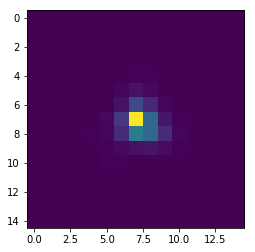

17 7 24
Box Size:  17 x 17
COM:  8.212198493185301 8.24214431028423
2dG:  8.184003021091506 8.20150336039421
248 16 



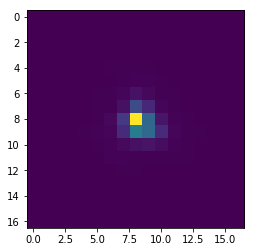

19 6 25
Box Size:  19 x 19
COM:  9.198929394111092 9.240337913896267
2dG:  9.183783765003989 9.201315867961721
249 16 



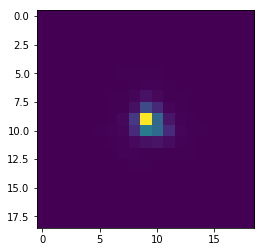

21 5 26
Box Size:  21 x 21
COM:  10.19259817768517 10.23111555738429
2dG:  10.183613927247105 10.201170609003565
250 16 



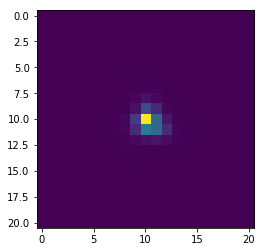

23 4 27
Box Size:  23 x 23
COM:  11.18886858170729 11.234415201637033
2dG:  11.183486741688613 11.20105870714471
251 16 



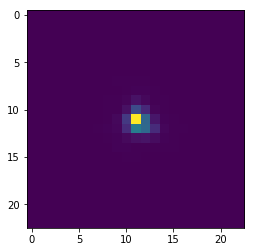

25 3 28
Box Size:  25 x 25
COM:  12.178031461896104 12.230647781645395
2dG:  12.183378528047315 12.200965391222534
252 16 



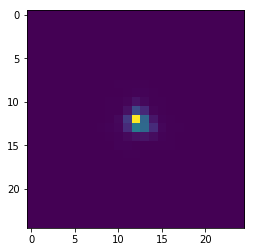

27 2 29
Box Size:  27 x 27
COM:  13.170677081767955 13.226597690931207
2dG:  13.150551641993012 13.179332905088737
253 16 



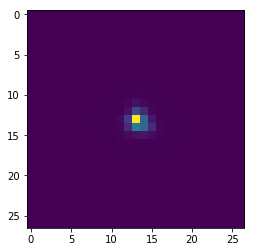

29 1 30
Box Size:  29 x 29
COM:  14.154926314951389 14.227075956519476
2dG:  14.183216850780006 14.20082995038985
254 16 



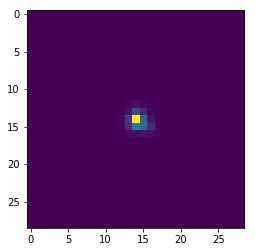

31 0 31
Box Size:  31 x 31
COM:  15.153211192657608 15.227942096537236
2dG:  15.183170745475383 15.200790373342866
255 16 



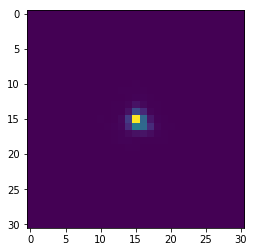

3 14 17
Box Size:  3 x 3
COM:  1.1991078303984275 1.18935030195558
2dG:  1.2328944624318745 1.225711639051223
256 17 



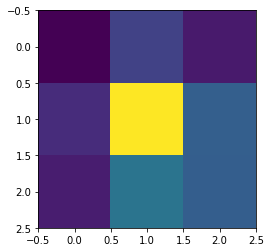

5 13 18
Box Size:  5 x 5
COM:  2.2303680010374447 2.2639451876329235
2dG:  2.194479661171362 2.199618612104441
257 17 



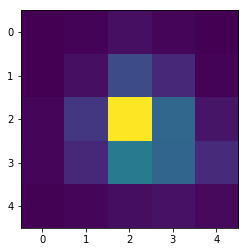

7 12 19
Box Size:  7 x 7
COM:  3.232673132225301 3.2638829077089135
2dG:  3.1873924510059535 3.1938714123744174
258 17 



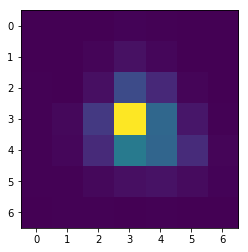

9 11 20
Box Size:  9 x 9
COM:  4.231224080526122 4.26645913931958
2dG:  4.1849500757058875 4.191855902891889
259 17 



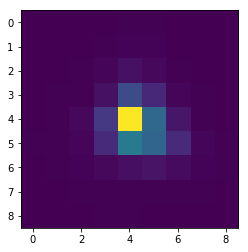

11 10 21
Box Size:  11 x 11
COM:  5.226935247458797 5.258324619211538
2dG:  5.183739554240725 5.190851919428576
260 17 



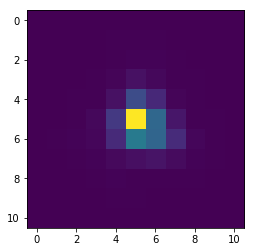

13 9 22
Box Size:  13 x 13
COM:  6.223435233471822 6.257416715807469
2dG:  6.183028882425334 6.190261209719142
261 17 



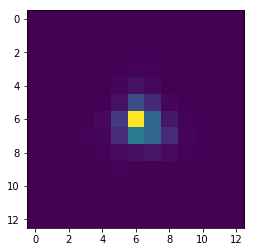

15 8 23
Box Size:  15 x 15
COM:  7.213732070431577 7.253398487870931
2dG:  7.182577632173036 7.18988567318038
262 17 



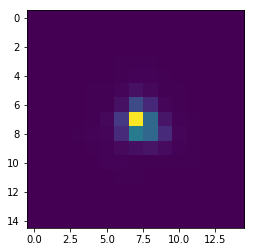

17 7 24
Box Size:  17 x 17
COM:  8.1983578737045 8.253318699790862
2dG:  8.182270507642109 8.189629889237146
263 17 



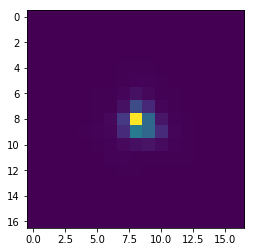

19 6 25
Box Size:  19 x 19
COM:  9.13267903427172 9.154773714635134
2dG:  9.182041833856948 9.189439117197583
264 17 



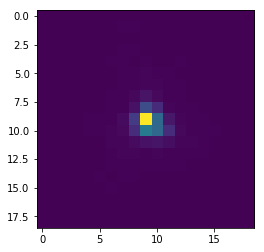

21 5 26
Box Size:  21 x 21
COM:  10.119909920903263 10.141343039358414
2dG:  10.181874460407037 10.189299547980312
265 17 



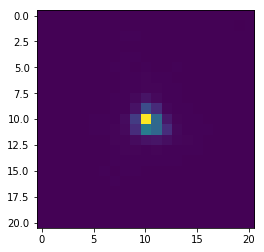

23 4 27
Box Size:  23 x 23
COM:  11.108093807813411 11.12957203552967
2dG:  11.181741698103236 11.189185777713375
266 17 



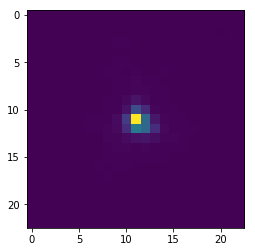

25 3 28
Box Size:  25 x 25
COM:  12.096116664483226 12.116477933424582
2dG:  12.304063152979992 12.2465168360906
267 17 



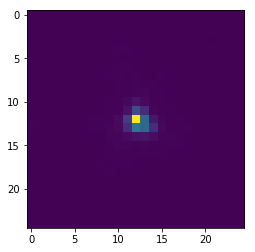

27 2 29
Box Size:  27 x 27
COM:  13.089023427159734 13.110466635157694
2dG:  13.181024006416077 13.188590660682845
268 17 



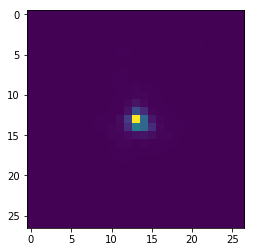

29 1 30
Box Size:  29 x 29
COM:  14.081793135915179 14.1046208460547
2dG:  14.18142411923978 14.188894413793935
269 17 



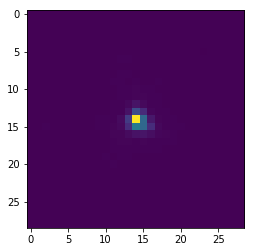

31 0 31
Box Size:  31 x 31
COM:  15.075812135774074 15.095913362847336
2dG:  15.181462153393225 15.188950761570009
270 17 



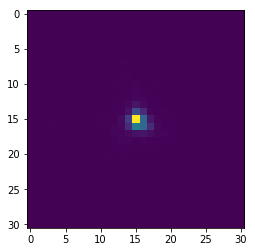

3 14 17
Box Size:  3 x 3
COM:  1.1987189180667004 1.195621005360213
2dG:  1.24467653361461 1.2284684391585383
271 18 



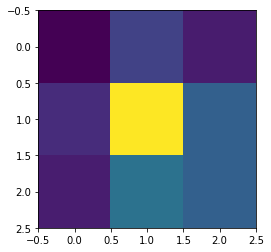

5 13 18
Box Size:  5 x 5
COM:  2.232115972426696 2.270945213826435
2dG:  2.202101909099304 2.2004922550802717
272 18 



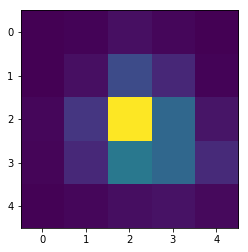

7 12 19
Box Size:  7 x 7
COM:  3.236896025711884 3.2745652457958765
2dG:  3.1946773454879267 3.1945770222172603
273 18 



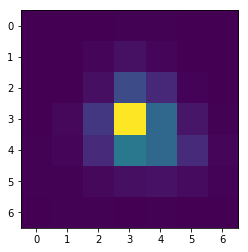

9 11 20
Box Size:  9 x 9
COM:  4.23241186897887 4.275898167755749
2dG:  4.192128014581832 4.192502155092621
274 18 



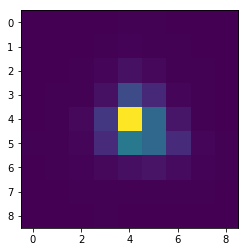

11 10 21
Box Size:  11 x 11
COM:  5.2336479189932525 5.2752003437497645
2dG:  5.190859818647083 5.191462973579524
275 18 



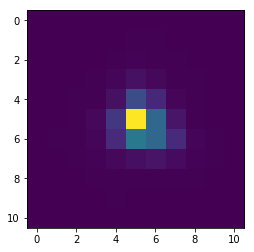

13 9 22
Box Size:  13 x 13
COM:  6.2261505552116425 6.269408781496416
2dG:  6.190118071413079 6.190853198002015
276 18 



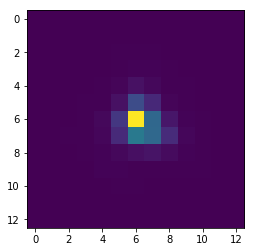

15 8 23
Box Size:  15 x 15
COM:  7.218904572790479 7.267667408232344
2dG:  7.189644938117936 7.190463527617492
277 18 



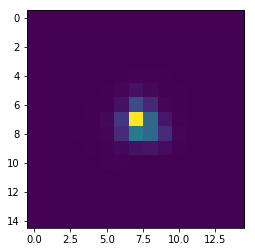

17 7 24
Box Size:  17 x 17
COM:  8.197594521191391 8.25393587617534
2dG:  8.18932937680209 8.19020331980548
278 18 



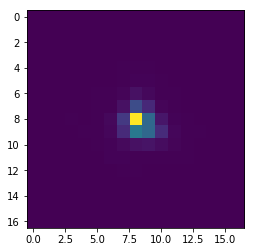

19 6 25
Box Size:  19 x 19
COM:  9.170388265754257 9.267584726652395
2dG:  9.189106861672737 9.190019729996122
279 18 



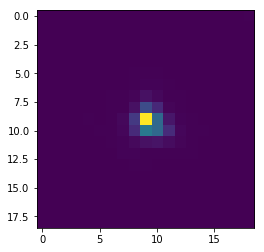

21 5 26
Box Size:  21 x 21
COM:  10.158175218038355 10.26026560823366
2dG:  10.188940820096315 10.189870941507289
280 18 



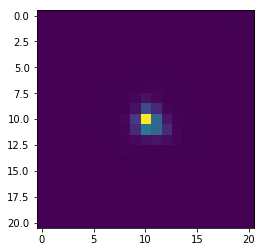

23 4 27
Box Size:  23 x 23
COM:  11.142313684891146 11.254471616645592
2dG:  11.18879278535772 11.189756070369452
281 18 



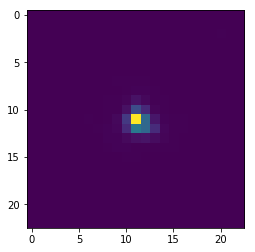

25 3 28
Box Size:  25 x 25
COM:  12.133338503866065 12.245423900514988
2dG:  12.188699966591349 12.189681401547048
282 18 



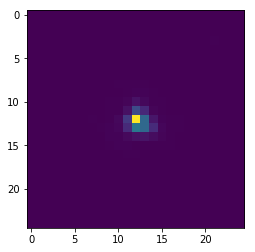

27 2 29
Box Size:  27 x 27
COM:  13.12469994546589 13.234106221529197
2dG:  13.188250294925503 13.189266899808237
283 18 



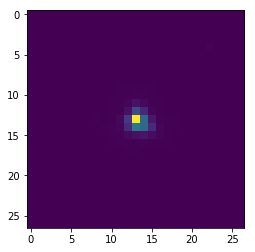

29 1 30
Box Size:  29 x 29
COM:  14.116183968730395 14.233053364842375
2dG:  14.188552105974772 14.189560375435173
284 18 



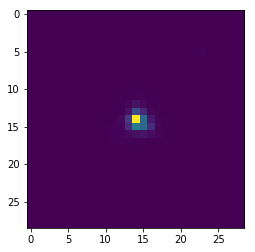

31 0 31
Box Size:  31 x 31
COM:  15.113876512617574 15.230444258173268
2dG:  15.188497007466792 15.189514032384237
285 18 



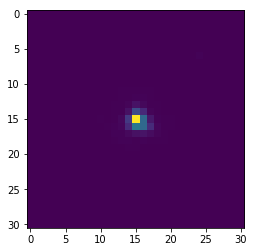

3 14 17
Box Size:  3 x 3
COM:  1.1946538572472403 1.206100355125291
2dG:  1.2601660215213615 1.2270827285007078
286 19 



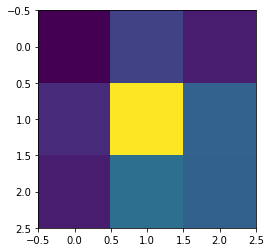

5 13 18
Box Size:  5 x 5
COM:  2.230153550520726 2.283379879444017
2dG:  2.213685703060691 2.198500666520778
287 19 



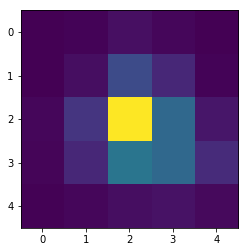

7 12 19
Box Size:  7 x 7
COM:  3.231606449678183 3.283752644769327
2dG:  3.2057097507389147 3.192427286819629
288 19 



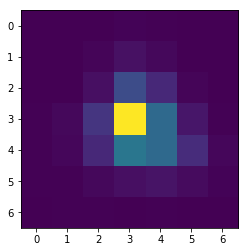

9 11 20
Box Size:  9 x 9
COM:  4.227990080207949 4.28783023281885
2dG:  4.203010151907571 4.190310274717453
289 19 



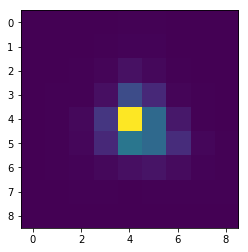

11 10 21
Box Size:  11 x 11
COM:  5.228583965279236 5.2834590872100495
2dG:  5.201674533450512 5.189251882519784
290 19 



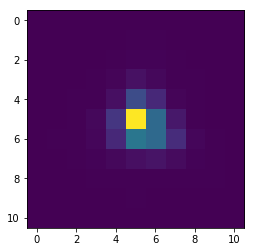

13 9 22
Box Size:  13 x 13
COM:  6.223776754712137 6.276276409165528
2dG:  6.2008835334683186 6.188621705286307
291 19 



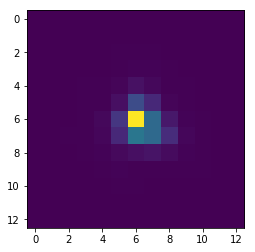

15 8 23
Box Size:  15 x 15
COM:  7.216564881811718 7.274432633845964
2dG:  7.200380297053588 7.188219500103448
292 19 



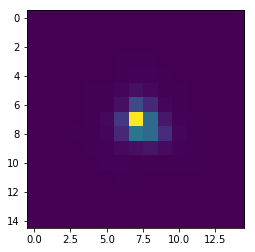

17 7 24
Box Size:  17 x 17
COM:  8.199650745043494 8.264354188419057
2dG:  8.200044505684078 8.1879505467739
293 19 



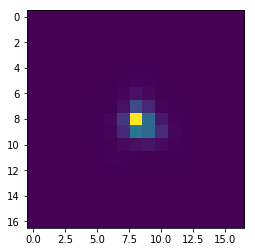

19 6 25
Box Size:  19 x 19
COM:  9.167498656706991 9.217669807086066
2dG:  9.19979674276764 9.187751628091592
294 19 



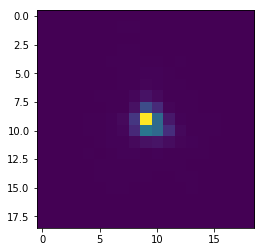

21 5 26
Box Size:  21 x 21
COM:  10.160993916209792 10.205092878366528
2dG:  10.199616884551677 10.187607317198575
295 19 



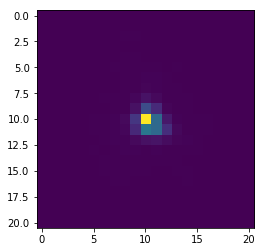

23 4 27
Box Size:  23 x 23
COM:  11.14779172544822 11.197204380759224
2dG:  11.197220254940106 11.185266713125262
296 19 



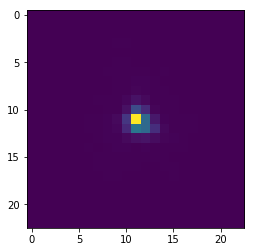

25 3 28
Box Size:  25 x 25
COM:  12.138173227656928 12.194782910604623
2dG:  12.199360314200351 12.187396004951385
297 19 



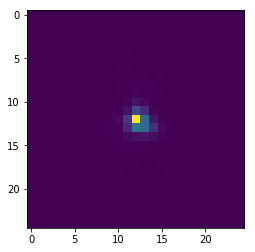

27 2 29
Box Size:  27 x 27
COM:  13.133997614920627 13.187315809005215
2dG:  13.199288527745805 13.187341649539805
298 19 



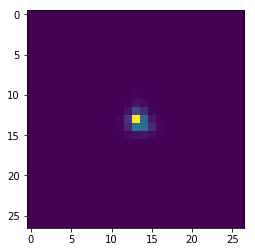

29 1 30
Box Size:  29 x 29
COM:  14.124114987313341 14.187149540286187
2dG:  14.199220456807337 14.187279414272595
299 19 



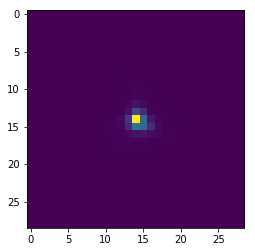

31 0 31
Box Size:  31 x 31
COM:  15.122365319519856 15.186901934018358
2dG:  15.199141984092517 15.187220574526219
300 19 



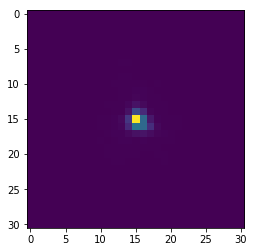

3 14 17
Box Size:  3 x 3
COM:  1.194989437563018 1.2050935641885427
2dG:  1.2595000588157987 1.2275999160844975
301 20 



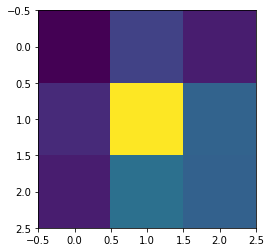

5 13 18
Box Size:  5 x 5
COM:  2.230646500646103 2.2845120817989506
2dG:  2.2128206906709997 2.198837626791485
302 20 



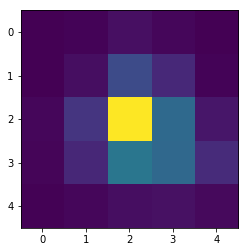

7 12 19
Box Size:  7 x 7
COM:  3.232032815296128 3.2840693164169963
2dG:  3.2048653684873405 3.192749582628763
303 20 



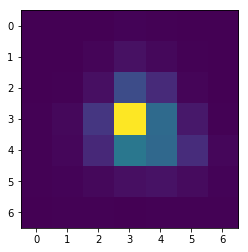

9 11 20
Box Size:  9 x 9
COM:  4.230532666385749 4.288848459207917
2dG:  4.202170346300092 4.1906272948000165
304 20 



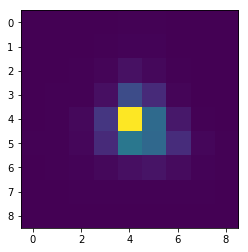

11 10 21
Box Size:  11 x 11
COM:  5.228296878423623 5.284526682476452
2dG:  5.200848275852908 5.189575773849122
305 20 



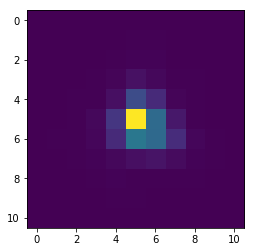

13 9 22
Box Size:  13 x 13
COM:  6.224177560668512 6.282909276528534
2dG:  6.200071247339244 6.188954636193463
306 20 



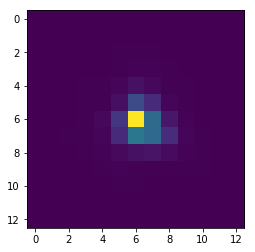

15 8 23
Box Size:  15 x 15
COM:  7.215382408604514 7.28189843156415
2dG:  7.199578954428116 7.188559954006817
307 20 



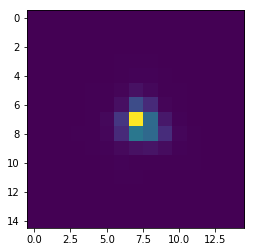

17 7 24
Box Size:  17 x 17
COM:  8.199989149053815 8.273933780383423
2dG:  8.199244450399144 8.188291251476294
308 20 



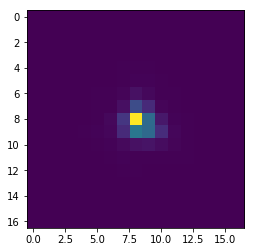

19 6 25
Box Size:  19 x 19
COM:  9.160313807569784 9.293108838843686
2dG:  9.199023449171865 9.18811283464627
309 20 



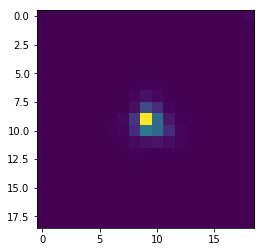

21 5 26
Box Size:  21 x 21
COM:  10.155647407489976 10.285587321113379
2dG:  10.198834549240987 10.18795918363988
310 20 



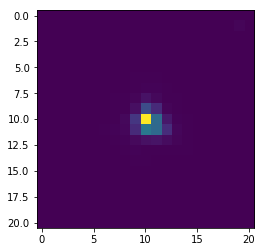

23 4 27
Box Size:  23 x 23
COM:  11.155009730864286 11.291428224139144
2dG:  11.198697279975015 11.187849925663144
311 20 



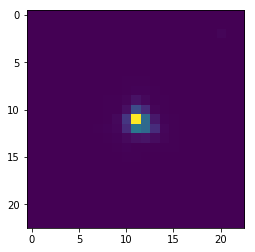

25 3 28
Box Size:  25 x 25
COM:  12.140515708310554 12.287821303242623
2dG:  12.19706851475824 12.186140372902761
312 20 



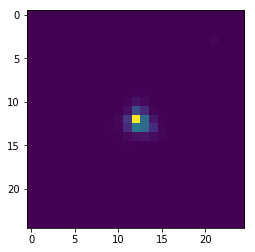

27 2 29
Box Size:  27 x 27
COM:  13.13764238591271 13.296624745151423
2dG:  13.1985022472578 13.187691366026568
313 20 



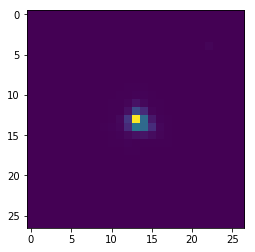

29 1 30
Box Size:  29 x 29
COM:  14.12977046811559 14.297655051389793
2dG:  14.198396291989855 14.187601010911422
314 20 



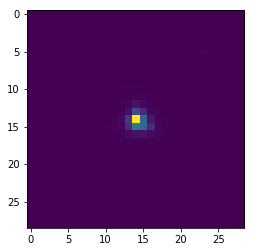

31 0 31
Box Size:  31 x 31
COM:  15.120838001991745 15.285258033786299
2dG:  15.19837448543067 15.187588233882561
315 20 



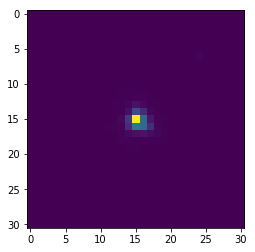

3 14 17
Box Size:  3 x 3
COM:  1.193122119789593 1.2117753316455617
2dG:  1.2730341904811322 1.2314099643844412
316 21 



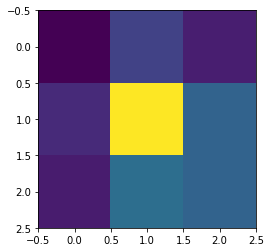

5 13 18
Box Size:  5 x 5
COM:  2.2309365789206956 2.289336063049523
2dG:  2.219779253415414 2.19962290792565
317 21 



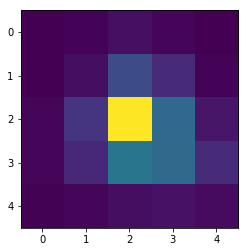

7 12 19
Box Size:  7 x 7
COM:  3.234897479930845 3.2897536143768495
2dG:  3.2114772060475105 3.1933395739140256
318 21 



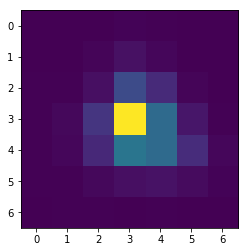

9 11 20
Box Size:  9 x 9
COM:  4.233252023724073 4.29438819098227
2dG:  4.208692394207083 4.191160062125251
319 21 



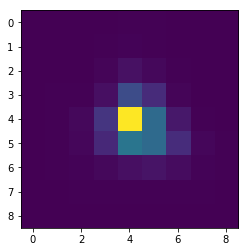

11 10 21
Box Size:  11 x 11
COM:  5.231211526001164 5.29315981102859
2dG:  5.2073185810481695 5.1900715450273065
320 21 



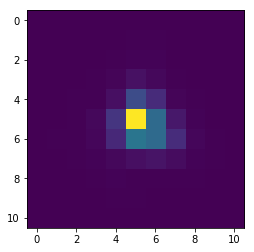

13 9 22
Box Size:  13 x 13
COM:  6.222020304277356 6.288593238311284
2dG:  6.206520762222191 6.189435399476437
321 21 



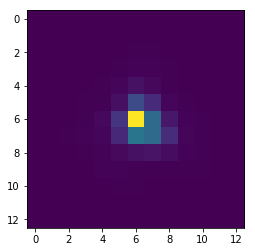

15 8 23
Box Size:  15 x 15
COM:  7.207994846149606 7.281673527576892
2dG:  7.20600852949801 7.189025364167381
322 21 



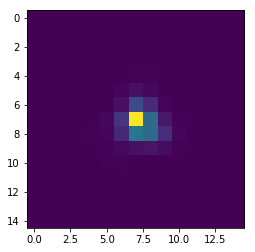

17 7 24
Box Size:  17 x 17
COM:  8.197573558742924 8.277418435414518
2dG:  8.20566607918284 8.188750551502173
323 21 



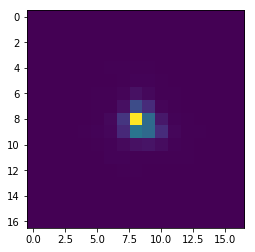

19 6 25
Box Size:  19 x 19
COM:  9.180515236257087 9.25524306342183
2dG:  9.205416409591656 9.188549806093294
324 21 



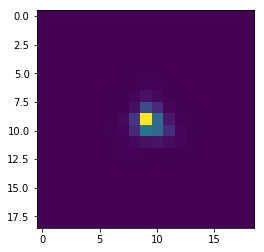

21 5 26
Box Size:  21 x 21
COM:  10.175317982727288 10.248421079455259
2dG:  10.204597925291397 10.187681729151608
325 21 



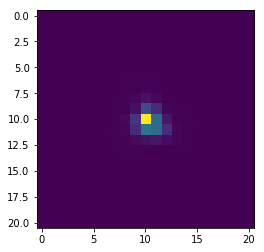

23 4 27
Box Size:  23 x 23
COM:  11.164601859487613 11.244908682421395
2dG:  11.20507405585011 11.18827046446547
326 21 



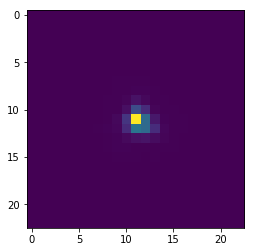

25 3 28
Box Size:  25 x 25
COM:  12.158300130293762 12.23737062280039
2dG:  12.204825665114878 12.188034243904546
327 21 



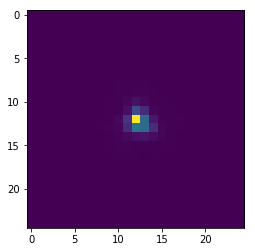

27 2 29
Box Size:  27 x 27
COM:  13.160926361313507 13.237774561420084
2dG:  13.204884845500029 13.188120781282421
328 21 



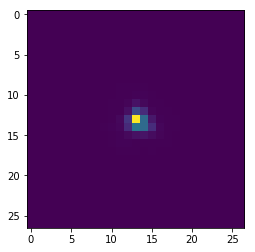

29 1 30
Box Size:  29 x 29
COM:  14.153249977977596 14.233780027115353
2dG:  14.204820664987373 14.188066609302872
329 21 



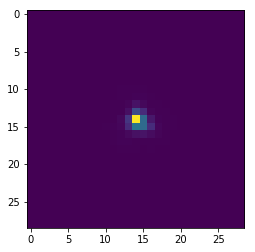

31 0 31
Box Size:  31 x 31
COM:  15.145308809700168 15.235099768245679
2dG:  15.204752065740243 15.188006652753497
330 21 



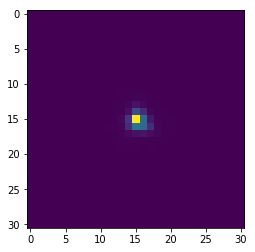

3 14 17
Box Size:  3 x 3
COM:  1.1932084046489349 1.2128927487433268
2dG:  1.2768459598640756 1.2319338359587122
331 22 



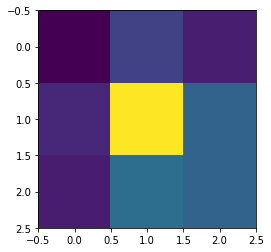

5 13 18
Box Size:  5 x 5
COM:  2.232299681211769 2.2922135272854445
2dG:  2.221570668566012 2.199485571762001
332 22 



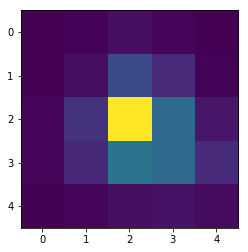

7 12 19
Box Size:  7 x 7
COM:  3.2348361196051423 3.2950371532213105
2dG:  3.2129810691961436 3.1930563647761647
333 22 



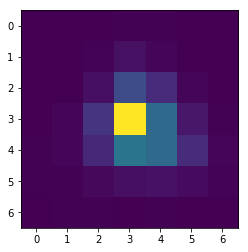

9 11 20
Box Size:  9 x 9
COM:  4.229127200609055 4.295669170702121
2dG:  4.210110712241895 4.190832220931832
334 22 



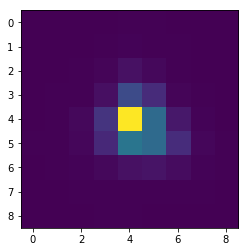

11 10 21
Box Size:  11 x 11
COM:  5.225817732190505 5.293495761555214
2dG:  5.2086941751105025 5.189720652505675
335 22 



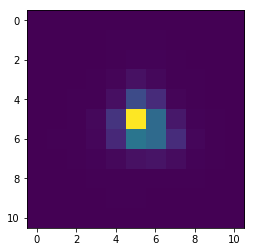

13 9 22
Box Size:  13 x 13
COM:  6.221827354414946 6.293274783156434
2dG:  6.207870219726554 6.189069801172585
336 22 



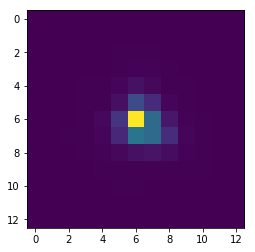

15 8 23
Box Size:  15 x 15
COM:  7.214617327772028 7.292305936408402
2dG:  7.207347188496098 7.18865502440249
337 22 



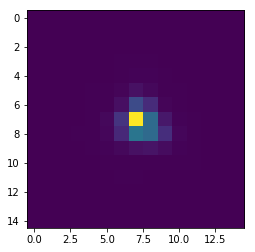

17 7 24
Box Size:  17 x 17
COM:  8.20011662246062 8.289466586177024
2dG:  8.206997993689928 8.188377394772923
338 22 



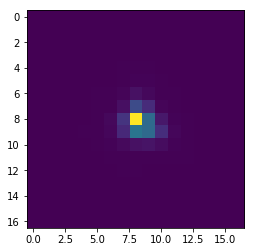

19 6 25
Box Size:  19 x 19
COM:  9.18488813019644 9.272080157494216
2dG:  9.206743250514068 9.188174482842657
339 22 



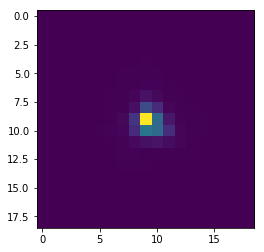

21 5 26
Box Size:  21 x 21
COM:  10.183018986496077 10.265234933778661
2dG:  10.206550230867217 10.188020363117888
340 22 



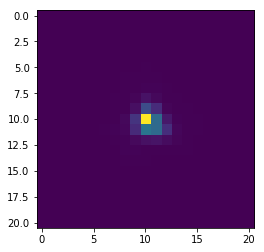

23 4 27
Box Size:  23 x 23
COM:  11.173180425824494 11.259763917262378
2dG:  11.206406692688567 11.187905721467988
341 22 



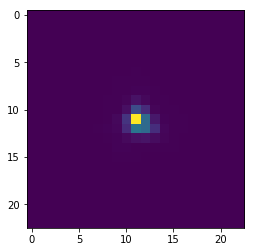

25 3 28
Box Size:  25 x 25
COM:  12.16629394152217 12.257510008671357
2dG:  12.20628997446523 12.187811657040738
342 22 



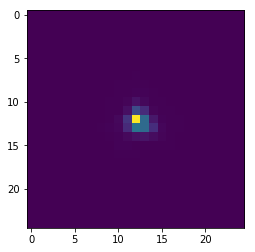

27 2 29
Box Size:  27 x 27
COM:  13.158589093242083 13.264085364846503
2dG:  13.206193220465343 13.1877331208996
343 22 



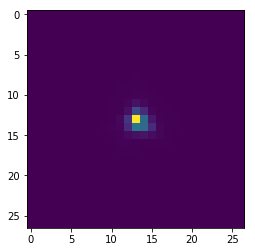

29 1 30
Box Size:  29 x 29
COM:  14.151526268417594 14.264913818247265
2dG:  14.20612115054855 14.187672357526763
344 22 



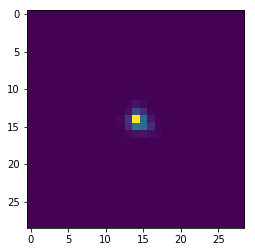

31 0 31
Box Size:  31 x 31
COM:  15.121005407468465 15.231848717083098
2dG:  15.2058927508737 15.187436219788504
345 22 



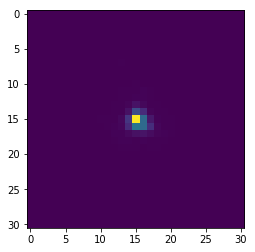

3 14 17
Box Size:  3 x 3
COM:  1.1966154331945411 1.2131674548968179
2dG:  1.2754668673351577 1.2351300814182937
346 23 



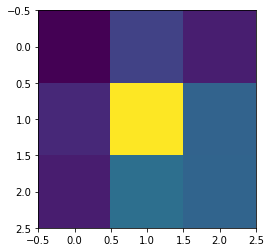

5 13 18
Box Size:  5 x 5
COM:  2.232069354666889 2.290832090463532
2dG:  2.2223477214146428 2.2032363005518434
347 23 



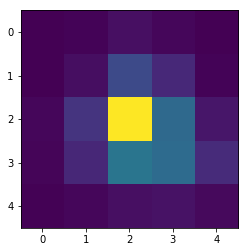

7 12 19
Box Size:  7 x 7
COM:  3.234432253255908 3.2935550213120495
2dG:  3.2140313126413833 3.1969049284973696
348 23 



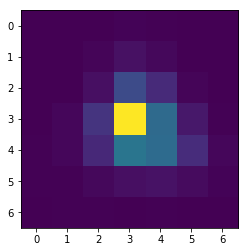

9 11 20
Box Size:  9 x 9
COM:  4.228874996295576 4.295962042838697
2dG:  4.21121703502121 4.194691083676624
349 23 



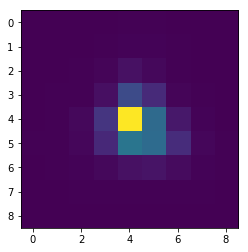

11 10 21
Box Size:  11 x 11
COM:  5.228891142156693 5.2911313992538025
2dG:  5.209826494461444 5.193583984193493
350 23 



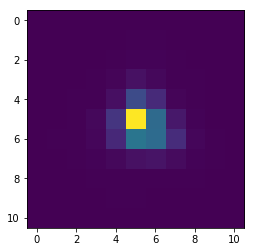

13 9 22
Box Size:  13 x 13
COM:  6.223243836092101 6.288080305555817
2dG:  6.20901019667689 6.192929986119693
351 23 



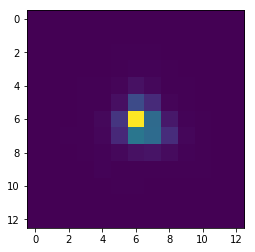

15 8 23
Box Size:  15 x 15
COM:  7.214711836893862 7.285010763558107
2dG:  7.208495247871048 7.192515860499015
352 23 



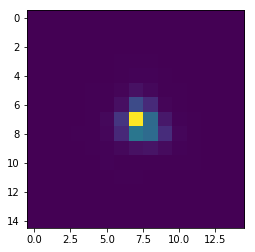

17 7 24
Box Size:  17 x 17
COM:  8.183546193396529 8.261960369070339
2dG:  8.208144267706638 8.192232894846608
353 23 



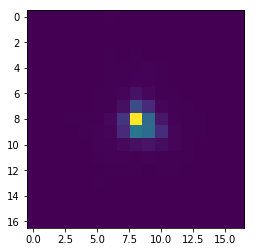

19 6 25
Box Size:  19 x 19
COM:  9.136676308489948 9.185730870880898
2dG:  9.207877557346157 9.192014443599218
354 23 



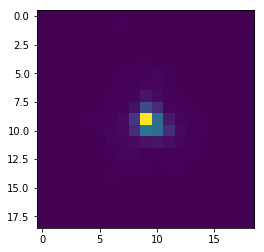

21 5 26
Box Size:  21 x 21
COM:  10.12375021139511 10.173570710300671
2dG:  10.177100239332031 10.159068488506685
355 23 



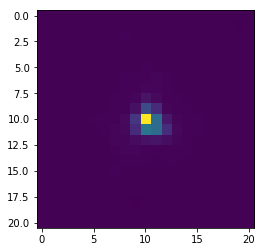

23 4 27
Box Size:  23 x 23
COM:  11.1152006683822 11.161159948210129
2dG:  11.207429420195552 11.191622579791902
356 23 



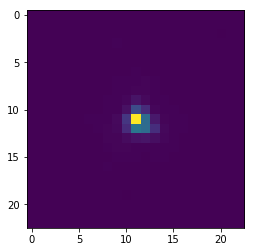

25 3 28
Box Size:  25 x 25
COM:  12.09889212280482 12.14982241143552
2dG:  12.206984244531851 12.191190912344995
357 23 



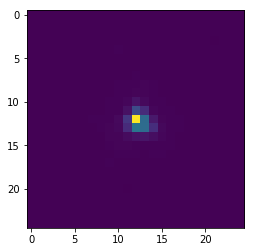

27 2 29
Box Size:  27 x 27
COM:  13.089752771825182 13.138307641508497
2dG:  13.340992393886372 13.237888349935238
358 23 



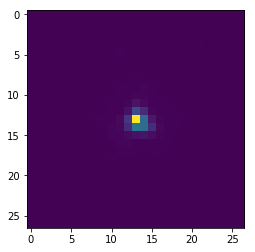

29 1 30
Box Size:  29 x 29
COM:  14.082468218836993 14.12982380693598
2dG:  14.195366398806902 14.1802165194994
359 23 



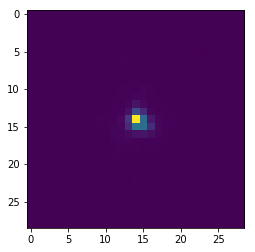

31 0 31
Box Size:  31 x 31
COM:  15.073058891633519 15.120798971618195
2dG:  15.20724128428601 15.19149168945657
360 23 



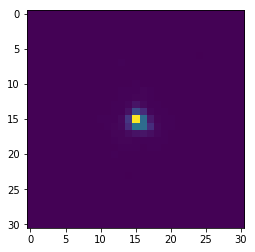

3 14 17
Box Size:  3 x 3
COM:  1.1909807454171526 1.2151164671496943
2dG:  1.277032741455186 1.2280564907362095
361 24 



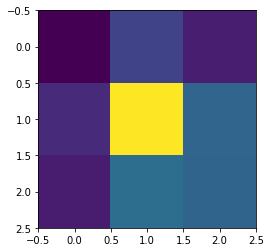

5 13 18
Box Size:  5 x 5
COM:  2.2257806537356153 2.294947469792587
2dG:  2.22411651702959 2.1970994266088
362 24 



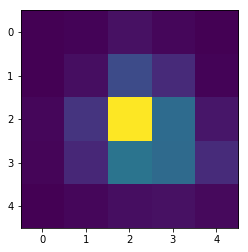

7 12 19
Box Size:  7 x 7
COM:  3.226503462173624 3.2963691747981976
2dG:  3.2157808649392075 3.1908805833581826
363 24 



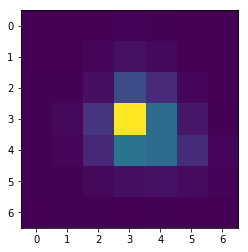

9 11 20
Box Size:  9 x 9
COM:  4.224354517346166 4.301481803848475
2dG:  4.212975671171111 4.188709042371796
364 24 



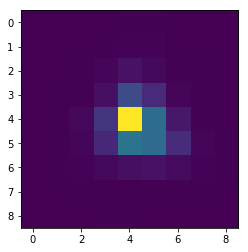

11 10 21
Box Size:  11 x 11
COM:  5.22491700253478 5.2968000022243835
2dG:  5.211587379996053 5.1876191818146316
365 24 



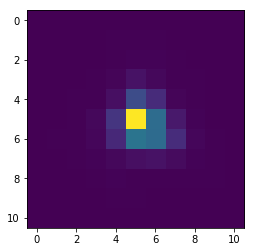

13 9 22
Box Size:  13 x 13
COM:  6.222861828441156 6.294729028171001
2dG:  6.210785165687283 6.186984708372593
366 24 



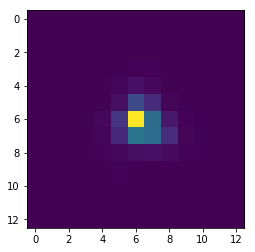

15 8 23
Box Size:  15 x 15
COM:  7.218556468367308 7.2948473655175565
2dG:  7.210275617116755 7.18657989319582
367 24 



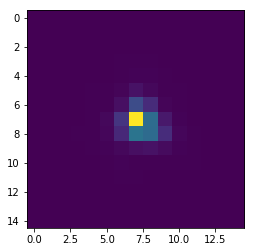

17 7 24
Box Size:  17 x 17
COM:  8.203968446163453 8.290560338746975
2dG:  8.209930219541636 8.186304672388987
368 24 



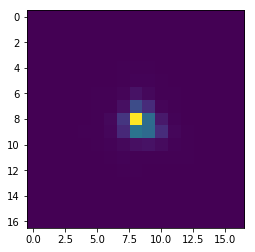

19 6 25
Box Size:  19 x 19
COM:  9.160232752903317 9.247884344998436
2dG:  9.209658156562407 9.18607894867543
369 24 



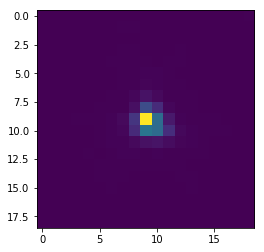

21 5 26
Box Size:  21 x 21
COM:  10.153008230666986 10.23598078023535
2dG:  10.20949760097576 10.185957988065395
370 24 



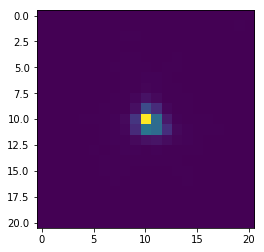

23 4 27
Box Size:  23 x 23
COM:  11.138607246467538 11.219172517105433
2dG:  11.20931524526916 11.185799841545634
371 24 



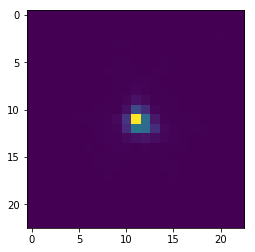

25 3 28
Box Size:  25 x 25
COM:  12.130763387856122 12.204097443453621
2dG:  12.209247890878919 12.185755143754744
372 24 



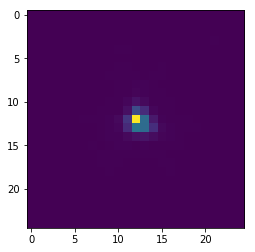

27 2 29
Box Size:  27 x 27
COM:  13.123573990307708 13.197085324112717
2dG:  13.209159800578075 13.185681111150354
373 24 



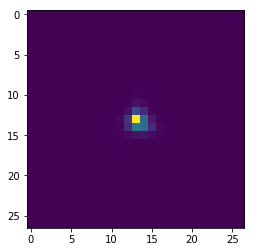

29 1 30
Box Size:  29 x 29
COM:  14.112655452187425 14.190039458254075
2dG:  14.209092318385897 14.185629729846836
374 24 



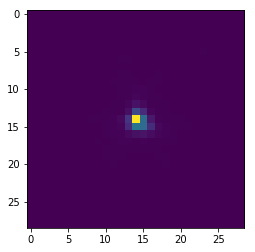

31 0 31
Box Size:  31 x 31
COM:  15.109287734387943 15.187051494035767
2dG:  15.208973263551453 15.185515098059316
375 24 



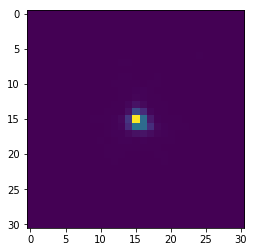

3 14 17
Box Size:  3 x 3
COM:  1.1867848296026293 1.2225833373186648
2dG:  1.2856948669053465 1.2257300936888882
376 25 



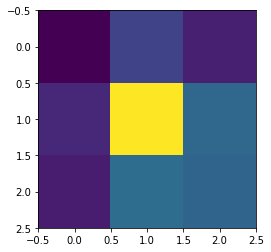

5 13 18
Box Size:  5 x 5
COM:  2.2249733308819533 2.3039492601187765
2dG:  2.2312604956106195 2.1949394905928425
377 25 



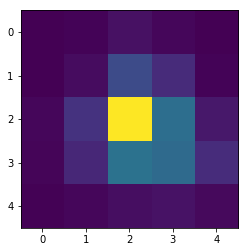

7 12 19
Box Size:  7 x 7
COM:  3.22836633711667 3.3053243259113585
2dG:  3.222736817718474 3.188674837989601
378 25 



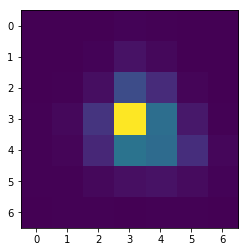

9 11 20
Box Size:  9 x 9
COM:  4.222811516895536 4.3106252584893605
2dG:  4.219905696375621 4.186502779641506
379 25 



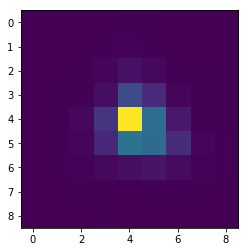

11 10 21
Box Size:  11 x 11
COM:  5.22318265410607 5.301643455801763
2dG:  5.218511252986467 5.1854148123816906
380 25 



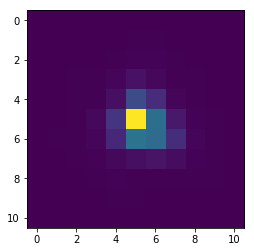

13 9 22
Box Size:  13 x 13
COM:  6.224365777589555 6.302843243286878
2dG:  6.217701436824872 6.184777218050892
381 25 



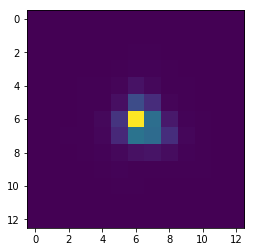

15 8 23
Box Size:  15 x 15
COM:  7.217574689072423 7.301780344556064
2dG:  7.2171852303668524 7.184368507388004
382 25 



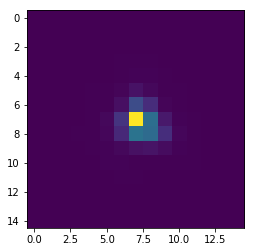

17 7 24
Box Size:  17 x 17
COM:  8.206730035878648 8.287479276181664
2dG:  8.216837607225449 8.184092236297161
383 25 



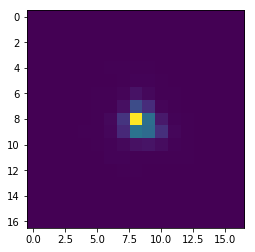

19 6 25
Box Size:  19 x 19
COM:  9.178634906845174 9.299715458200673
2dG:  9.216604646891266 9.183892702517118
384 25 



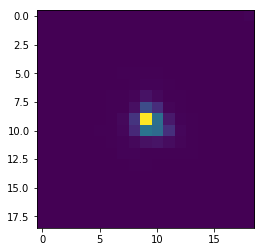

21 5 26
Box Size:  21 x 21
COM:  10.176003485389046 10.29452215712524
2dG:  10.216365645950177 10.183697122245244
385 25 



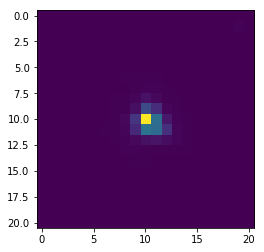

23 4 27
Box Size:  23 x 23
COM:  11.15843354413569 11.265061000253715
2dG:  11.216223811717583 11.183584326192566
386 25 



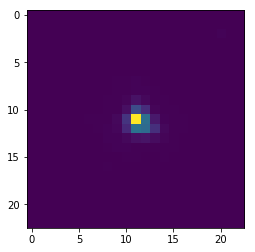

25 3 28
Box Size:  25 x 25
COM:  12.151843927357332 12.260193434489995
2dG:  12.216143925330899 12.18353478939343
387 25 



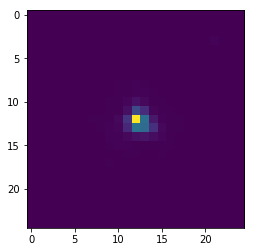

27 2 29
Box Size:  27 x 27
COM:  13.145981334241757 13.259936908046248
2dG:  13.215668509915174 13.182980805789251
388 25 



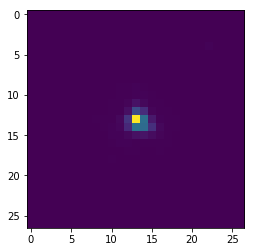

29 1 30
Box Size:  29 x 29
COM:  14.126451118133772 14.262769341507749
2dG:  14.215995982638734 14.183418023046183
389 25 



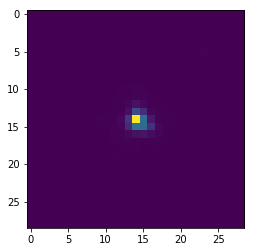

31 0 31
Box Size:  31 x 31
COM:  15.12039961714235 15.258921986032323
2dG:  15.215933076745522 15.183365968380214
390 25 



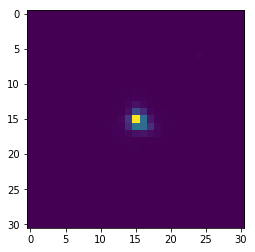

3 14 17
Box Size:  3 x 3
COM:  1.1843716406403988 1.2208789560498547
2dG:  1.2857483155509293 1.2230535549638544
391 26 



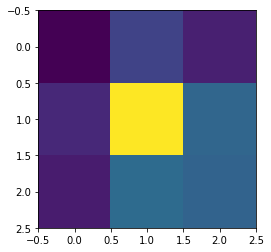

5 13 18
Box Size:  5 x 5
COM:  2.220395950694929 2.3031609821260153
2dG:  2.2297200599438924 2.1917856313542114
392 26 



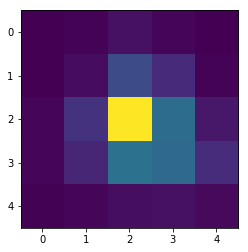

7 12 19
Box Size:  7 x 7
COM:  3.224779820681873 3.304305366708995
2dG:  3.2210927672722898 3.1855450493881925
393 26 



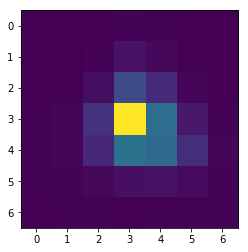

9 11 20
Box Size:  9 x 9
COM:  4.221876937925249 4.3089136382220525
2dG:  4.218202607872175 4.183361103996006
394 26 



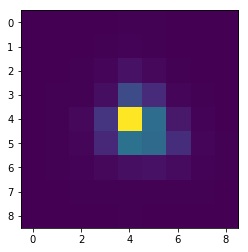

11 10 21
Box Size:  11 x 11
COM:  5.221035443508989 5.305294033091415
2dG:  5.216797847149683 5.182281288566441
395 26 



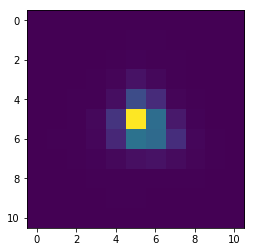

13 9 22
Box Size:  13 x 13
COM:  6.216647394254982 6.303501194523955
2dG:  6.215966461849741 6.18163633119337
396 26 



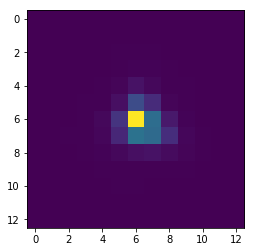

15 8 23
Box Size:  15 x 15
COM:  7.210742977209915 7.302530073412224
2dG:  7.215434965853464 7.181221624973793
397 26 



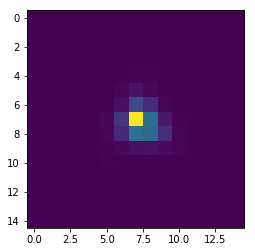

17 7 24
Box Size:  17 x 17
COM:  8.190156617304138 8.294311761456285
2dG:  8.215083472194005 8.180946335317946
398 26 



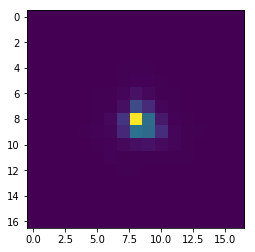

19 6 25
Box Size:  19 x 19
COM:  9.137073978816433 9.205251932663739
2dG:  9.214767764208995 9.18067289180614
399 26 



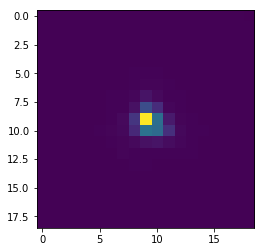

21 5 26
Box Size:  21 x 21
COM:  10.127730969467022 10.189969119253966
2dG:  10.214242103056144 10.180103648664069
400 26 



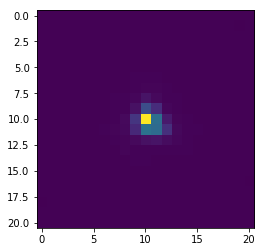

23 4 27
Box Size:  23 x 23
COM:  11.1202622351654 11.178142143673249
2dG:  11.214482710469921 11.180471908305071
401 26 



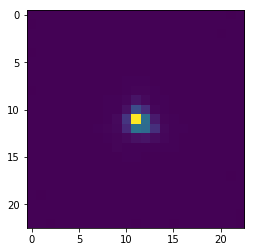

25 3 28
Box Size:  25 x 25
COM:  12.112482729353978 12.165070976704786
2dG:  12.214339339574336 12.180343064745253
402 26 



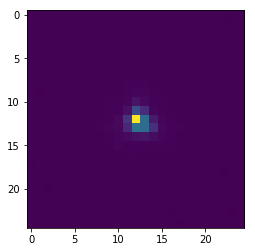

27 2 29
Box Size:  27 x 27
COM:  13.10339503568617 13.15553497736209
2dG:  13.214271833523908 13.180303300532117
403 26 



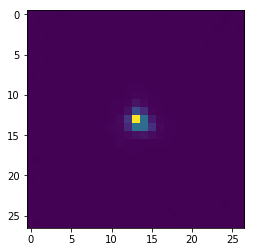

29 1 30
Box Size:  29 x 29
COM:  14.09449427170979 14.146236476286955
2dG:  14.211093370371254 14.17556415956888
404 26 



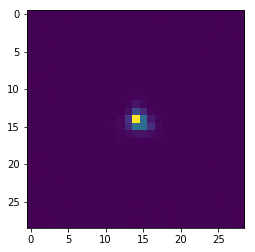

31 0 31
Box Size:  31 x 31
COM:  15.086345734613351 15.149460507894055
2dG:  15.213739918925663 15.179647555939678
405 26 



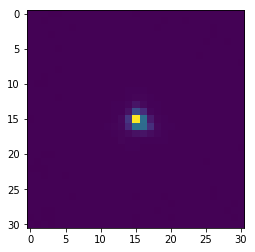

3 14 17
Box Size:  3 x 3
COM:  1.1807482178824151 1.215508499748273
2dG:  1.27695902348725 1.214420266354604
406 27 



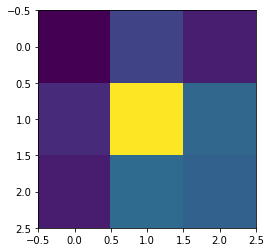

5 13 18
Box Size:  5 x 5
COM:  2.213114789374906 2.293578321173694
2dG:  2.2229806559262766 2.184209099353148
407 27 



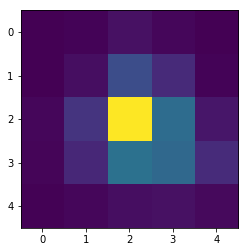

7 12 19
Box Size:  7 x 7
COM:  3.2174786169085143 3.2951723251698026
2dG:  3.2148005705319056 3.178354863941085
408 27 



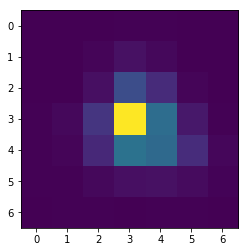

9 11 20
Box Size:  9 x 9
COM:  4.215747678314992 4.297533396659481
2dG:  4.2120464668316275 4.176302162566816
409 27 



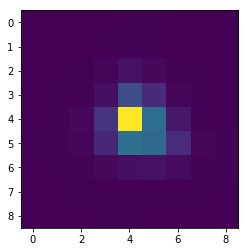

11 10 21
Box Size:  11 x 11
COM:  5.213380419341999 5.292524172436378
2dG:  5.210680014403238 5.175267456992282
410 27 



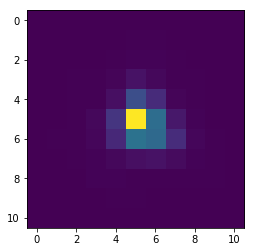

13 9 22
Box Size:  13 x 13
COM:  6.207719225544866 6.292192591585269
2dG:  6.209883745870624 6.174659352793413
411 27 



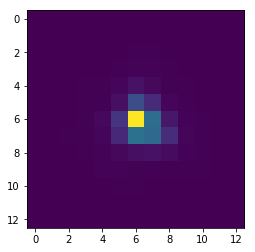

15 8 23
Box Size:  15 x 15
COM:  7.1975525219085155 7.289862961701877
2dG:  7.209372072055578 7.174266528243733
412 27 



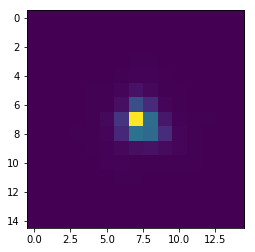

17 7 24
Box Size:  17 x 17
COM:  8.184460435431776 8.289300668693622
2dG:  8.209033783436295 8.174005918383397
413 27 



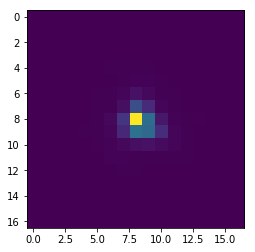

19 6 25
Box Size:  19 x 19
COM:  9.160161839786332 9.241890878576443
2dG:  9.208786094416297 9.173814444298403
414 27 



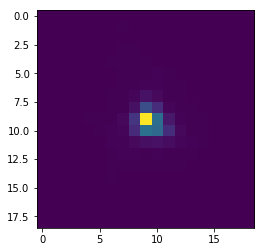

21 5 26
Box Size:  21 x 21
COM:  10.150209922124043 10.233112351636555
2dG:  10.182810745966364 10.14996713555103
415 27 



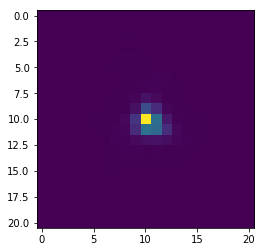

23 4 27
Box Size:  23 x 23
COM:  11.144605834591399 11.22562819321739
2dG:  11.208376504950408 11.173457087942626
416 27 



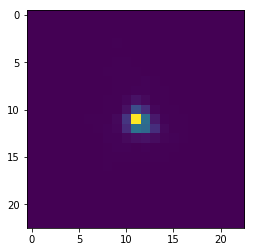

25 3 28
Box Size:  25 x 25
COM:  12.13036862128072 12.226136703645212
2dG:  12.208335622712896 12.173454000261414
417 27 



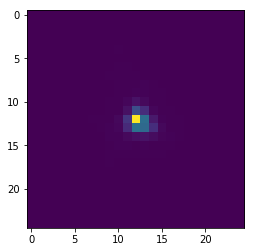

27 2 29
Box Size:  27 x 27
COM:  13.127882389193838 13.221814739938383
2dG:  13.208233879413658 13.173372377463213
418 27 



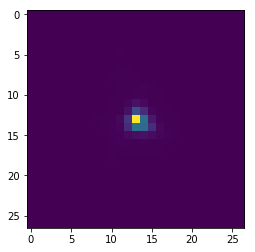

29 1 30
Box Size:  29 x 29
COM:  14.125743810378829 14.21263204795789
2dG:  14.208202315408837 14.173357150522614
419 27 



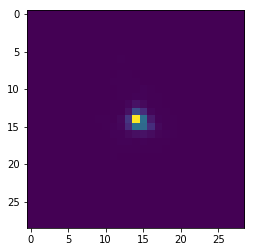

31 0 31
Box Size:  31 x 31
COM:  15.118255894277437 15.202774165553274
2dG:  15.208133742501126 15.173307930358021
420 27 



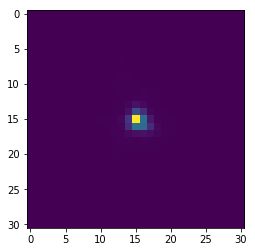

3 14 17
Box Size:  3 x 3
COM:  1.1885317782570175 1.206864490354018
2dG:  1.2605563094920773 1.2200425845072727
421 28 



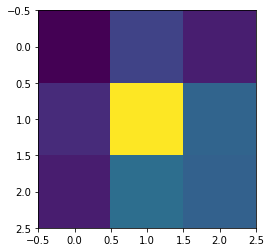

5 13 18
Box Size:  5 x 5
COM:  2.221288256731956 2.2832470965214906
2dG:  2.2138842265811816 2.191686983545637
422 28 



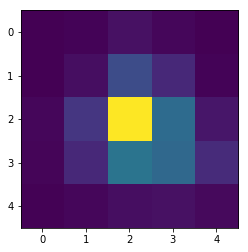

7 12 19
Box Size:  7 x 7
COM:  3.223071082246436 3.285238771903668
2dG:  3.206159958075216 3.185834630258645
423 28 



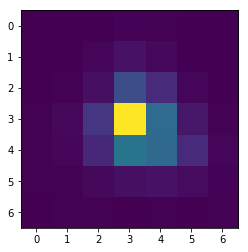

9 11 20
Box Size:  9 x 9
COM:  4.221008656825064 4.288247153124556
2dG:  4.203555202475394 4.1837969967589475
424 28 



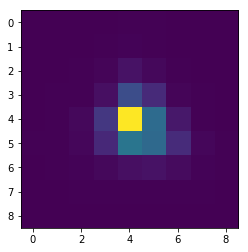

11 10 21
Box Size:  11 x 11
COM:  5.218351922225488 5.278737770217823
2dG:  5.2022571175679015 5.182769494624904
425 28 



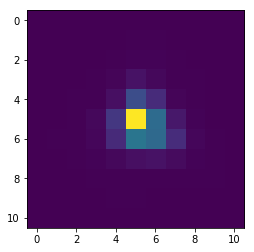

13 9 22
Box Size:  13 x 13
COM:  6.216870149862758 6.2773558196332955
2dG:  6.201500303625236 6.182166717056672
426 28 



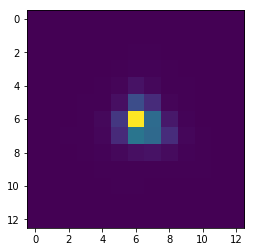

15 8 23
Box Size:  15 x 15
COM:  7.206043234373954 7.274296942142428
2dG:  7.201027816082208 7.18178897941465
427 28 



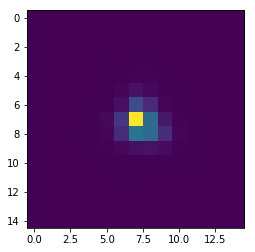

17 7 24
Box Size:  17 x 17
COM:  8.189473109438358 8.267023843696197
2dG:  8.20070555511741 8.18153072353964
428 28 



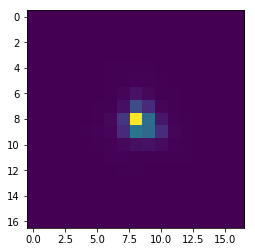

19 6 25
Box Size:  19 x 19
COM:  9.175413392949993 9.246433786532027
2dG:  9.20047155765688 9.181342900110643
429 28 



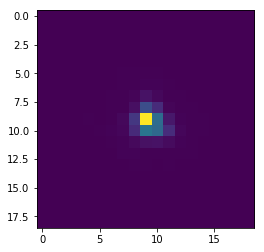

21 5 26
Box Size:  21 x 21
COM:  10.164936360100214 10.242722444005963
2dG:  10.20029684297067 10.18120232484461
430 28 



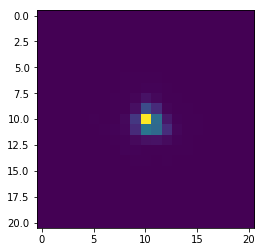

23 4 27
Box Size:  23 x 23
COM:  11.157993004341597 11.238052107507965
2dG:  11.20015875225934 11.181090481470767
431 28 



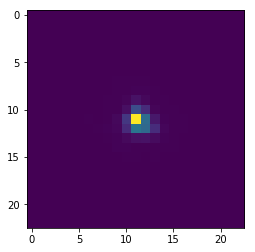

25 3 28
Box Size:  25 x 25
COM:  12.151672296829945 12.236352544743953
2dG:  12.199996558797547 12.180944457735787
432 28 



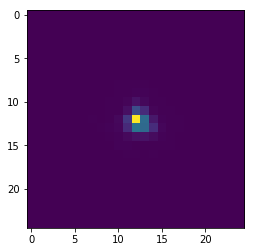

27 2 29
Box Size:  27 x 27
COM:  13.139485559247332 13.244996729495114
2dG:  13.199973092991405 13.180940904166482
433 28 



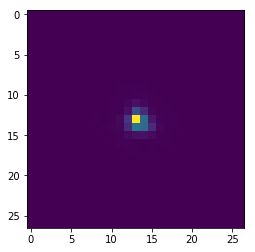

29 1 30
Box Size:  29 x 29
COM:  14.13236298274251 14.240170418420126
2dG:  14.19991384694355 14.180887949338635
434 28 



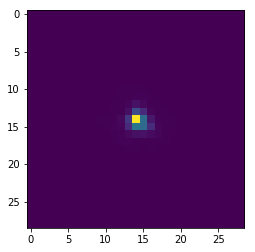

31 0 31
Box Size:  31 x 31
COM:  15.137651612949922 15.235124055259602
2dG:  15.199855702957814 15.180845927032605
435 28 



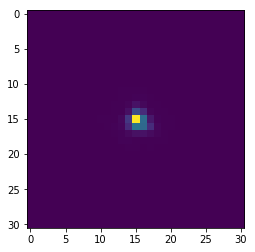

3 14 17
Box Size:  3 x 3
COM:  1.1933135314696972 1.2020782652215045
2dG:  1.250521530601631 1.223737874829313
436 29 



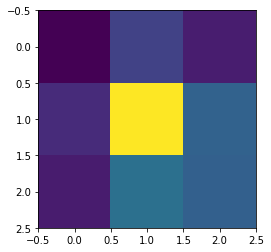

5 13 18
Box Size:  5 x 5
COM:  2.2276849108086645 2.276902503615778
2dG:  2.207648152899196 2.1963733606934817
437 29 



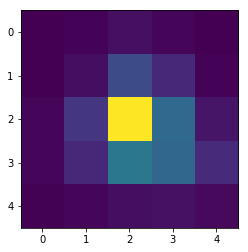

7 12 19
Box Size:  7 x 7
COM:  3.2299261164281896 3.278677184451119
2dG:  3.2001472138428397 3.1904853087845613
438 29 



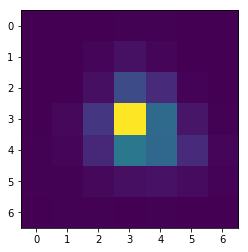

9 11 20
Box Size:  9 x 9
COM:  4.2251485646206595 4.281338388155519
2dG:  4.197611103068492 4.188440853490468
439 29 



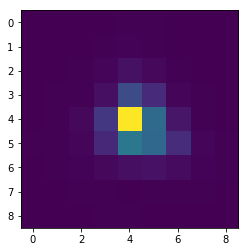

11 10 21
Box Size:  11 x 11
COM:  5.224490756085851 5.277386343358116
2dG:  5.196350111514879 5.187414825060597
440 29 



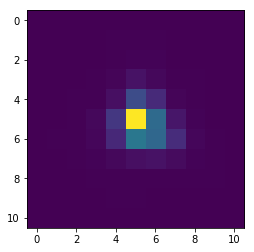

13 9 22
Box Size:  13 x 13
COM:  6.217940036908886 6.272149335381339
2dG:  6.195611865197674 6.18681129127822
441 29 



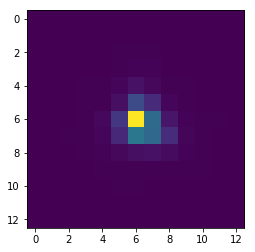

15 8 23
Box Size:  15 x 15
COM:  7.211845363305941 7.26966630932787
2dG:  7.195137335861368 7.186422269609753
442 29 



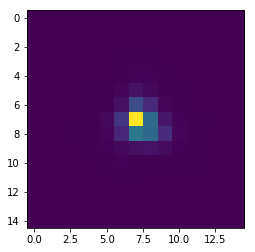

17 7 24
Box Size:  17 x 17
COM:  8.202917211823662 8.261653839733716
2dG:  8.194820977752087 8.186162417893847
443 29 



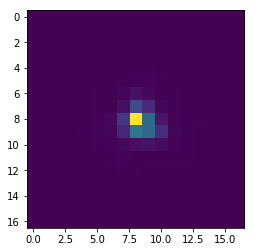

19 6 25
Box Size:  19 x 19
COM:  9.174867129566612 9.265028071879772
2dG:  9.194600692668132 9.185979452151914
444 29 



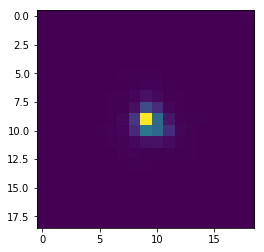

21 5 26
Box Size:  21 x 21
COM:  10.17288488158324 10.262264240913554
2dG:  10.194154966202715 10.18556389579664
445 29 



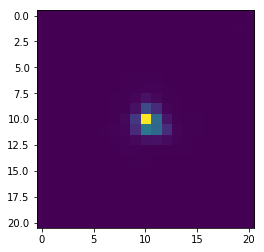

23 4 27
Box Size:  23 x 23
COM:  11.164389100798799 11.256173556749523
2dG:  11.194289628230816 11.18572129370465
446 29 



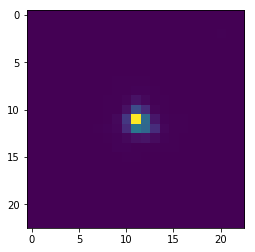

25 3 28
Box Size:  25 x 25
COM:  12.160574954718642 12.252304596169541
2dG:  12.186424936287912 12.178090698387138
447 29 



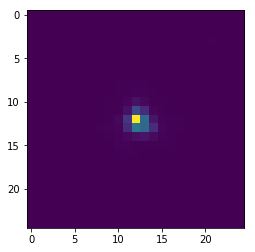

27 2 29
Box Size:  27 x 27
COM:  13.154748732530022 13.252826758466083
2dG:  13.194103604055558 13.185567334313516
448 29 



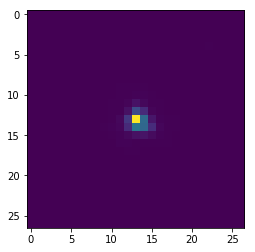

29 1 30
Box Size:  29 x 29
COM:  14.155371084108847 14.26231807217869
2dG:  14.194036378516804 14.185516031460702
449 29 



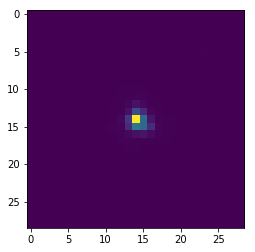

31 0 31
Box Size:  31 x 31
COM:  15.154157577874019 15.260402033309969
2dG:  15.193974473609902 15.185464188746726
450 29 



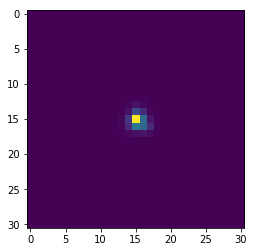

3 14 17
Box Size:  3 x 3
COM:  1.2037902095694633 1.1946704738797367
2dG:  1.2439755282994078 1.2347009555046733
451 30 



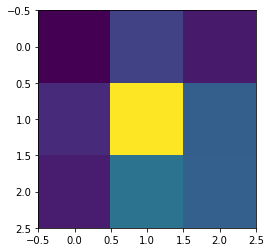

5 13 18
Box Size:  5 x 5
COM:  2.235797186870989 2.2672403068535663
2dG:  2.201403654193838 2.2060531440723627
452 30 



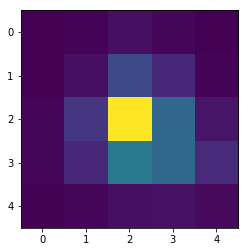

7 12 19
Box Size:  7 x 7
COM:  3.2375750954836744 3.26575688711865
2dG:  3.193925076081423 3.1999813299398836
453 30 



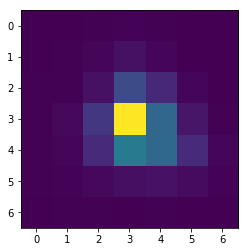

9 11 20
Box Size:  9 x 9
COM:  4.235679867344374 4.271924287114206
2dG:  4.191364561587225 4.197863626241576
454 30 



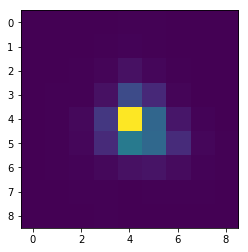

11 10 21
Box Size:  11 x 11
COM:  5.234769759134646 5.262033617449721
2dG:  5.190098012413481 5.196810455467676
455 30 



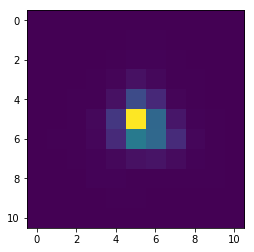

13 9 22
Box Size:  13 x 13
COM:  6.230469017803798 6.2616606623094775
2dG:  6.189342854688414 6.1961809705799995
456 30 



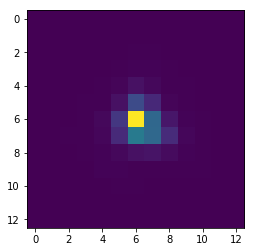

15 8 23
Box Size:  15 x 15
COM:  7.226591566466251 7.256605892182646
2dG:  7.188870079430631 7.195786336195353
457 30 



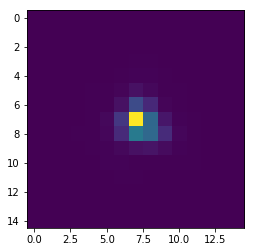

17 7 24
Box Size:  17 x 17
COM:  8.213519785019342 8.252916010305224
2dG:  8.188544348800711 8.195514223714987
458 30 



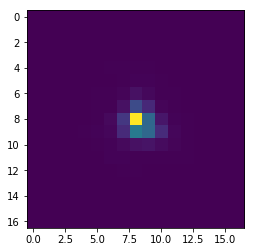

19 6 25
Box Size:  19 x 19
COM:  9.119579495253237 9.1206731580734
2dG:  10.905416361607301 9.042395370676394
459 30 



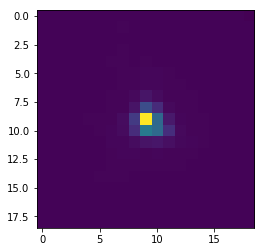

21 5 26
Box Size:  21 x 21
COM:  10.103645560095988 10.109579936382424
2dG:  10.173087044435844 10.180092384174765
460 30 



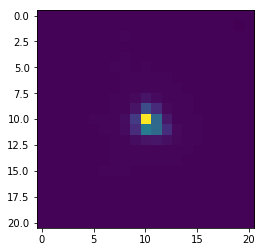

23 4 27
Box Size:  23 x 23
COM:  11.095201697473085 11.102780828024766
2dG:  11.187676350347358 11.194763873636393
461 30 



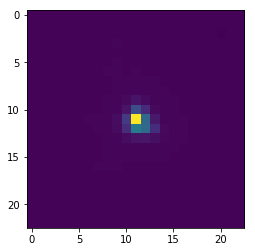

25 3 28
Box Size:  25 x 25
COM:  12.085269928645747 12.09283415670259
2dG:  12.187879345395215 12.194957634693571
462 30 



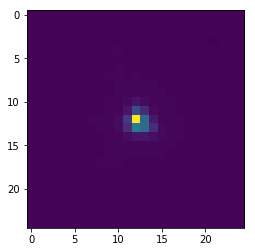

27 2 29
Box Size:  27 x 27
COM:  13.075758740947489 13.086443475889595
2dG:  13.1650468528087 13.169264692548454
463 30 



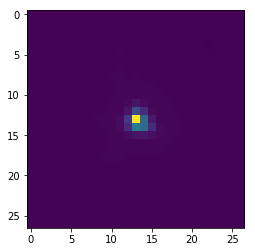

29 1 30
Box Size:  29 x 29
COM:  14.064921930329131 14.08217808836664
2dG:  14.187650444810117 14.194758042078144
464 30 



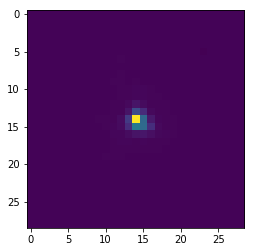

31 0 31
Box Size:  31 x 31
COM:  15.057671991023193 15.078501080253423
2dG:  15.186972629218952 15.194131395245075
465 30 



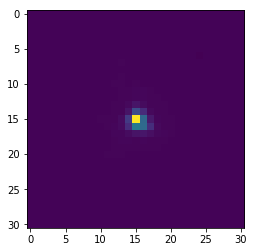

3 14 17
Box Size:  3 x 3
COM:  1.208601993127596 1.2000637500796472
2dG:  1.2509603628728598 1.2428204011333714
466 31 



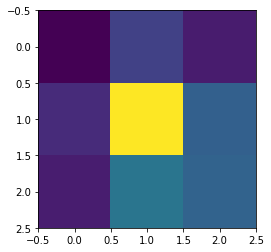

5 13 18
Box Size:  5 x 5
COM:  2.243930750630123 2.275519100149147
2dG:  2.208037527300536 2.213824439415148
467 31 



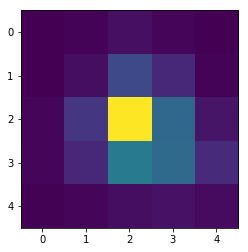

7 12 19
Box Size:  7 x 7
COM:  3.2455209556434546 3.278210818126289
2dG:  3.2005325489664735 3.2076494770585047
468 31 



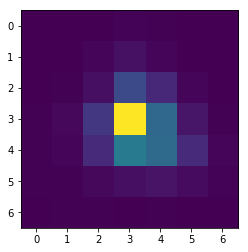

9 11 20
Box Size:  9 x 9
COM:  4.243438048721177 4.281165621143908
2dG:  4.197962878358512 4.205494584690348
469 31 



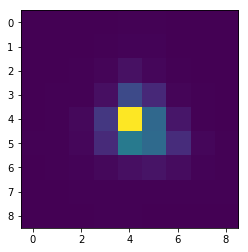

11 10 21
Box Size:  11 x 11
COM:  5.241834765560872 5.27618054307354
2dG:  5.1966795712085245 5.204412213849893
470 31 



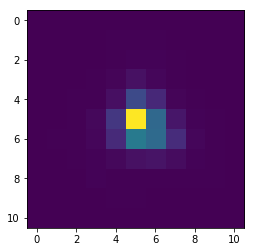

13 9 22
Box Size:  13 x 13
COM:  6.2343032077227285 6.2758034106183045
2dG:  6.195936672915729 6.203783953692649
471 31 



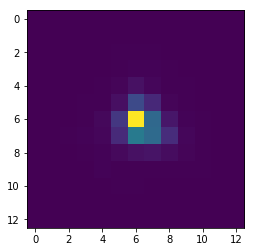

15 8 23
Box Size:  15 x 15
COM:  7.231017328107098 7.273012700321853
2dG:  7.1954608882112545 7.203380984593225
472 31 



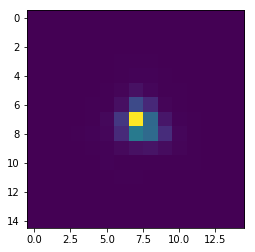

17 7 24
Box Size:  17 x 17
COM:  8.216899317344119 8.268298670737606
2dG:  8.195139691891546 8.20310870150802
473 31 



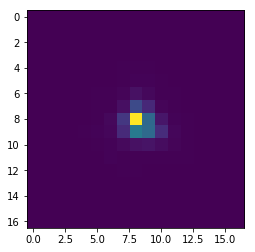

19 6 25
Box Size:  19 x 19
COM:  9.192128225004382 9.273578209174591
2dG:  9.194914638294424 9.202917658291987
474 31 



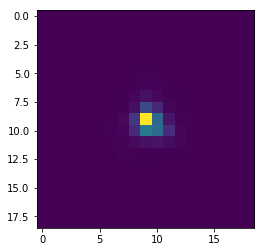

21 5 26
Box Size:  21 x 21
COM:  10.18513027025493 10.266905007869426
2dG:  10.19474253672266 10.202771877794145
475 31 



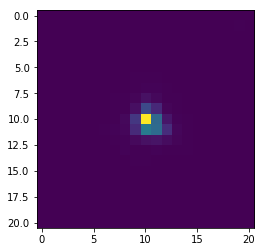

23 4 27
Box Size:  23 x 23
COM:  11.176325467213108 11.267115439276797
2dG:  11.19461286020029 11.202650490296627
476 31 



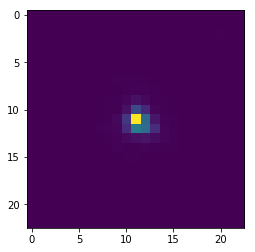

25 3 28
Box Size:  25 x 25
COM:  12.169202483086623 12.263936743684546
2dG:  12.194500103804616 12.202560370615993
477 31 



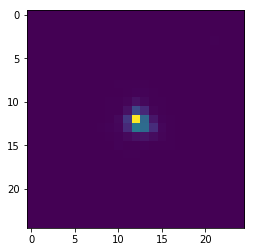

27 2 29
Box Size:  27 x 27
COM:  13.171086786015893 13.25661011016229
2dG:  13.19442478890169 13.202493990902166
478 31 



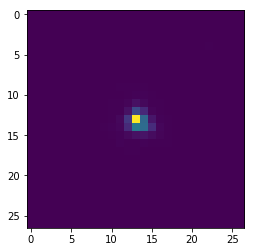

29 1 30
Box Size:  29 x 29
COM:  14.151585507656096 14.241286334522949
2dG:  14.19429920784303 14.202387015755578
479 31 



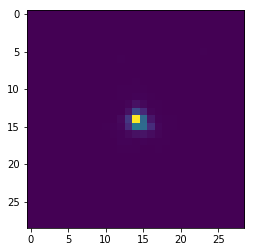

31 0 31
Box Size:  31 x 31
COM:  15.145982640328674 15.243225257359462
2dG:  15.1943031149648 15.202397462912753
480 31 



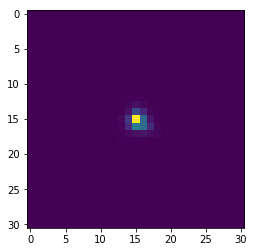

3 14 17
Box Size:  3 x 3
COM:  1.211515135365754 1.1997039136641174
2dG:  1.255554624022492 1.2469301909432682
481 32 



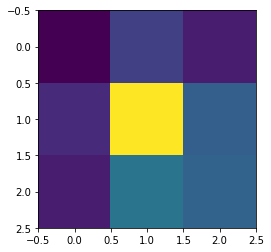

5 13 18
Box Size:  5 x 5
COM:  2.247344252721471 2.2779990177488836
2dG:  2.2096140856491453 2.2163756976200006
482 32 



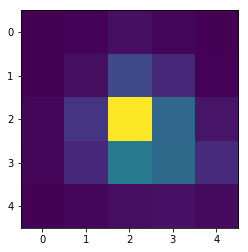

7 12 19
Box Size:  7 x 7
COM:  3.251742538562483 3.2799755147379095
2dG:  3.201808324369261 3.2099990905966256
483 32 



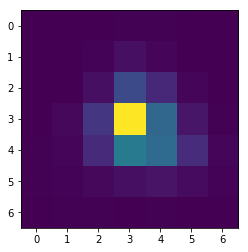

9 11 20
Box Size:  9 x 9
COM:  4.247390901811575 4.283392130560285
2dG:  4.19915568295844 4.207790281580307
484 32 



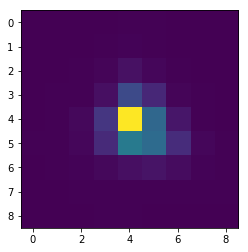

11 10 21
Box Size:  11 x 11
COM:  5.250182416288179 5.280768109844339
2dG:  5.197835390928813 5.206684743310546
485 32 



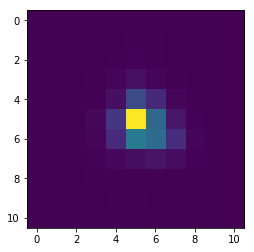

13 9 22
Box Size:  13 x 13
COM:  6.245794792485609 6.276767163927234
2dG:  6.197057424394724 6.206031641352795
486 32 



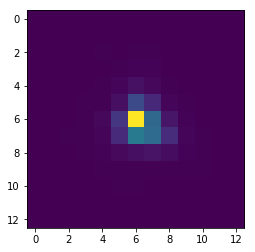

15 8 23
Box Size:  15 x 15
COM:  7.238736497266061 7.273258796007717
2dG:  7.196570621932065 7.205622397638047
487 32 



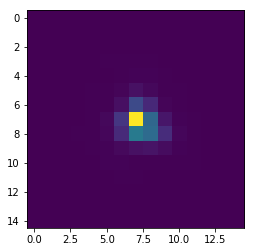

17 7 24
Box Size:  17 x 17
COM:  8.22958350420685 8.269029095853561
2dG:  8.196241250095529 8.205345268743956
488 32 



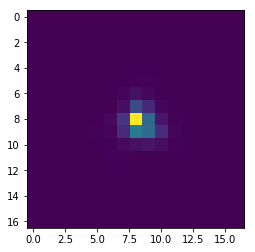

19 6 25
Box Size:  19 x 19
COM:  9.196085821076457 9.273972294542219
2dG:  9.195778784862044 9.204944270739016
489 32 



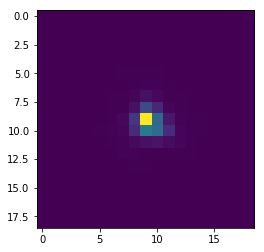

21 5 26
Box Size:  21 x 21
COM:  10.192358945278018 10.267438327996855
2dG:  10.195653394158683 10.204834016066458
490 32 



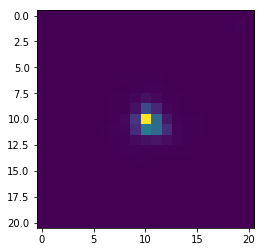

23 4 27
Box Size:  23 x 23
COM:  11.18378546056674 11.254030972184717
2dG:  11.19556095022852 11.204763095258457
491 32 



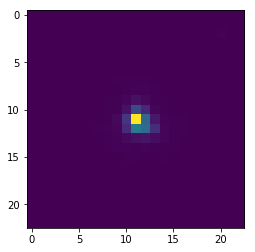

25 3 28
Box Size:  25 x 25
COM:  12.177732722129265 12.248211077170938
2dG:  12.195559019249192 12.204769405789062
492 32 



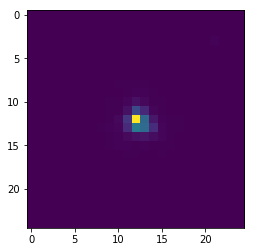

27 2 29
Box Size:  27 x 27
COM:  13.17646089086493 13.24803069663079
2dG:  13.19549444627197 13.204716371243272
493 32 



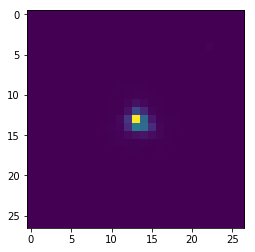

29 1 30
Box Size:  29 x 29
COM:  14.17530966394525 14.244931910675026
2dG:  14.195425129562366 14.204657995460447
494 32 



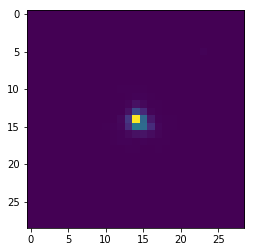

31 0 31
Box Size:  31 x 31
COM:  15.167155104184786 15.25179559257344
2dG:  15.195370078408864 15.204610441310876
495 32 



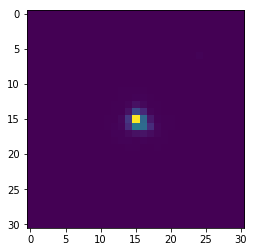

3 14 17
Box Size:  3 x 3
COM:  1.206485353930157 1.2059283334511293
2dG:  1.2607434430150009 1.2436226825258065
496 33 



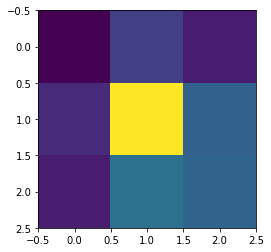

5 13 18
Box Size:  5 x 5
COM:  2.2447670856052335 2.2856384352209154
2dG:  2.2149232672846675 2.2137378042878786
497 33 



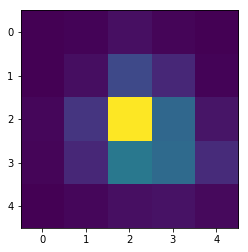

7 12 19
Box Size:  7 x 7
COM:  3.2454670180478775 3.285950286392558
2dG:  3.2070248502734544 3.207350895184863
498 33 



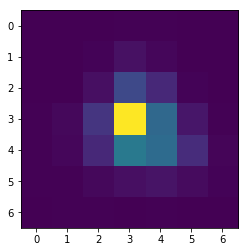

9 11 20
Box Size:  9 x 9
COM:  4.241873260971805 4.290445959417662
2dG:  4.20431219799272 4.205103090658563
499 33 



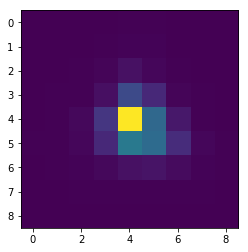

11 10 21
Box Size:  11 x 11
COM:  5.239854624703705 5.283707780687948
2dG:  5.202976925143619 5.203987467961348
500 33 



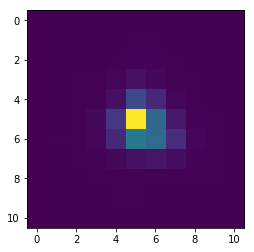

13 9 22
Box Size:  13 x 13
COM:  6.234594275431483 6.279587211596378
2dG:  6.202193736799548 6.203330429142833
501 33 



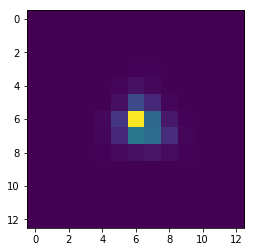

15 8 23
Box Size:  15 x 15
COM:  7.228773513212019 7.279354172642168
2dG:  7.20170192134243 7.202916840153696
502 33 



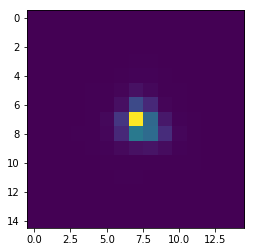

17 7 24
Box Size:  17 x 17
COM:  8.207607939915135 8.269033020057254
2dG:  8.201361945578416 8.20263049872272
503 33 



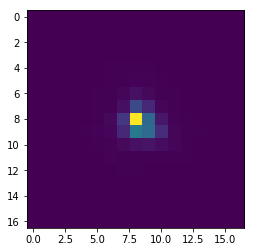

19 6 25
Box Size:  19 x 19
COM:  9.189086963041863 9.244409335422459
2dG:  9.201119632315306 9.202426185543688
504 33 



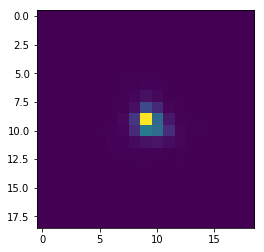

21 5 26
Box Size:  21 x 21
COM:  10.183946422265398 10.233466973627152
2dG:  10.200937761261214 10.202269685898687
505 33 



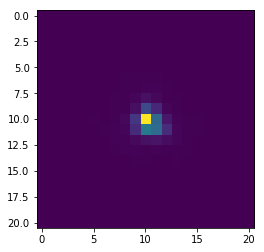

23 4 27
Box Size:  23 x 23
COM:  11.186702719879277 11.231780943014247
2dG:  11.20072487837322 11.202079582918385
506 33 



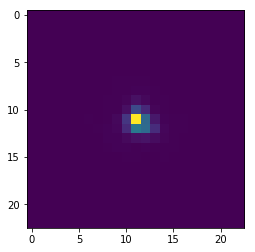

25 3 28
Box Size:  25 x 25
COM:  12.24155846058757 12.270591038682944
2dG:  12.20070426087298 12.202075519880372
507 33 



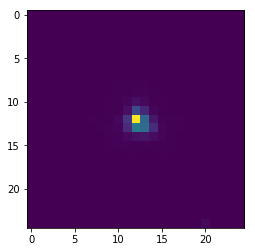

27 2 29
Box Size:  27 x 27
COM:  13.234639349040448 13.279972064138505
2dG:  13.200616110371437 13.202001046578175
508 33 



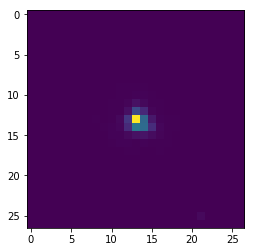

29 1 30
Box Size:  29 x 29
COM:  14.232417247247357 14.280235305619833
2dG:  14.200551361286653 14.201945353810489
509 33 



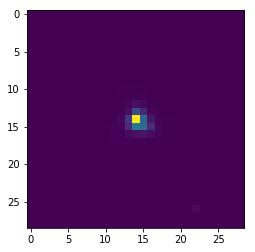

31 0 31
Box Size:  31 x 31
COM:  15.23534029258422 15.27488218423021
2dG:  15.199989753175009 15.201401382405578
510 33 



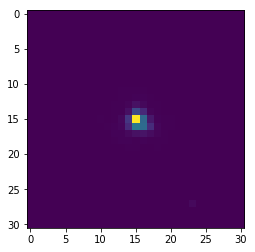

3 14 17
Box Size:  3 x 3
COM:  1.1941671068237873 1.2067735479260893
2dG:  1.2604115219883412 1.229214639906353
511 34 



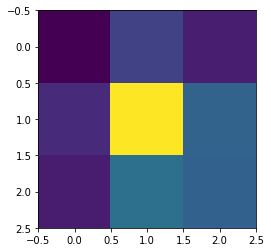

5 13 18
Box Size:  5 x 5
COM:  2.2309893943830508 2.2844794360060656
2dG:  2.213765823075509 2.200134466774932
512 34 



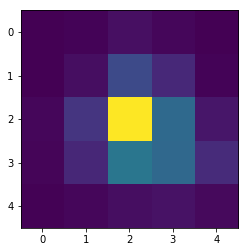

7 12 19
Box Size:  7 x 7
COM:  3.2348358564404753 3.2864186054105335
2dG:  3.2057844899654317 3.1939109568188524
513 34 



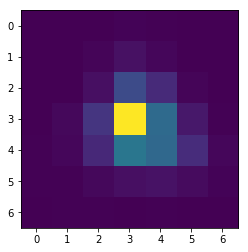

9 11 20
Box Size:  9 x 9
COM:  4.231960256808603 4.292293965560009
2dG:  4.20308620215495 4.1917422384261
514 34 



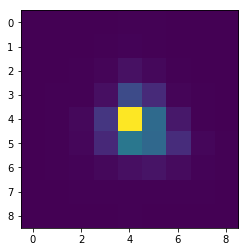

11 10 21
Box Size:  11 x 11
COM:  5.228697675694214 5.284608796633692
2dG:  5.201750506958867 5.190656947696977
515 34 



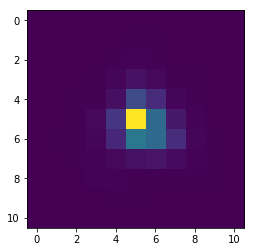

13 9 22
Box Size:  13 x 13
COM:  6.2226339343501715 6.283690865123292
2dG:  6.200962989850613 6.1900134545981835
516 34 



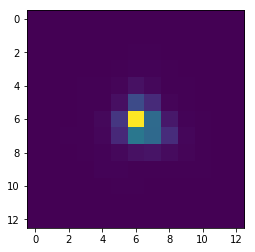

15 8 23
Box Size:  15 x 15
COM:  7.21997925060718 7.283395698254015
2dG:  7.200467218082884 7.189606978505077
517 34 



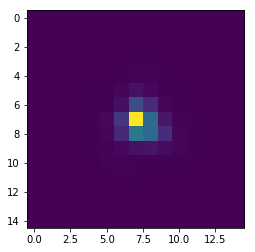

17 7 24
Box Size:  17 x 17
COM:  8.205016844586709 8.27924266111153
2dG:  8.200135461338709 8.189334366309312
518 34 



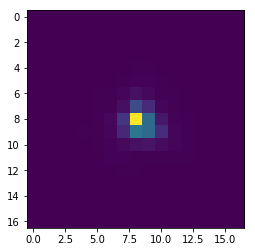

19 6 25
Box Size:  19 x 19
COM:  9.178260863566836 9.28267208010383
2dG:  9.199885396382856 9.189124407502302
519 34 



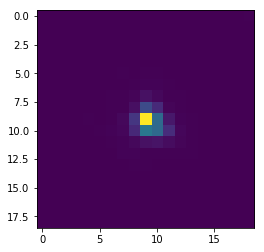

21 5 26
Box Size:  21 x 21
COM:  10.172640580164924 10.282405113730427
2dG:  10.199723733834993 10.188991104093843
520 34 



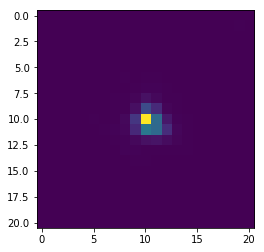

23 4 27
Box Size:  23 x 23
COM:  11.161903800425385 11.277582530413413
2dG:  11.199559989719058 11.188853219728365
521 34 



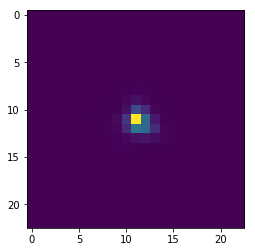

25 3 28
Box Size:  25 x 25
COM:  12.153602007664137 12.275472083805985
2dG:  12.199466560307739 12.188778889576875
522 34 



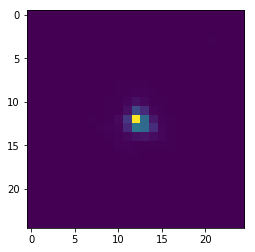

27 2 29
Box Size:  27 x 27
COM:  13.154141400000064 13.27919078119938
2dG:  13.199385720359508 13.188715768095204
523 34 



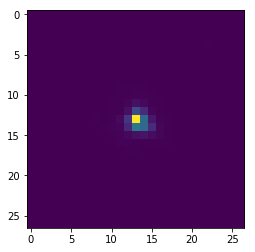

29 1 30
Box Size:  29 x 29
COM:  14.140082104368613 14.28242804933023
2dG:  14.199315116961548 14.1886574652
524 34 



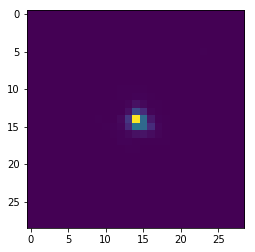

31 0 31
Box Size:  31 x 31
COM:  15.141722408916872 15.282169341789064
2dG:  15.199254939376909 15.188607625077836
525 34 



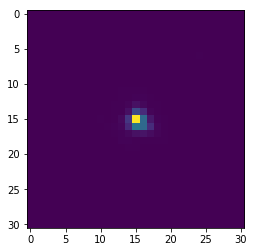

3 14 17
Box Size:  3 x 3
COM:  1.1932308535966376 1.2129968033191505
2dG:  1.2708767024757706 1.2286992539026742
526 35 



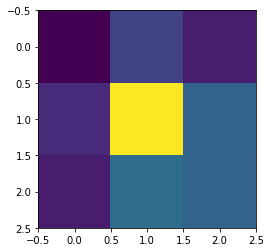

5 13 18
Box Size:  5 x 5
COM:  2.2282770147206796 2.292302376969027
2dG:  2.2213772136067114 2.1988984097911217
527 35 



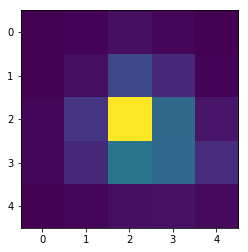

7 12 19
Box Size:  7 x 7
COM:  3.232555548999792 3.294985326834134
2dG:  3.21323872766058 3.1926990920757907
528 35 



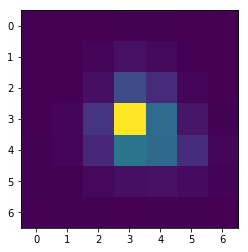

9 11 20
Box Size:  9 x 9
COM:  4.22765090602364 4.297631673992135
2dG:  4.210473680040785 4.190520114946014
529 35 



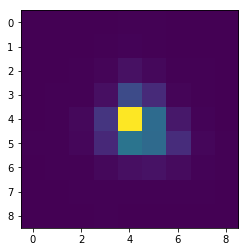

11 10 21
Box Size:  11 x 11
COM:  5.226698546519533 5.293504465665661
2dG:  5.20911234152657 5.189433553254324
530 35 



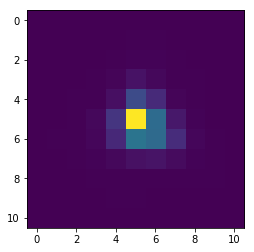

13 9 22
Box Size:  13 x 13
COM:  6.221967488585248 6.290073069271365
2dG:  6.208316196544663 6.188793805195166
531 35 



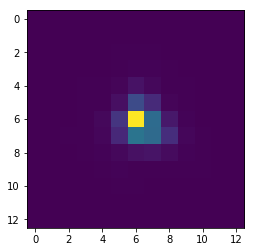

15 8 23
Box Size:  15 x 15
COM:  7.210394993346285 7.28245412616694
2dG:  7.2078078412868996 7.188383637096357
532 35 



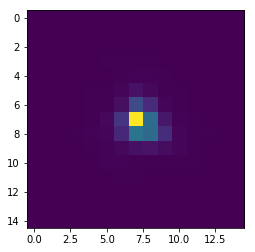

17 7 24
Box Size:  17 x 17
COM:  8.196960951240932 8.276726046727257
2dG:  8.207468376766935 8.188109000896395
533 35 



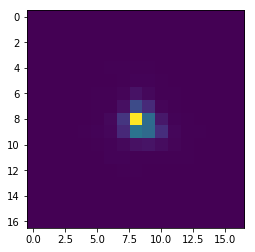

19 6 25
Box Size:  19 x 19
COM:  9.172906117470248 9.286880410456973
2dG:  9.207242015796174 9.187907692027753
534 35 



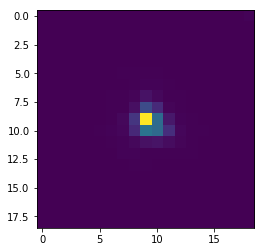

21 5 26
Box Size:  21 x 21
COM:  10.168499914808738 10.280174920187006
2dG:  10.207044471834624 10.187762243295316
535 35 



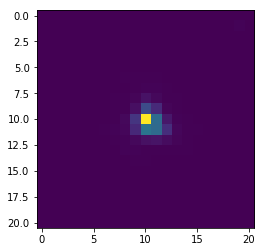

23 4 27
Box Size:  23 x 23
COM:  11.173513717800878 11.279184440525938
2dG:  11.206879153636255 11.187623359570596
536 35 



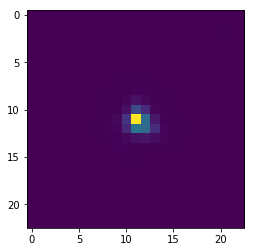

25 3 28
Box Size:  25 x 25
COM:  12.15643493670564 12.266059317765269
2dG:  12.205988423801609 12.18669760143244
537 35 



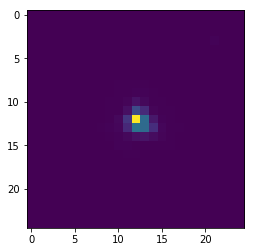

27 2 29
Box Size:  27 x 27
COM:  13.154482637052052 13.267000327059495
2dG:  13.206291501091751 13.187031292208545
538 35 



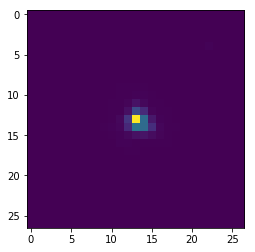

29 1 30
Box Size:  29 x 29
COM:  14.156546045934826 14.265522611213807
2dG:  14.206624688185647 14.18742085038092
539 35 



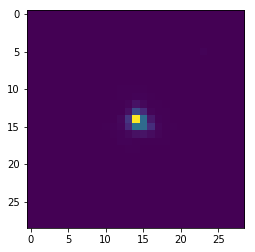

31 0 31
Box Size:  31 x 31
COM:  15.11791830818499 15.22709250987834
2dG:  15.206395043764287 15.187171489960587
540 35 



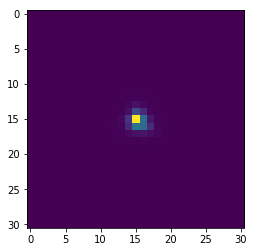

3 14 17
Box Size:  3 x 3
COM:  1.180837156880459 1.2211337370816011
2dG:  1.2836801168997447 1.217770497943285
541 36 



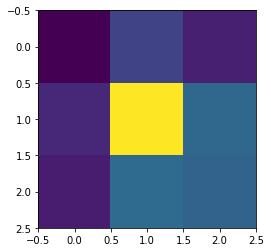

5 13 18
Box Size:  5 x 5
COM:  2.215288450415442 2.301422977876295
2dG:  2.228722318018866 2.1873843285228007
542 36 



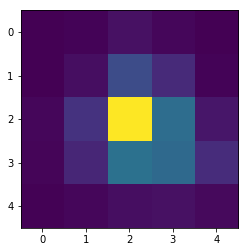

7 12 19
Box Size:  7 x 7
COM:  3.2182351805289335 3.3023720617185974
2dG:  3.2201573473204412 3.181286478846695
543 36 



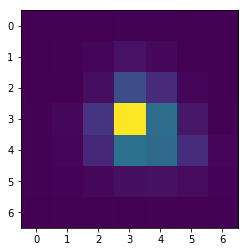

9 11 20
Box Size:  9 x 9
COM:  4.213754288370212 4.305221406576742
2dG:  4.217317710554019 4.1791727856967364
544 36 



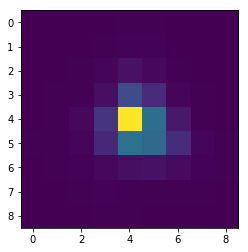

11 10 21
Box Size:  11 x 11
COM:  5.212818098573927 5.298531143528301
2dG:  5.215925344467684 5.178118175463161
545 36 



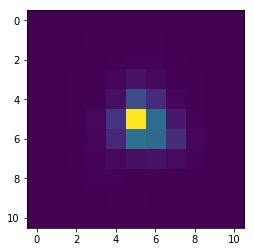

13 9 22
Box Size:  13 x 13
COM:  6.210884796624767 6.301453786106996
2dG:  6.215111297880658 6.177495796855175
546 36 



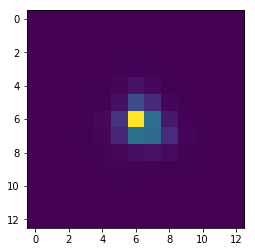

15 8 23
Box Size:  15 x 15
COM:  7.206780185236678 7.3002489645047
2dG:  7.214591748048195 7.177096257586103
547 36 



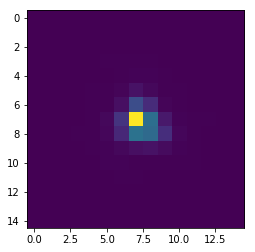

17 7 24
Box Size:  17 x 17
COM:  8.19501979785208 8.293764650519767
2dG:  8.214239722361361 8.176824495134502
548 36 



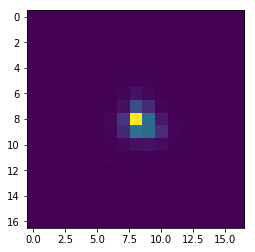

19 6 25
Box Size:  19 x 19
COM:  9.16418082783429 9.302576661887892
2dG:  9.213981639512244 9.176616739068225
549 36 



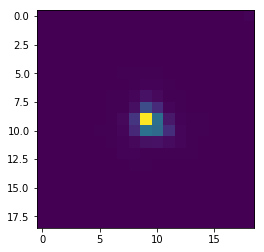

21 5 26
Box Size:  21 x 21
COM:  10.159334939893753 10.29727699793872
2dG:  10.212571680166727 10.175319425314308
550 36 



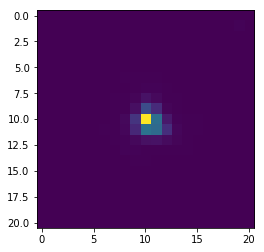

23 4 27
Box Size:  23 x 23
COM:  11.159670988733682 11.297687180264372
2dG:  11.213655501646791 11.176370803837516
551 36 



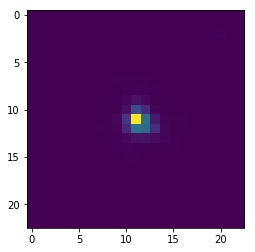

25 3 28
Box Size:  25 x 25
COM:  12.16436849349024 12.28930292054928
2dG:  12.213479165580534 12.176199483962726
552 36 



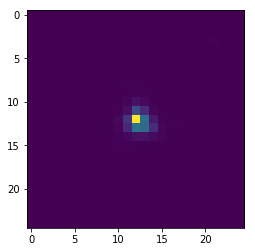

27 2 29
Box Size:  27 x 27
COM:  13.150038125431479 13.29090385843263
2dG:  13.213453049946207 13.176212716904859
553 36 



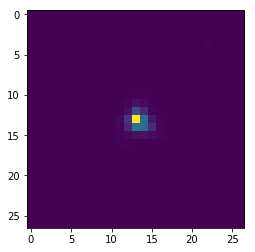

29 1 30
Box Size:  29 x 29
COM:  14.145658076165965 14.291386026876257
2dG:  14.213131477491252 14.175836435072451
554 36 



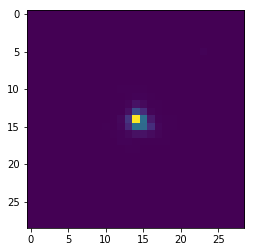

31 0 31
Box Size:  31 x 31
COM:  15.138703751590777 15.2950266718251
2dG:  15.213292013097423 15.17607712010464
555 36 



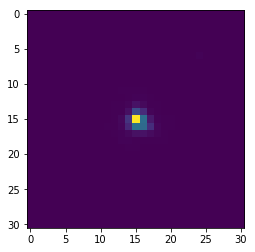

3 14 17
Box Size:  3 x 3
COM:  1.168477912508272 1.2247546729807488
2dG:  1.2861251621696568 1.2025900524059947
556 37 



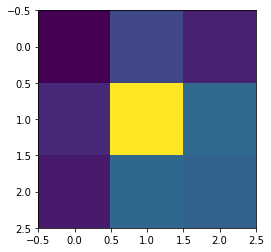

5 13 18
Box Size:  5 x 5
COM:  2.2012191145331172 2.3033485052937532
2dG:  2.2306707977508964 2.173411954089529
557 37 



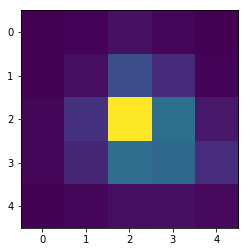

7 12 19
Box Size:  7 x 7
COM:  3.2047892497907435 3.304781020571842
2dG:  3.2222681786139513 3.167676818665901
558 37 



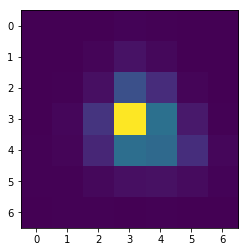

9 11 20
Box Size:  9 x 9
COM:  4.202107784627143 4.3095729118451
2dG:  4.219458797371675 4.165657144490884
559 37 



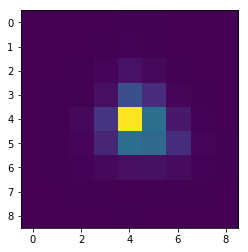

11 10 21
Box Size:  11 x 11
COM:  5.202267943852303 5.304359285617574
2dG:  5.218092394609361 5.164653732336054
560 37 



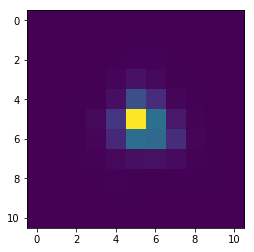

13 9 22
Box Size:  13 x 13
COM:  6.194624051184777 6.301844306531031
2dG:  6.217293853192437 6.1640604885256085
561 37 



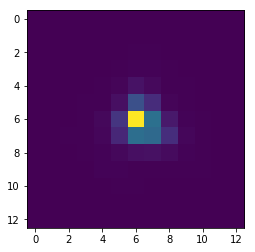

15 8 23
Box Size:  15 x 15
COM:  7.184890065139457 7.29738870516122
2dG:  7.216784224850737 7.163679106900447
562 37 



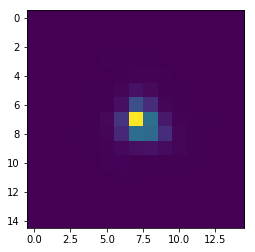

17 7 24
Box Size:  17 x 17
COM:  8.174265642187073 8.290942938509632
2dG:  8.21644329901363 8.163422738915273
563 37 



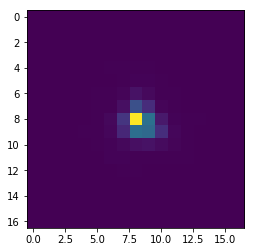

19 6 25
Box Size:  19 x 19
COM:  9.150934478435445 9.293505077075825
2dG:  9.21611412210055 9.16312119394626
564 37 



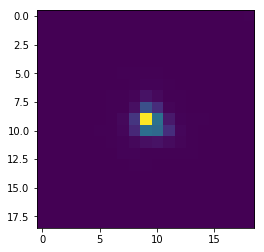

21 5 26
Box Size:  21 x 21
COM:  10.142930346539437 10.284896227114489
2dG:  10.21601962755468 10.163101574177384
565 37 



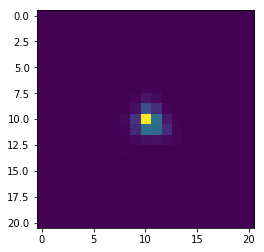

23 4 27
Box Size:  23 x 23
COM:  11.134003484255732 11.269809242297153
2dG:  11.215857000423481 11.162966749996933
566 37 



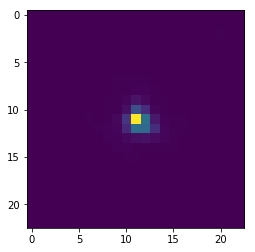

25 3 28
Box Size:  25 x 25
COM:  12.121289806900808 12.268888586258816
2dG:  12.215763490025054 12.162905978839188
567 37 



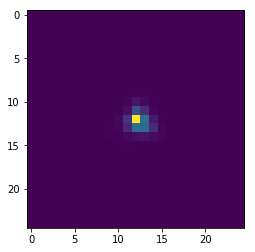

27 2 29
Box Size:  27 x 27
COM:  13.11408963159648 13.269752141393628
2dG:  13.215673734932153 13.162836711744282
568 37 



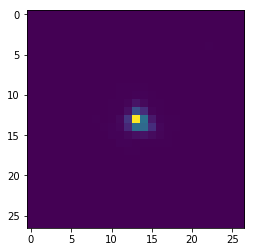

29 1 30
Box Size:  29 x 29
COM:  14.110744555733117 14.273103035953017
2dG:  14.21550183921972 14.16264544419071
569 37 



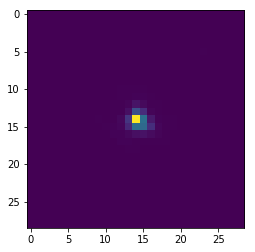

31 0 31
Box Size:  31 x 31
COM:  15.10817225129488 15.27347061397045
2dG:  15.215558197524988 15.16274830113897
570 37 



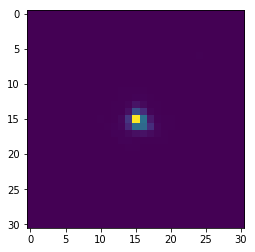

3 14 17
Box Size:  3 x 3
COM:  1.162043634242227 1.2248077326573492
2dG:  1.284316412156428 1.192039813119231
571 38 



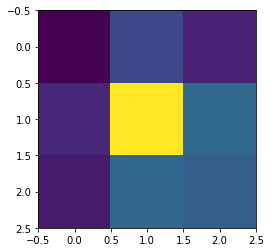

5 13 18
Box Size:  5 x 5
COM:  2.1931185041465526 2.305306752200997
2dG:  2.2294827908374404 2.164090848958977
572 38 



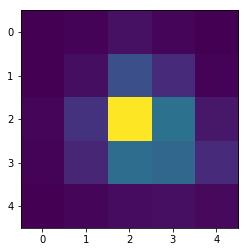

7 12 19
Box Size:  7 x 7
COM:  3.1944459744804385 3.3058228003463657
2dG:  3.221160146166247 3.15861880264434
573 38 



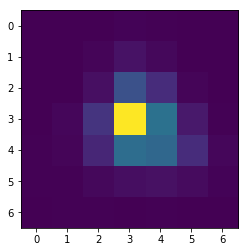

9 11 20
Box Size:  9 x 9
COM:  4.190364602954536 4.308155869270306
2dG:  4.218419502749787 4.156718666807577
574 38 



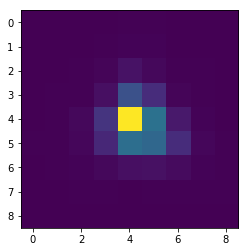

11 10 21
Box Size:  11 x 11
COM:  5.185635534716477 5.301366075300873
2dG:  5.2170746363907075 5.15576593163046
575 38 



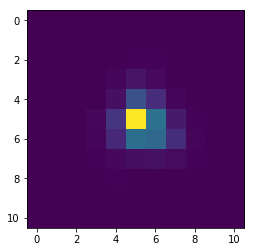

13 9 22
Box Size:  13 x 13
COM:  6.182972809534414 6.3017410278891495
2dG:  6.216283016384667 6.155198427742229
576 38 



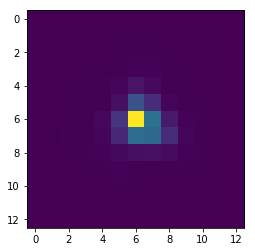

15 8 23
Box Size:  15 x 15
COM:  7.177893156873262 7.301540588198231
2dG:  7.215787501326223 7.154840566371488
577 38 



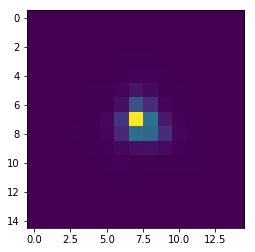

17 7 24
Box Size:  17 x 17
COM:  8.159762200026158 8.285276141816988
2dG:  8.21545483154574 8.154599124669552
578 38 



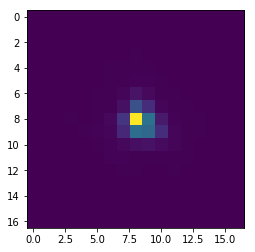

19 6 25
Box Size:  19 x 19
COM:  9.127652987026757 9.21634820654364
2dG:  9.193397251123603 9.132397580233267
579 38 



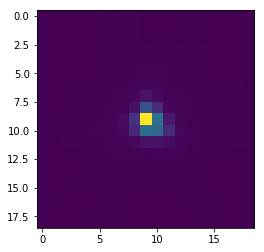

21 5 26
Box Size:  21 x 21
COM:  10.116432048443293 10.201751521925127
2dG:  10.21499968022979 10.154244405044535
580 38 



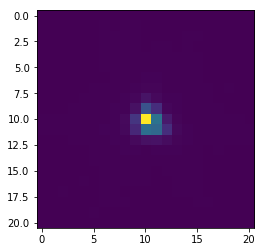

23 4 27
Box Size:  23 x 23
COM:  11.105550682056904 11.188429814590071
2dG:  11.175401725953082 10.985931571570791
581 38 



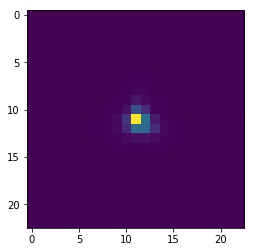

25 3 28
Box Size:  25 x 25
COM:  12.096850089119227 12.171821866230252
2dG:  12.214792156606478 12.154110208262413
582 38 



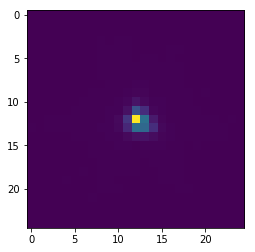

27 2 29
Box Size:  27 x 27
COM:  13.084230123805952 13.163863074233797
2dG:  13.214673468427323 13.154009701569416
583 38 



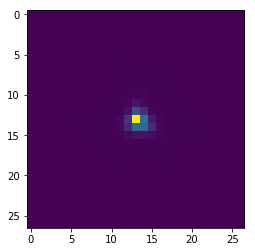

29 1 30
Box Size:  29 x 29
COM:  14.078007588296797 14.156796218214316
2dG:  14.214619439212669 14.153963491143129
584 38 



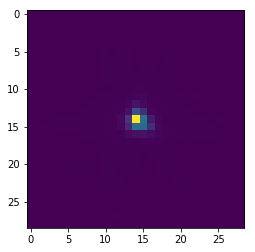

31 0 31
Box Size:  31 x 31
COM:  15.076511163108004 15.143881303318667
2dG:  15.214574951420385 15.153936564516911
585 38 



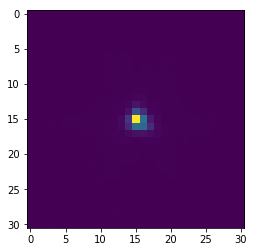

3 14 17
Box Size:  3 x 3
COM:  1.153934100369032 1.2180063955499014
2dG:  1.2719171036837902 1.1776949889486292
586 39 



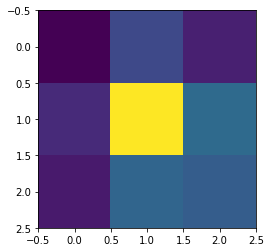

5 13 18
Box Size:  5 x 5
COM:  2.185582310108123 2.296921729599245
2dG:  2.2222233986655047 2.1529462614422137
587 39 



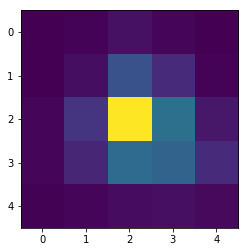

7 12 19
Box Size:  7 x 7
COM:  3.187891551510838 3.299287676792283
2dG:  3.2142075176000686 3.1478571267556124
588 39 



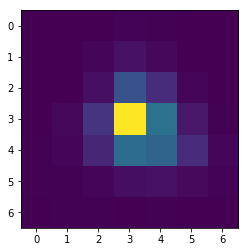

9 11 20
Box Size:  9 x 9
COM:  4.181687347656001 4.301114934852561
2dG:  4.211532687353506 4.146067583402224
589 39 



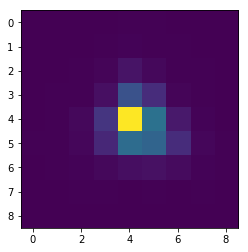

11 10 21
Box Size:  11 x 11
COM:  5.178062332162743 5.29278666607832
2dG:  5.21022057523019 5.145170869589399
590 39 



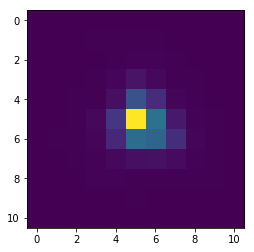

13 9 22
Box Size:  13 x 13
COM:  6.1767290923047975 6.292881534608636
2dG:  6.209455597546093 6.144642006257365
591 39 



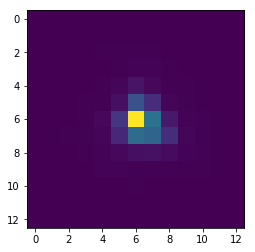

15 8 23
Box Size:  15 x 15
COM:  7.165179140308937 7.286507834936673
2dG:  7.2089675977810135 7.144302191606657
592 39 



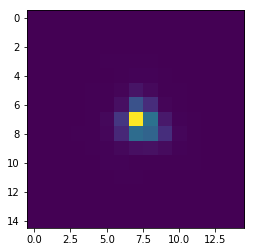

17 7 24
Box Size:  17 x 17
COM:  8.155470058601955 8.283935890070529
2dG:  8.20864143149693 8.144073981505247
593 39 



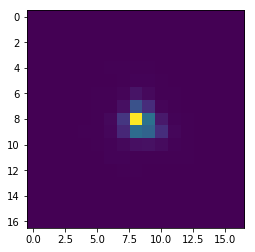

19 6 25
Box Size:  19 x 19
COM:  9.124365864106924 9.22374476261895
2dG:  9.208399346097185 9.143901989339174
594 39 



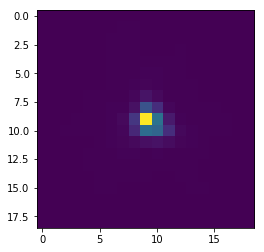

21 5 26
Box Size:  21 x 21
COM:  10.116567086804634 10.214933047208278
2dG:  10.20821378350577 10.143766433193464
595 39 



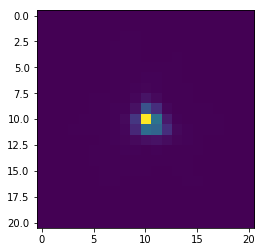

23 4 27
Box Size:  23 x 23
COM:  11.10340790012512 11.201763024750687
2dG:  11.20802143155361 11.143598667923897
596 39 



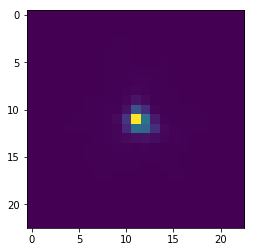

25 3 28
Box Size:  25 x 25
COM:  12.096238388171916 12.182729109887267
2dG:  12.20778338007459 12.143343995765951
597 39 



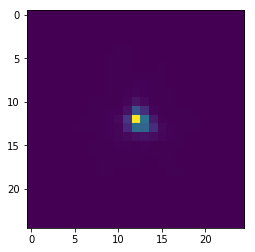

27 2 29
Box Size:  27 x 27
COM:  13.09130306974049 13.176146657565026
2dG:  13.207305431022311 13.142775469729957
598 39 



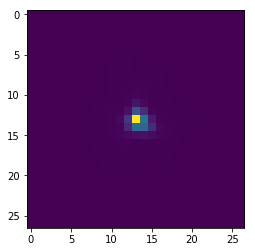

29 1 30
Box Size:  29 x 29
COM:  14.085510206191886 14.165685761855945
2dG:  14.207828842546425 14.143497448813198
599 39 



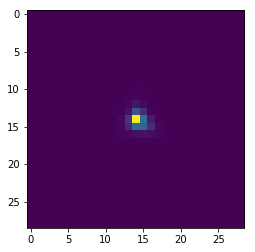

31 0 31
Box Size:  31 x 31
COM:  15.084201209172058 15.165682789156914
2dG:  15.207776349100115 15.14345941235502
600 39 



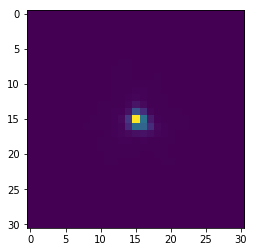

3 14 17
Box Size:  3 x 3
COM:  1.1549510315944005 1.2227167347087189
2dG:  1.2836109394594313 1.183152536783802
601 40 



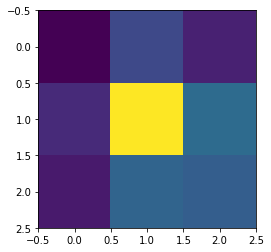

5 13 18
Box Size:  5 x 5
COM:  2.1866223331153183 2.3033136147228435
2dG:  2.2281593130578496 2.155849056589846
602 40 



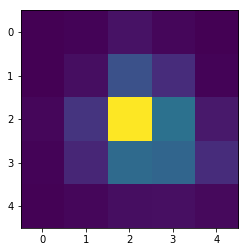

7 12 19
Box Size:  7 x 7
COM:  3.190233086406972 3.3062701600494586
2dG:  3.21983592115902 3.150509168455495
603 40 



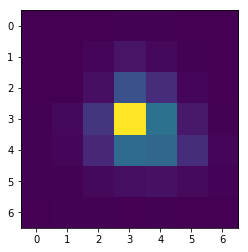

9 11 20
Box Size:  9 x 9
COM:  4.188603387444519 4.309681859235371
2dG:  4.217077383398636 4.1486352530648265
604 40 



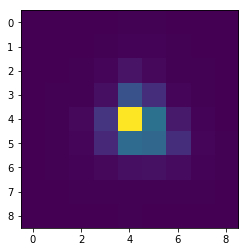

11 10 21
Box Size:  11 x 11
COM:  5.1875019973316325 5.306484356895006
2dG:  5.21573363244393 5.147700706343568
605 40 



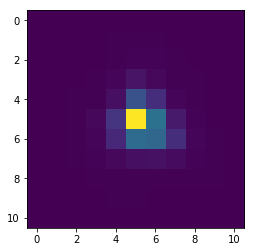

13 9 22
Box Size:  13 x 13
COM:  6.182125309413139 6.304389278430741
2dG:  6.214946849456141 6.147146413027249
606 40 



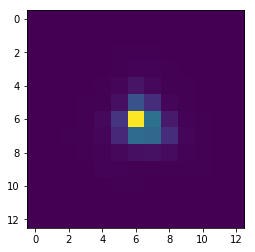

15 8 23
Box Size:  15 x 15
COM:  7.173805440349097 7.3018920634791495
2dG:  7.214447935288612 7.146792078261676
607 40 



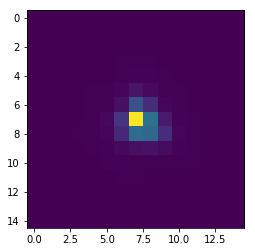

17 7 24
Box Size:  17 x 17
COM:  8.165005607172253 8.29658645745485
2dG:  8.214116465126773 8.146555397593676
608 40 



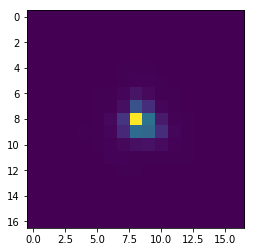

19 6 25
Box Size:  19 x 19
COM:  9.15169150075556 9.285066065563086
2dG:  9.213876784187068 9.1463836033907
609 40 



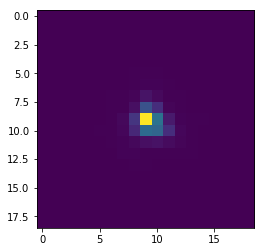

21 5 26
Box Size:  21 x 21
COM:  10.154481183957289 10.27918774770772
2dG:  10.213698874590984 10.146255749998742
610 40 



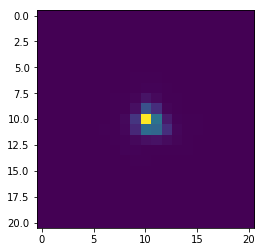

23 4 27
Box Size:  23 x 23
COM:  11.143511091030488 11.258119937836987
2dG:  11.213548338778901 11.146138598299311
611 40 



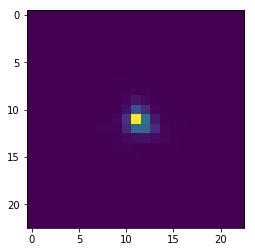

25 3 28
Box Size:  25 x 25
COM:  12.137532759104298 12.249419560558486
2dG:  12.21345163811253 12.146077501656803
612 40 



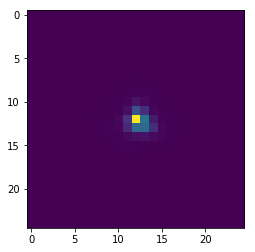

27 2 29
Box Size:  27 x 27
COM:  13.130466618358472 13.251044844304753
2dG:  13.213361931632344 13.146011723837555
613 40 



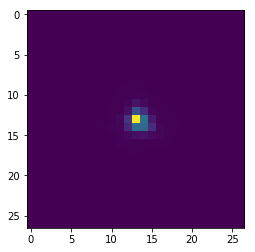

29 1 30
Box Size:  29 x 29
COM:  14.133178913152008 14.248245976076833
2dG:  14.21328763401324 14.14594579139724
614 40 



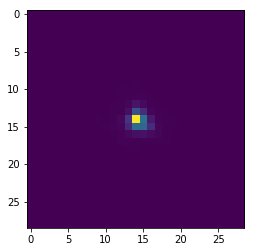

31 0 31
Box Size:  31 x 31
COM:  15.13440275309175 15.25217858199939
2dG:  15.213203261536876 15.14587223397892
615 40 



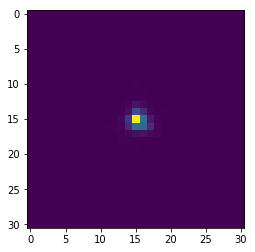

3 14 17
Box Size:  3 x 3
COM:  1.1527256736463694 1.2261226896453719
2dG:  1.2910705016174127 1.1816302711266307
616 41 



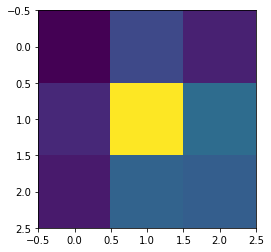

5 13 18
Box Size:  5 x 5
COM:  2.1835376817406513 2.307760823407982
2dG:  2.2316950061699607 2.1532997797806646
617 41 



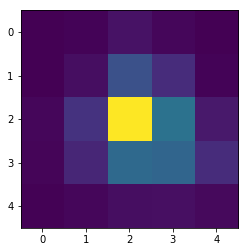

7 12 19
Box Size:  7 x 7
COM:  3.1863388369104895 3.3081425442963064
2dG:  3.2230454640112645 3.147921988970136
618 41 



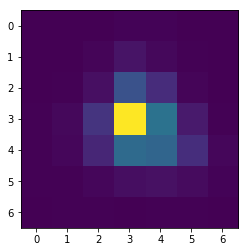

9 11 20
Box Size:  9 x 9
COM:  4.181809108166263 4.313099979727937
2dG:  4.2202055146023465 4.146047920039946
619 41 



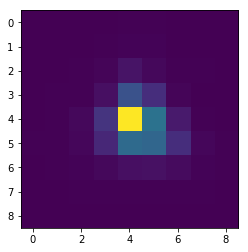

11 10 21
Box Size:  11 x 11
COM:  5.179937791471805 5.308725353488833
2dG:  5.218825826842405 5.145114912713641
620 41 



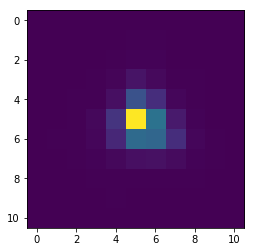

13 9 22
Box Size:  13 x 13
COM:  6.173771343905602 6.306237407734136
2dG:  6.218018596131828 6.144561670407999
621 41 



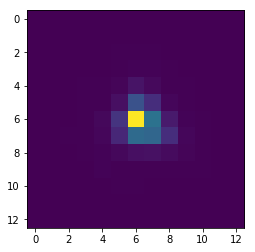

15 8 23
Box Size:  15 x 15
COM:  7.166680458038479 7.299593809497098
2dG:  7.2175070708070885 7.144208112915689
622 41 



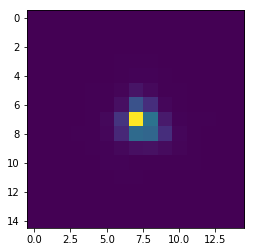

17 7 24
Box Size:  17 x 17
COM:  8.15705437807632 8.293580459365112
2dG:  8.217163458056959 8.143969287912087
623 41 



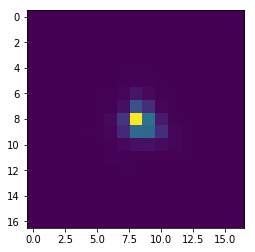

19 6 25
Box Size:  19 x 19
COM:  9.118336688163394 9.21496603837769
2dG:  9.216897414953534 9.143775065980435
624 41 



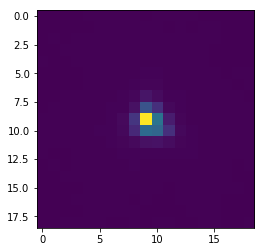

21 5 26
Box Size:  21 x 21
COM:  10.11213042378048 10.19989164225125
2dG:  10.216733420924799 10.143664710044307
625 41 



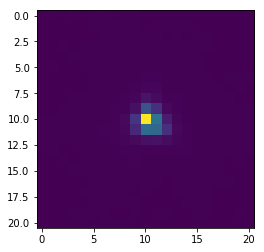

23 4 27
Box Size:  23 x 23
COM:  11.107606456006275 11.191005788705862
2dG:  11.215195748722262 11.14224495284534
626 41 



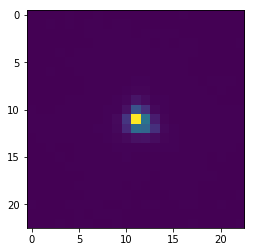

25 3 28
Box Size:  25 x 25
COM:  12.100582028467745 12.18081437820994
2dG:  12.216443835208377 12.143440818736355
627 41 



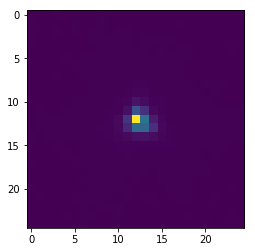

27 2 29
Box Size:  27 x 27
COM:  13.091112342669739 13.173780189362747
2dG:  13.21548047659739 13.142196776573424
628 41 



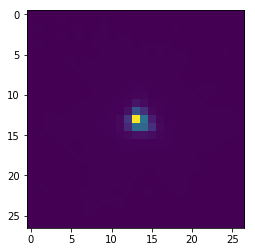

29 1 30
Box Size:  29 x 29
COM:  14.090175162445602 14.166584309130757
2dG:  14.216311496090913 14.143367535620873
629 41 



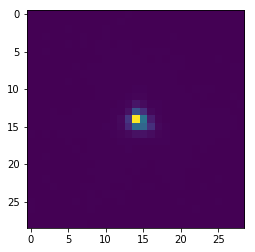

31 0 31
Box Size:  31 x 31
COM:  15.094339781159665 15.15331670832568
2dG:  15.344574105642538 15.223867647343443
630 41 



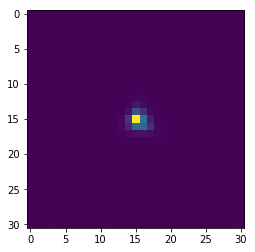

3 14 17
Box Size:  3 x 3
COM:  1.149254164402293 1.2210428100436568
2dG:  1.2764339664933657 1.1737814454931383
631 42 



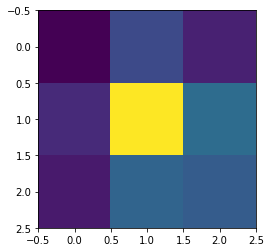

5 13 18
Box Size:  5 x 5
COM:  2.175548804019974 2.2978845438080806
2dG:  2.223911215642347 2.1480013094014514
632 42 



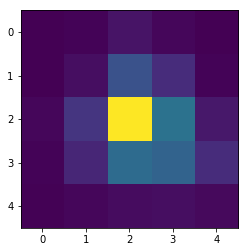

7 12 19
Box Size:  7 x 7
COM:  3.1782742118604466 3.298343318047753
2dG:  3.215927065837053 3.1429531174399097
633 42 



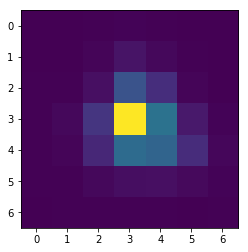

9 11 20
Box Size:  9 x 9
COM:  4.1743288520018424 4.302585965071283
2dG:  4.2132447900914745 4.141158596612629
634 42 



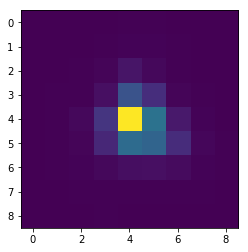

11 10 21
Box Size:  11 x 11
COM:  5.173885880939881 5.296808986040301
2dG:  5.211928356218311 5.140257020042843
635 42 



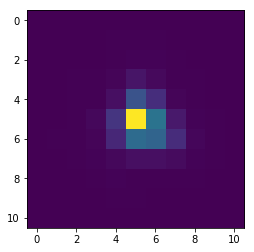

13 9 22
Box Size:  13 x 13
COM:  6.166180897896405 6.29578718810634
2dG:  6.211155389933311 6.1397208128363445
636 42 



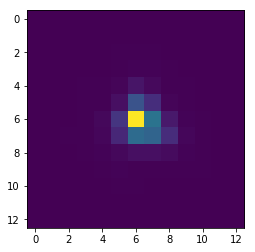

15 8 23
Box Size:  15 x 15
COM:  7.160067461418503 7.2927013122477415
2dG:  7.210672650828644 7.13938324700143
637 42 



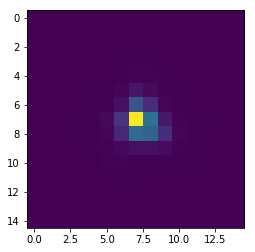

17 7 24
Box Size:  17 x 17
COM:  8.147867841909338 8.28743206049768
2dG:  8.210346639830505 8.13915405509777
638 42 



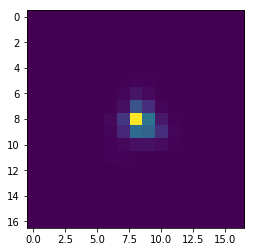

19 6 25
Box Size:  19 x 19
COM:  9.106877646967906 9.209779888305805
2dG:  9.20918312546002 9.137934186841157
639 42 



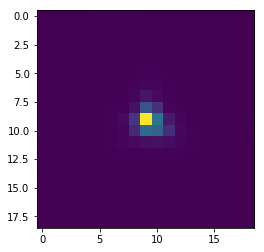

21 5 26
Box Size:  21 x 21
COM:  10.102031221677 10.193931905931855
2dG:  10.20945162006621 10.138235691116916
640 42 



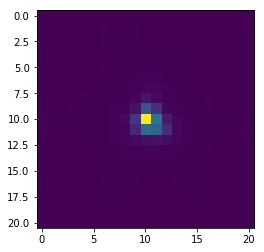

23 4 27
Box Size:  23 x 23
COM:  11.094516673119319 11.181319458185577
2dG:  11.207413101850234 11.13490952532721
641 42 



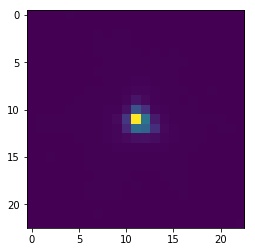

25 3 28
Box Size:  25 x 25
COM:  12.089183004679613 12.168134850201294
2dG:  12.209694968742873 12.138681767039687
642 42 



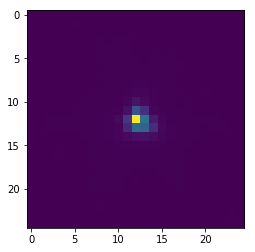

27 2 29
Box Size:  27 x 27
COM:  13.083488852031468 13.159004605815705
2dG:  13.201576958994968 13.1322741629494
643 42 



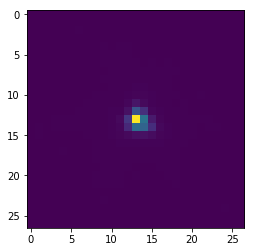

29 1 30
Box Size:  29 x 29
COM:  14.079035608016069 14.15582824451537
2dG:  14.2078885743855 14.136583620729006
644 42 



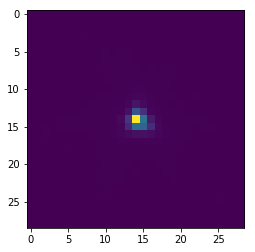

31 0 31
Box Size:  31 x 31
COM:  15.075591006325636 15.14979696790519
2dG:  15.209493790242652 15.13852594701168
645 42 



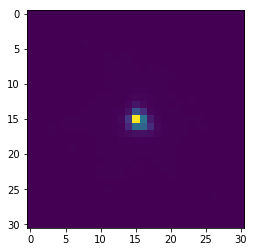

3 14 17
Box Size:  3 x 3
COM:  1.154277101802149 1.2183066482946125
2dG:  1.2756634806166842 1.1793538810097834
646 43 



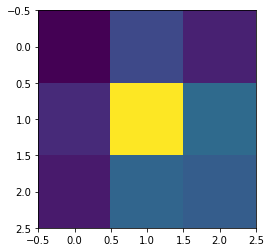

5 13 18
Box Size:  5 x 5
COM:  2.1848519603088707 2.29455941601995
2dG:  2.2229367491200613 2.1531884028973884
647 43 



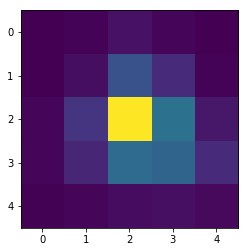

7 12 19
Box Size:  7 x 7
COM:  3.188436544792848 3.2978369220472343
2dG:  3.21487836739941 3.1480627998713686
648 43 



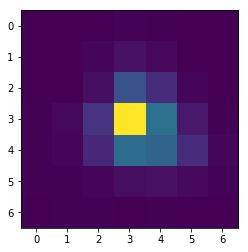

9 11 20
Box Size:  9 x 9
COM:  4.183668585106385 4.299476591911993
2dG:  4.212171367080364 4.1462474239126825
649 43 



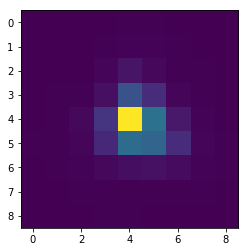

11 10 21
Box Size:  11 x 11
COM:  5.181050648337347 5.2933906105160995
2dG:  5.210849987923713 5.145341966321818
650 43 



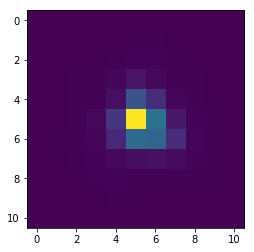

13 9 22
Box Size:  13 x 13
COM:  6.1775576495947435 6.291168084502393
2dG:  6.210069015380662 6.144800486710677
651 43 



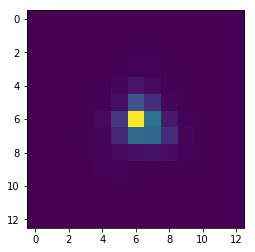

15 8 23
Box Size:  15 x 15
COM:  7.169467124674252 7.288266409564044
2dG:  7.2095776096276945 7.144457256396543
652 43 



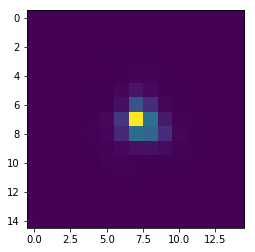

17 7 24
Box Size:  17 x 17
COM:  8.16079213689691 8.28444813982624
2dG:  8.209249957726005 8.144227291836515
653 43 



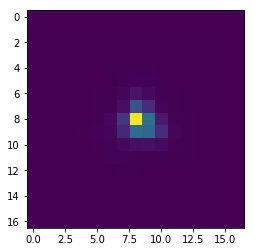

19 6 25
Box Size:  19 x 19
COM:  9.146088359847456 9.269389139740959
2dG:  9.209012060758658 9.144059717134429
654 43 



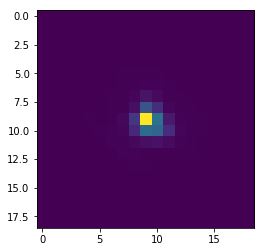

21 5 26
Box Size:  21 x 21
COM:  10.140883622270245 10.266927388686653
2dG:  10.208831142706318 10.143930437993829
655 43 



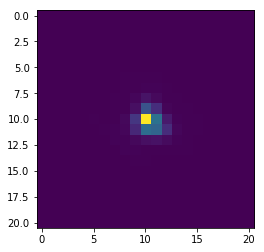

23 4 27
Box Size:  23 x 23
COM:  11.131558284569442 11.253826478383901
2dG:  11.208694467799091 11.143832367727596
656 43 



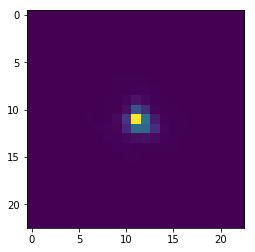

25 3 28
Box Size:  25 x 25
COM:  12.127531016624852 12.25309323600555
2dG:  12.208544308239015 12.14370082691666
657 43 



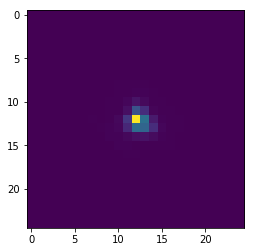

27 2 29
Box Size:  27 x 27
COM:  13.125465516883528 13.247153261775535
2dG:  13.206862531738926 13.141751722698597
658 43 



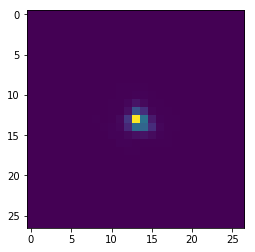

29 1 30
Box Size:  29 x 29
COM:  14.124807974831796 14.24171939585392
2dG:  14.202643829661964 14.140712355666789
659 43 



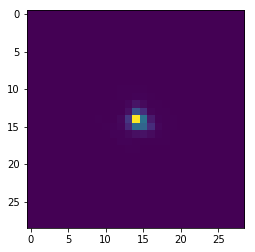

31 0 31
Box Size:  31 x 31
COM:  15.12855090232674 15.249395940857328
2dG:  15.208394322066562 15.143620618404627
660 43 



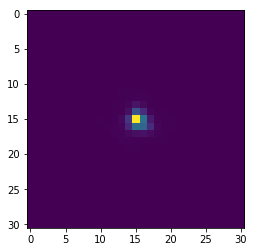

3 14 17
Box Size:  3 x 3
COM:  1.1538469319371498 1.2234079071852373
2dG:  1.2811476381416438 1.180723489384264
661 44 



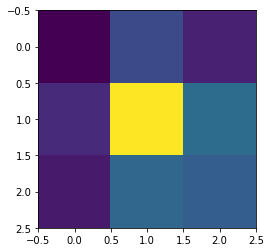

5 13 18
Box Size:  5 x 5
COM:  2.184881622063273 2.3007078587934107
2dG:  2.2278864525566373 2.154473384352974
662 44 



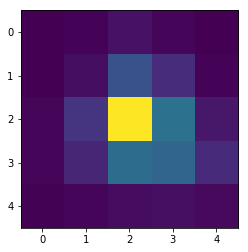

7 12 19
Box Size:  7 x 7
COM:  3.1881574120184184 3.3007333815114697
2dG:  3.2197486685740118 3.1493306730312227
663 44 



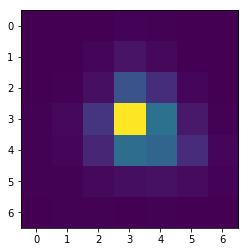

9 11 20
Box Size:  9 x 9
COM:  4.184010041267998 4.303620122866777
2dG:  4.217020983122683 4.147510304287831
664 44 



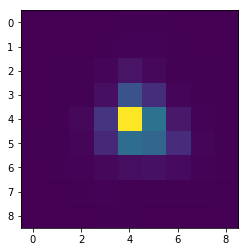

11 10 21
Box Size:  11 x 11
COM:  5.184848588003603 5.296390680011485
2dG:  5.215684472894056 5.146598185616695
665 44 



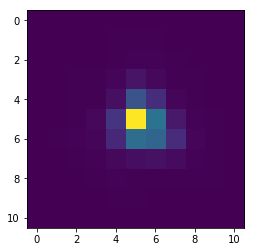

13 9 22
Box Size:  13 x 13
COM:  6.179216898743526 6.295527381415807
2dG:  6.214903874160713 6.14605890942129
666 44 



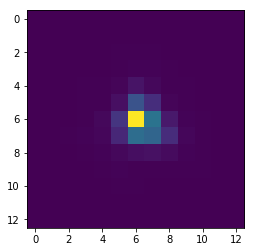

15 8 23
Box Size:  15 x 15
COM:  7.176176054349374 7.2958175402193195
2dG:  7.214404507143271 7.145711282514773
667 44 



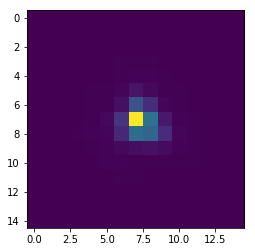

17 7 24
Box Size:  17 x 17
COM:  8.158066186063934 8.284004927392985
2dG:  8.214072597621888 8.145479028210959
668 44 



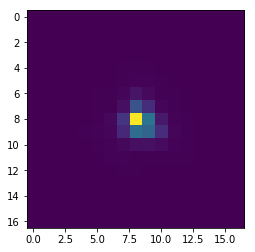

19 6 25
Box Size:  19 x 19
COM:  9.121120883121787 9.206200850871877
2dG:  9.213825996131416 9.14530409537969
669 44 



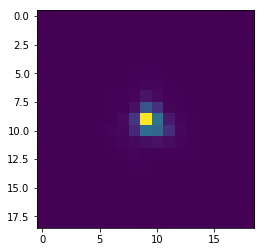

21 5 26
Box Size:  21 x 21
COM:  10.110181910070565 10.192684862738192
2dG:  10.210794510512521 10.140720151261556
670 44 



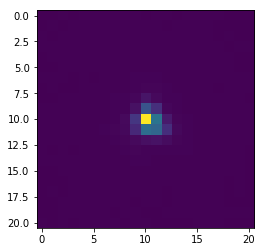

23 4 27
Box Size:  23 x 23
COM:  11.102581509040617 11.183870984580857
2dG:  11.209512572844003 11.13860658569074
671 44 



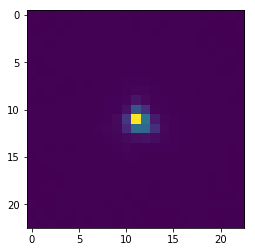

25 3 28
Box Size:  25 x 25
COM:  12.094287430444519 12.167528526770825
2dG:  12.201644812014413 12.131962007689209
672 44 



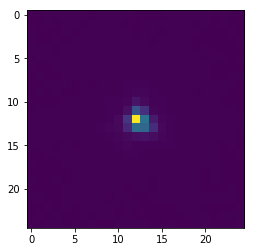

27 2 29
Box Size:  27 x 27
COM:  13.090397924300412 13.161171404025012
2dG:  13.21309430367732 13.144656728124541
673 44 



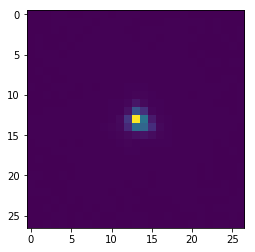

29 1 30
Box Size:  29 x 29
COM:  14.08537848759353 14.153344320036775
2dG:  14.211886743327986 14.142942325720893
674 44 



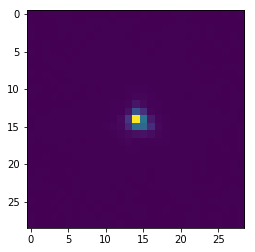

31 0 31
Box Size:  31 x 31
COM:  15.081973156457352 15.148416576767428
2dG:  15.342568492060952 15.1783235639252
675 44 



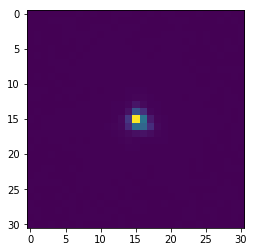

3 14 17
Box Size:  3 x 3
COM:  1.1630535521862504 1.2253390739821397
2dG:  1.2885291157702743 1.196106381919691
676 45 



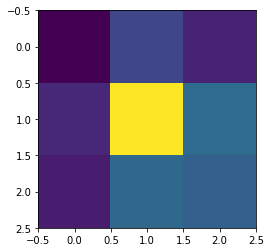

5 13 18
Box Size:  5 x 5
COM:  2.197214050253668 2.305942410989932
2dG:  2.2315482813450624 2.167207968604937
677 45 



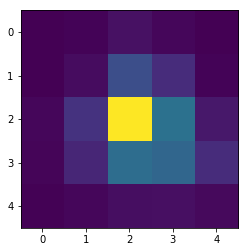

7 12 19
Box Size:  7 x 7
COM:  3.202370472355323 3.3066744147515634
2dG:  3.2229703916157972 3.1615052433952795
678 45 



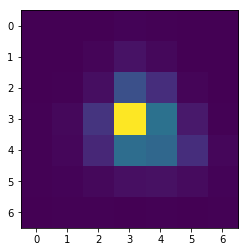

9 11 20
Box Size:  9 x 9
COM:  4.1993272620264035 4.307794094683062
2dG:  4.2201106777671376 4.159495953483725
679 45 



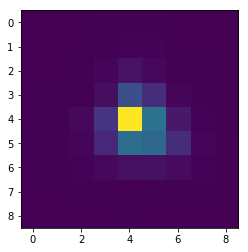

11 10 21
Box Size:  11 x 11
COM:  5.196600060913813 5.303535414710735
2dG:  5.218714661073861 5.1584926467340235
680 45 



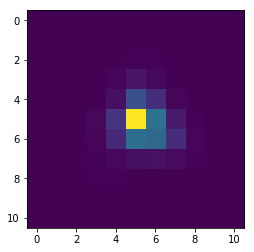

13 9 22
Box Size:  13 x 13
COM:  6.1888685290601355 6.298282595127398
2dG:  6.217894771163233 6.157896008788133
681 45 



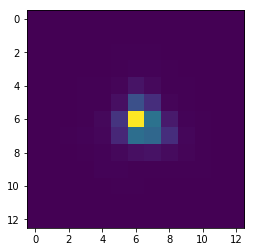

15 8 23
Box Size:  15 x 15
COM:  7.184675301560702 7.294929004592162
2dG:  7.217379796517732 7.157518372191866
682 45 



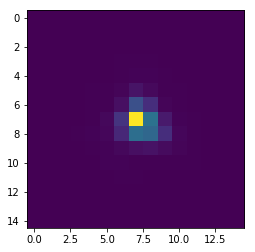

17 7 24
Box Size:  17 x 17
COM:  8.172938941479899 8.290428396369597
2dG:  8.217033907126414 8.157263393227813
683 45 



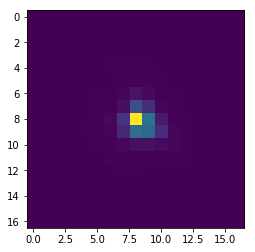

19 6 25
Box Size:  19 x 19
COM:  9.104976316479027 9.149850641785248
2dG:  9.216767375776467 9.157058446125149
684 45 



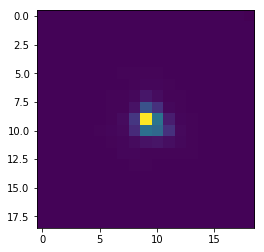

21 5 26
Box Size:  21 x 21
COM:  10.091627344413626 10.13475230755691
2dG:  10.368167125472164 10.209985581328642
685 45 



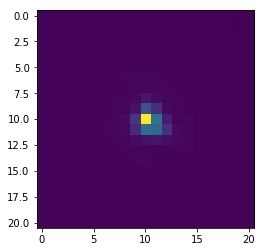

23 4 27
Box Size:  23 x 23
COM:  11.079605146793709 11.120840520171559
2dG:  11.20833412554341 11.146329724865645
686 45 



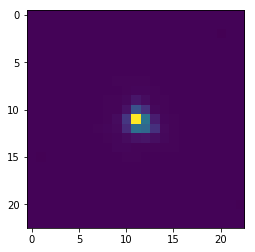

25 3 28
Box Size:  25 x 25
COM:  12.069873134963503 12.107906732721451
2dG:  12.216328603934363 12.156732817678174
687 45 



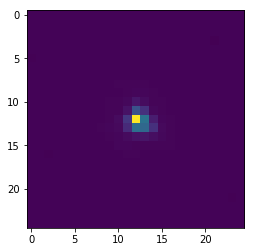

27 2 29
Box Size:  27 x 27
COM:  13.0630811796012 13.09787270123102
2dG:  13.248915811868034 13.173709901053286
688 45 



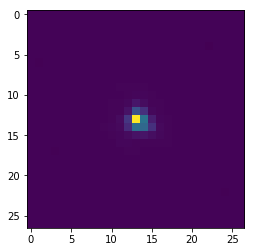

29 1 30
Box Size:  29 x 29
COM:  14.059575447622922 14.089069924043061
2dG:  14.216051728513914 14.156454626958315
689 45 



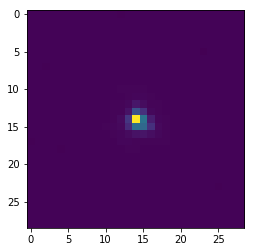

31 0 31
Box Size:  31 x 31
COM:  15.057000655575496 15.080481558048872
2dG:  15.216074980898998 15.156511861880857
690 45 



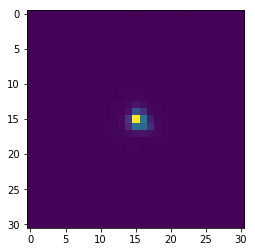

3 14 17
Box Size:  3 x 3
COM:  1.1722751416367936 1.2264831524118356
2dG:  1.2918734106853276 1.2078981734343714
691 46 



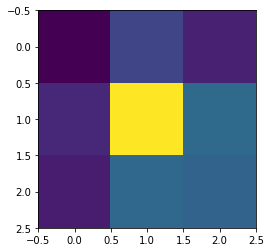

5 13 18
Box Size:  5 x 5
COM:  2.2063265308862436 2.310433578309487
2dG:  2.234913023998046 2.178153626606415
692 46 



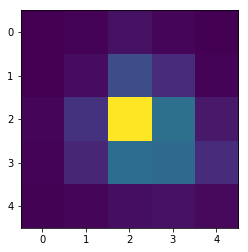

7 12 19
Box Size:  7 x 7
COM:  3.2112347716015734 3.3113062768342356
2dG:  3.2262647680693695 3.1722388510953845
693 46 



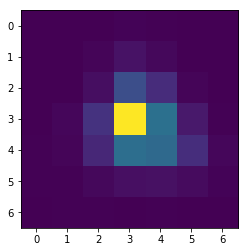

9 11 20
Box Size:  9 x 9
COM:  4.206764549774343 4.314027315680311
2dG:  4.22336065181318 4.170145284049155
694 46 



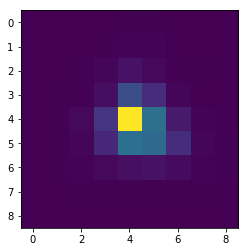

11 10 21
Box Size:  11 x 11
COM:  5.206902351096759 5.306010550221017
2dG:  5.221949091870252 5.169105450487746
695 46 



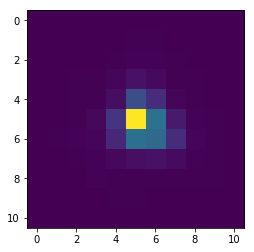

13 9 22
Box Size:  13 x 13
COM:  6.202778996092036 6.304924232625571
2dG:  6.221121976495158 6.168488899390367
696 46 



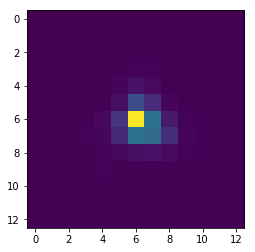

15 8 23
Box Size:  15 x 15
COM:  7.19602637181846 7.304556502782094
2dG:  7.220603627905043 7.168099661787504
697 46 



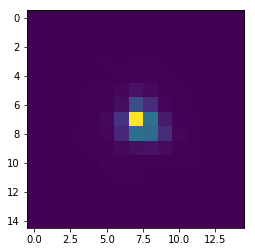

17 7 24
Box Size:  17 x 17
COM:  8.183991341624402 8.293991421316235
2dG:  8.220254823582016 8.167836431562728
698 46 



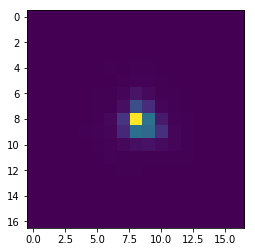

19 6 25
Box Size:  19 x 19
COM:  9.12251436981552 9.183318283793005
2dG:  9.2199911624175 9.167633266361024
699 46 



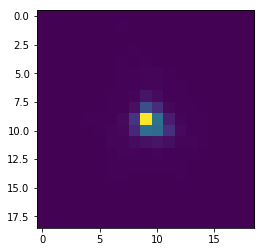

21 5 26
Box Size:  21 x 21
COM:  10.11143861467412 10.1688099369166
2dG:  10.219795729062055 10.167481337504318
700 46 



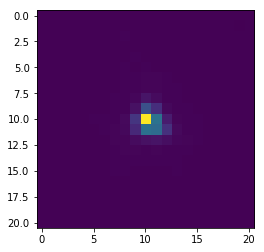

23 4 27
Box Size:  23 x 23
COM:  11.097520101803557 11.15129941167487
2dG:  11.219657145707513 11.16737260040395
701 46 



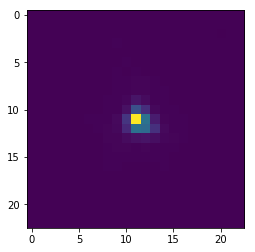

25 3 28
Box Size:  25 x 25
COM:  12.086879017881014 12.143446306810935
2dG:  12.219742348382159 12.167252123971236
702 46 



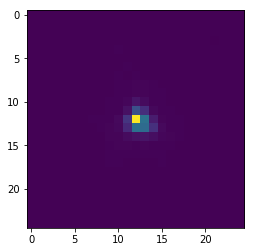

27 2 29
Box Size:  27 x 27
COM:  13.081472149992152 13.129352534243298
2dG:  13.219455451438817 13.167196528237607
703 46 



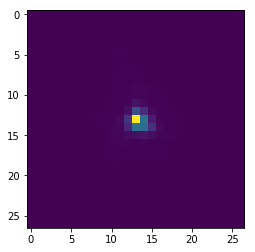

29 1 30
Box Size:  29 x 29
COM:  14.073415893071497 14.123889853053688
2dG:  14.219415373169795 14.16718213670733
704 46 



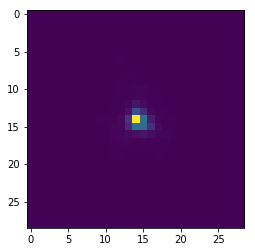

31 0 31
Box Size:  31 x 31
COM:  15.064384039010825 15.117128804881876
2dG:  15.219347761359513 15.167144479851528
705 46 



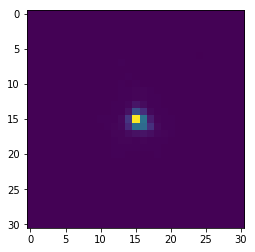

3 14 17
Box Size:  3 x 3
COM:  1.1678592725373096 1.2305329156185716
2dG:  1.297957460545391 1.2047726029163308
706 47 



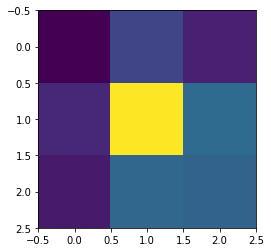

5 13 18
Box Size:  5 x 5
COM:  2.2013890685614657 2.3130686563516387
2dG:  2.2374190976262405 2.1738214384475434
707 47 



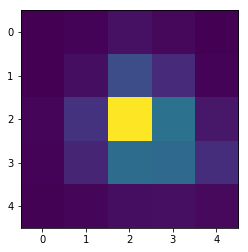

7 12 19
Box Size:  7 x 7
COM:  3.2047754279655654 3.313925388616022
2dG:  3.2287268731521093 3.1679346994975437
708 47 



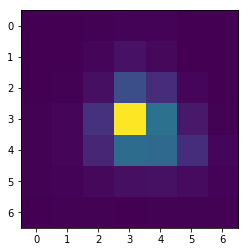

9 11 20
Box Size:  9 x 9
COM:  4.199100872470176 4.321238216708418
2dG:  4.225836033922615 4.165862846722128
709 47 



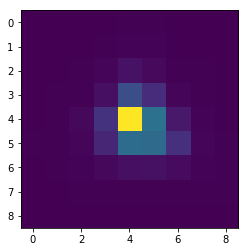

11 10 21
Box Size:  11 x 11
COM:  5.19590075299787 5.314749219412662
2dG:  5.2244258803476 5.164828014904878
710 47 



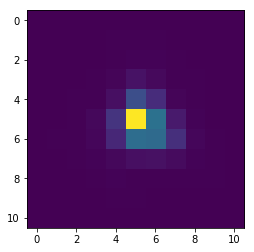

13 9 22
Box Size:  13 x 13
COM:  6.195120212318326 6.311916990227788
2dG:  6.22359560416512 6.1642106889214965
711 47 



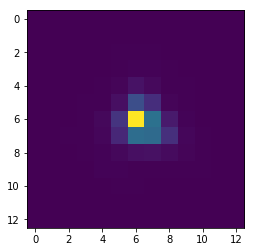

15 8 23
Box Size:  15 x 15
COM:  7.187756194849763 7.308749861010058
2dG:  7.223071309827961 7.163817624707909
712 47 



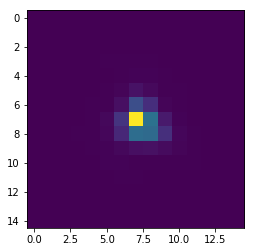

17 7 24
Box Size:  17 x 17
COM:  8.174763437337363 8.302334181167092
2dG:  8.22272099267078 8.163553541836883
713 47 



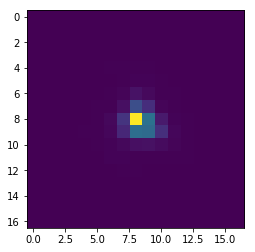

19 6 25
Box Size:  19 x 19
COM:  9.136715813425464 9.319505376108168
2dG:  9.222478838916464 9.163368160563895
714 47 



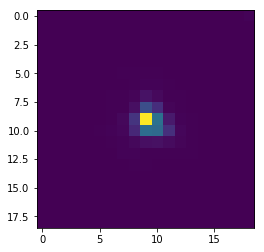

21 5 26
Box Size:  21 x 21
COM:  10.133308071708383 10.312902656207136
2dG:  10.222221543710722 10.163134677014765
715 47 



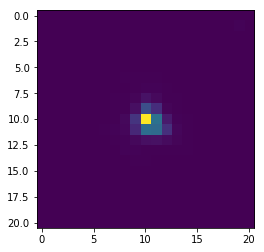

23 4 27
Box Size:  23 x 23
COM:  11.130831076441375 11.303444886323108
2dG:  11.22213566918944 11.163103375173415
716 47 



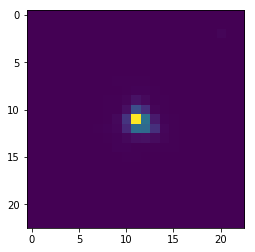

25 3 28
Box Size:  25 x 25
COM:  12.117446669688736 12.291335907812787
2dG:  12.221589284347404 12.162400197986408
717 47 



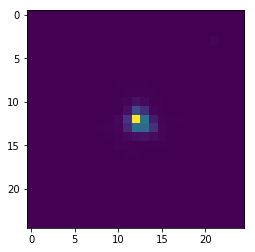

27 2 29
Box Size:  27 x 27
COM:  13.104576806264346 13.275568000048887
2dG:  13.22184237602146 13.162820848654
718 47 



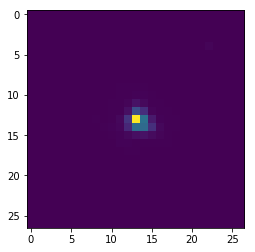

29 1 30
Box Size:  29 x 29
COM:  14.10620480409977 14.275028095135049
2dG:  14.22186578912008 14.162901909451195
719 47 



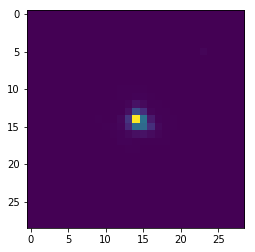

31 0 31
Box Size:  31 x 31
COM:  15.111851753531914 15.276401339871171
2dG:  15.221813848946 15.162858858864873
720 47 



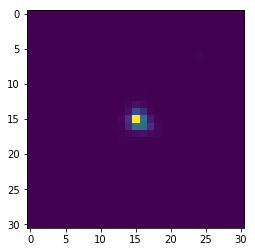

3 14 17
Box Size:  3 x 3
COM:  1.1681396995003608 1.2225615107627976
2dG:  1.2836460456935426 1.2007086849531474
721 48 



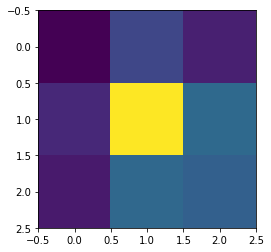

5 13 18
Box Size:  5 x 5
COM:  2.1996665871026346 2.302765608252639
2dG:  2.2283322413526974 2.17178351740413
722 48 



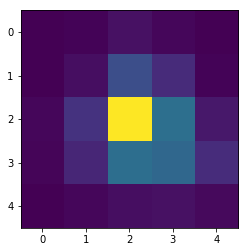

7 12 19
Box Size:  7 x 7
COM:  3.202870887179013 3.3028656560391267
2dG:  3.2197857806262262 3.16600315335053
723 48 



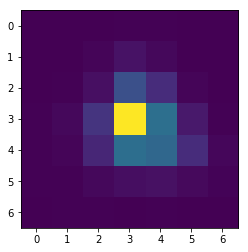

9 11 20
Box Size:  9 x 9
COM:  4.1993346591610035 4.30480391943979
2dG:  4.216955579028915 4.163988468495691
724 48 



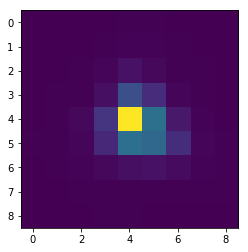

11 10 21
Box Size:  11 x 11
COM:  5.19925891096581 5.300073908953717
2dG:  5.215560263225959 5.162974467104103
725 48 



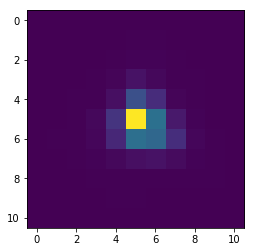

13 9 22
Box Size:  13 x 13
COM:  6.191378874078458 6.294966440348872
2dG:  6.2147563987904455 6.162383680072408
726 48 



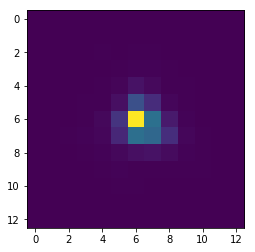

15 8 23
Box Size:  15 x 15
COM:  7.184461527228297 7.292177710175593
2dG:  7.214247954158881 7.162007373455731
727 48 



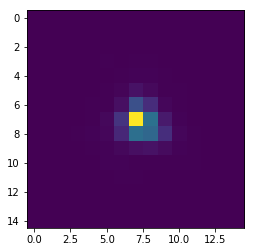

17 7 24
Box Size:  17 x 17
COM:  8.170081537638993 8.281961005601357
2dG:  8.213904637934201 8.16175210029376
728 48 



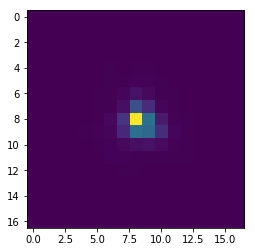

19 6 25
Box Size:  19 x 19
COM:  9.160890301465347 9.278298523114787
2dG:  9.213655971561298 9.161566577383685
729 48 



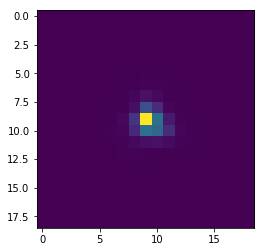

21 5 26
Box Size:  21 x 21
COM:  10.153744246318828 10.26798725030928
2dG:  10.213469406491015 10.16142593059272
730 48 



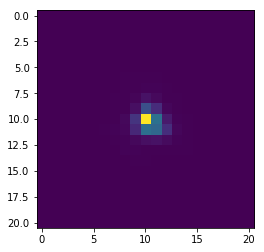

23 4 27
Box Size:  23 x 23
COM:  11.142416027953594 11.254963157803607
2dG:  11.213197801338815 11.161154958912393
731 48 



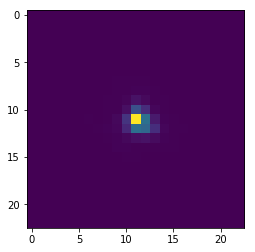

25 3 28
Box Size:  25 x 25
COM:  12.140062564006671 12.258110202547577
2dG:  12.213210311371359 12.16122784846941
732 48 



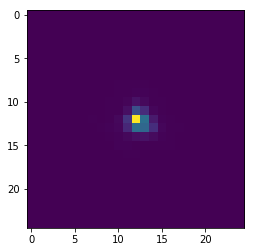

27 2 29
Box Size:  27 x 27
COM:  13.143902699825443 13.259778038780336
2dG:  13.213132500601485 13.161173971122375
733 48 



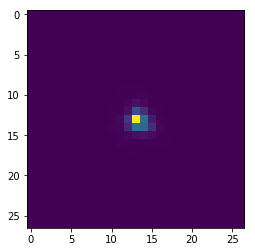

29 1 30
Box Size:  29 x 29
COM:  14.137364103295203 14.261918148399227
2dG:  14.213049510511924 14.161105591165017
734 48 



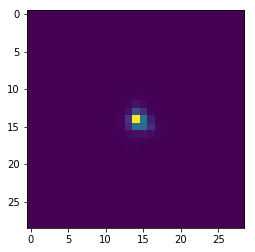

31 0 31
Box Size:  31 x 31
COM:  15.123439496754397 15.237651943840106
2dG:  15.21299365194648 15.161056401766642
735 48 



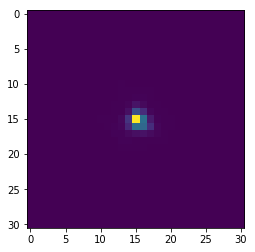

3 14 17
Box Size:  3 x 3
COM:  1.165595255420494 1.2249107889368471
2dG:  1.2857326374723352 1.1974579302960648
736 49 



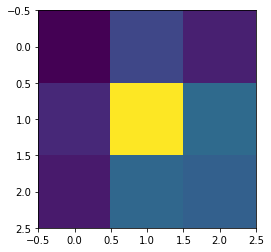

5 13 18
Box Size:  5 x 5
COM:  2.1985580729062564 2.303402438315915
2dG:  2.2299262955609866 2.1686559661752307
737 49 



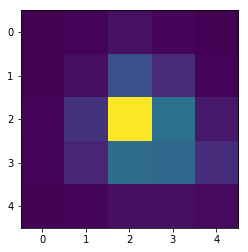

7 12 19
Box Size:  7 x 7
COM:  3.2002757144422507 3.3051501854110383
2dG:  3.2215529411754775 3.163071313423995
738 49 



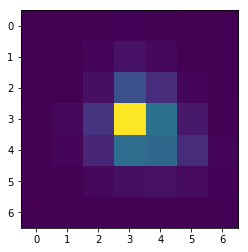

9 11 20
Box Size:  9 x 9
COM:  4.1959382751573235 4.305638282802423
2dG:  4.2187413086250904 4.1610968132567745
739 49 



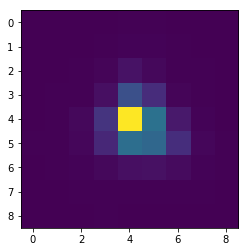

11 10 21
Box Size:  11 x 11
COM:  5.1957951704488226 5.299221716132636
2dG:  5.21736745139496 5.160111449332495
740 49 



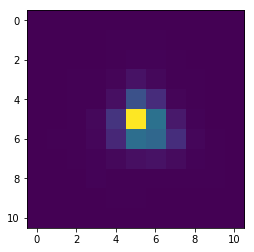

13 9 22
Box Size:  13 x 13
COM:  6.190197600282096 6.301580835043295
2dG:  6.21657043606737 6.159533190701012
741 49 



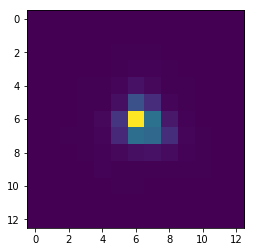

15 8 23
Box Size:  15 x 15
COM:  7.185439089288604 7.301453797460271
2dG:  7.216066832808006 7.159165208158947
742 49 



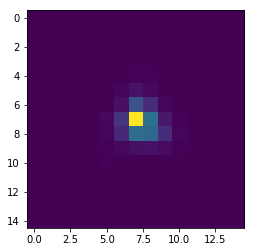

17 7 24
Box Size:  17 x 17
COM:  8.172275446619128 8.288829358493455
2dG:  8.215727752224412 8.158916252334352
743 49 



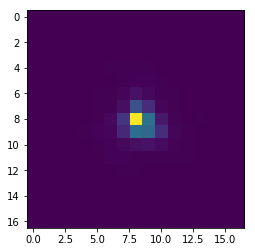

19 6 25
Box Size:  19 x 19
COM:  9.139318156920938 9.295971866470216
2dG:  9.215493172467475 9.158745113049383
744 49 



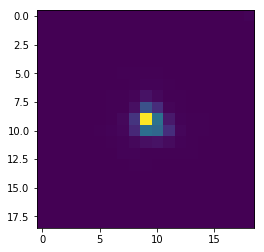

21 5 26
Box Size:  21 x 21
COM:  10.131694345916443 10.290883885722513
2dG:  10.215306607546264 10.158605024522583
745 49 



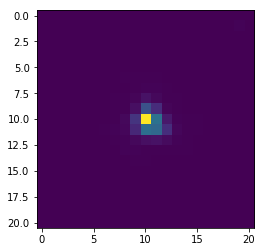

23 4 27
Box Size:  23 x 23
COM:  11.126664074087865 11.283561661793236
2dG:  11.215156020373215 11.158488404266224
746 49 



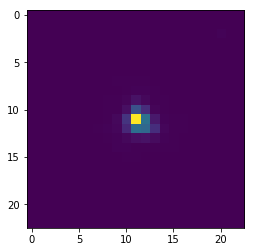

25 3 28
Box Size:  25 x 25
COM:  12.12354034847185 12.272050653220955
2dG:  12.215044100986782 12.158403306593186
747 49 



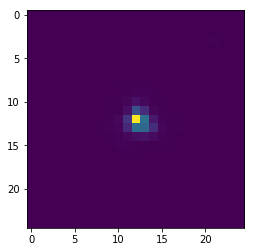

27 2 29
Box Size:  27 x 27
COM:  13.12250670153331 13.269748859814657
2dG:  13.214964553247501 13.15835137629238
748 49 



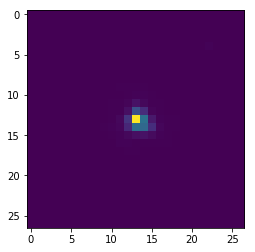

29 1 30
Box Size:  29 x 29
COM:  14.109637207300644 14.252868737255326
2dG:  14.214893636335754 14.158289479111593
749 49 



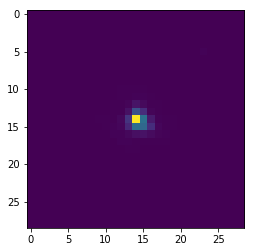

31 0 31
Box Size:  31 x 31
COM:  15.110985808256101 15.241433200510418
2dG:  15.214688959006496 15.15806750907544
750 49 



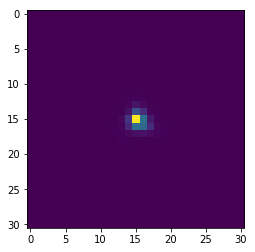

3 14 17
Box Size:  3 x 3
COM:  1.1700504930505975 1.228577523414543
2dG:  1.300645274937255 1.2070584947087892
751 50 



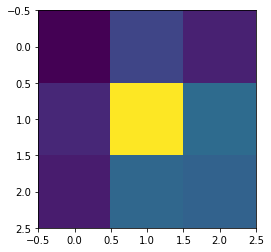

5 13 18
Box Size:  5 x 5
COM:  2.2058830260560036 2.3124253605694975
2dG:  2.237558562571521 2.1752857382809556
752 50 



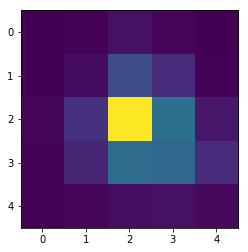

7 12 19
Box Size:  7 x 7
COM:  3.209988120560687 3.3133709622892447
2dG:  3.2285611349795684 3.1692825175606374
753 50 



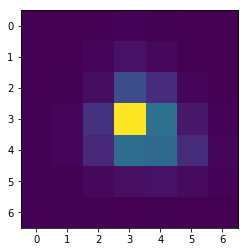

9 11 20
Box Size:  9 x 9
COM:  4.208663417320594 4.319112336360728
2dG:  4.225606600732265 4.167201076294089
754 50 



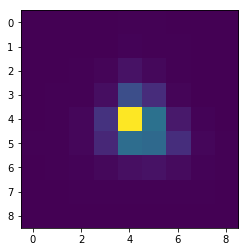

11 10 21
Box Size:  11 x 11
COM:  5.206270805521947 5.314692913181818
2dG:  5.224153374368823 5.166154510878551
755 50 



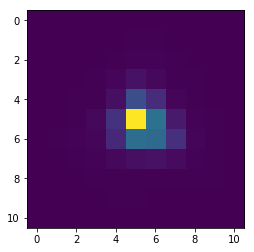

13 9 22
Box Size:  13 x 13
COM:  6.199336822082329 6.315604207374476
2dG:  6.223310905799588 6.1655404294658815
756 50 



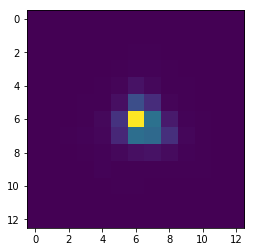

15 8 23
Box Size:  15 x 15
COM:  7.195776170542589 7.314276539870906
2dG:  7.222780101542149 7.165150601965999
757 50 



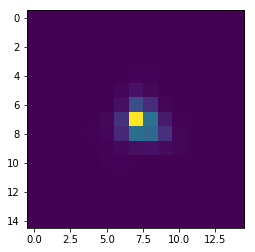

17 7 24
Box Size:  17 x 17
COM:  8.188519930360227 8.307889128570409
2dG:  8.222425966106309 8.164889233441219
758 50 



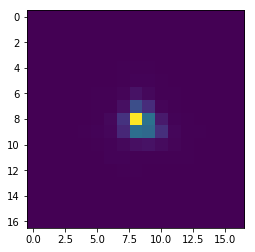

19 6 25
Box Size:  19 x 19
COM:  9.168028731647631 9.317726106716833
2dG:  9.222149717334352 9.164672519022675
759 50 



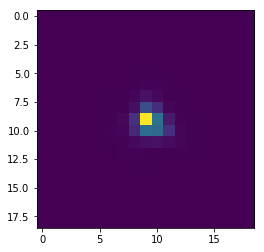

21 5 26
Box Size:  21 x 21
COM:  10.161527745868149 10.312122300991641
2dG:  10.221972416996417 10.16454724794752
760 50 



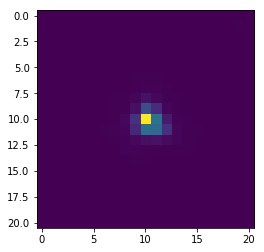

23 4 27
Box Size:  23 x 23
COM:  11.165439675840759 11.312970996467142
2dG:  11.221835414112356 11.164451029860121
761 50 



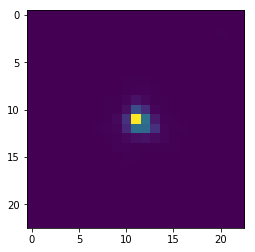

25 3 28
Box Size:  25 x 25
COM:  12.156472798835297 12.3026299891112
2dG:  12.221718938818917 12.164363073214352
762 50 



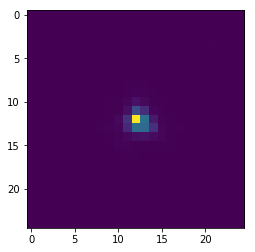

27 2 29
Box Size:  27 x 27
COM:  13.162183107970858 13.292145723338823
2dG:  13.221628883604158 13.164295979758371
763 50 



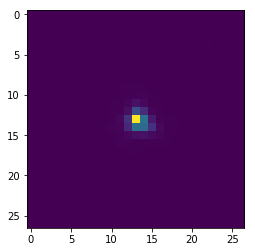

29 1 30
Box Size:  29 x 29
COM:  14.161094187418671 14.291762556667065
2dG:  14.2215186706563 14.16419235056921
764 50 



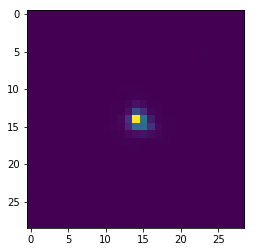

31 0 31
Box Size:  31 x 31
COM:  15.167595080939824 15.288067753710505
2dG:  15.221491319452655 15.16419357327032
765 50 



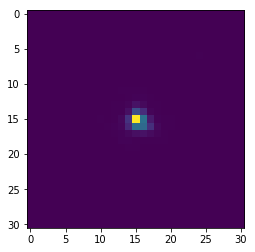

3 14 17
Box Size:  3 x 3
COM:  1.1761771878526286 1.2214528448492745
2dG:  1.2817670590503705 1.210032031388092
766 51 



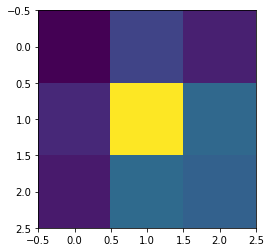

5 13 18
Box Size:  5 x 5
COM:  2.209622799533246 2.300749121073456
2dG:  2.2282777858691314 2.1809461700503947
767 51 



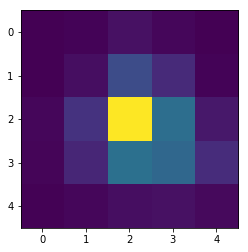

7 12 19
Box Size:  7 x 7
COM:  3.215059221844148 3.3048646705975044
2dG:  3.219802953115908 3.17500671458001
768 51 



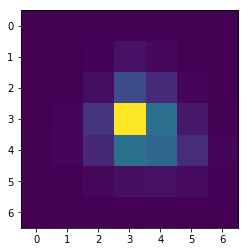

9 11 20
Box Size:  9 x 9
COM:  4.209989352852462 4.305614547432764
2dG:  4.21698534127698 4.172938671753111
769 51 



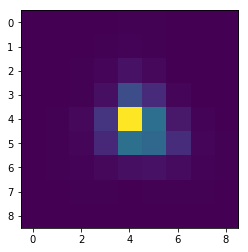

11 10 21
Box Size:  11 x 11
COM:  5.208304782779825 5.302307190238526
2dG:  5.2156017701037065 5.171904406677937
770 51 



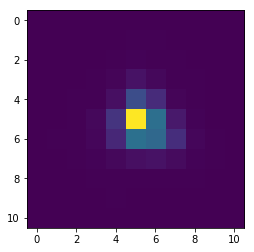

13 9 22
Box Size:  13 x 13
COM:  6.199332581046978 6.298915445696696
2dG:  6.21479979954732 6.171298968446623
771 51 



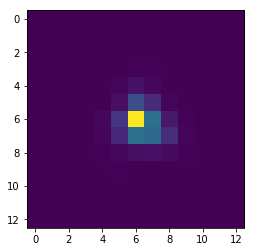

15 8 23
Box Size:  15 x 15
COM:  7.1889922723691955 7.2949180127495685
2dG:  7.2142895984562925 7.170911437776438
772 51 



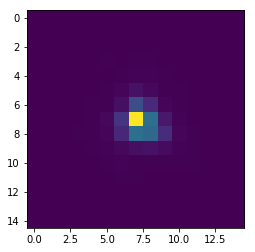

17 7 24
Box Size:  17 x 17
COM:  8.1781564877293 8.290070850200296
2dG:  8.213944677819718 8.170648393804152
773 51 



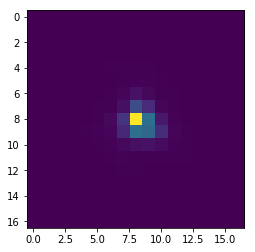

19 6 25
Box Size:  19 x 19
COM:  9.168770082582093 9.274987104859997
2dG:  9.213696647467131 9.170458706084336
774 51 



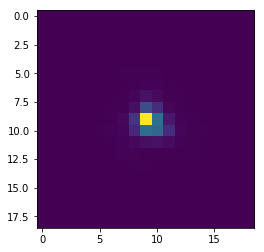

21 5 26
Box Size:  21 x 21
COM:  10.164647607537233 10.270594021856384
2dG:  10.213508828977332 10.170314723854437
775 51 



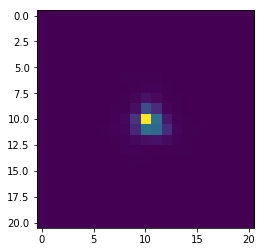

23 4 27
Box Size:  23 x 23
COM:  11.16125201943386 11.264660375416693
2dG:  11.2133647676199 11.170203818765728
776 51 



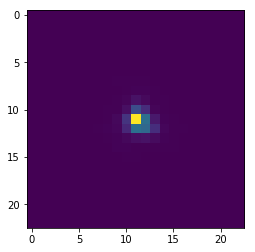

25 3 28
Box Size:  25 x 25
COM:  12.165066407542652 12.260473384296368
2dG:  12.21323296338207 12.170091707371437
777 51 



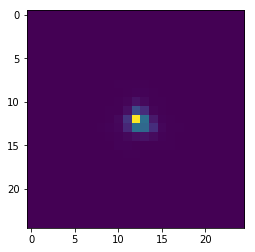

27 2 29
Box Size:  27 x 27
COM:  13.16174171578449 13.26604883806101
2dG:  13.131902746170473 13.000380143073105
778 51 



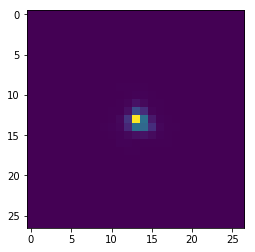

29 1 30
Box Size:  29 x 29
COM:  14.134730152487842 14.238727489627346
2dG:  14.213096541821244 14.169995808628446
779 51 



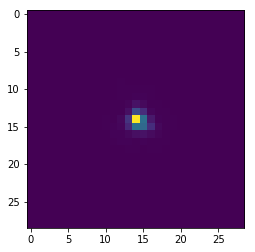

31 0 31
Box Size:  31 x 31
COM:  15.125459068972193 15.22741151692013
2dG:  15.212526212747694 15.169336015258837
780 51 



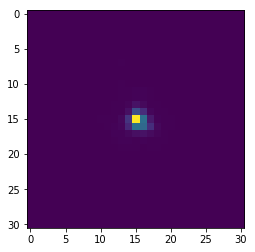

3 14 17
Box Size:  3 x 3
COM:  1.1720041454689871 1.2219314663147058
2dG:  1.2837129762900394 1.2058273184621489
781 52 



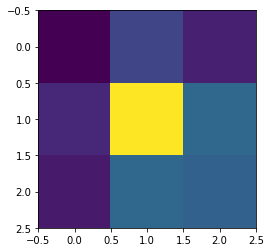

5 13 18
Box Size:  5 x 5
COM:  2.2055265588018487 2.3027212295280743
2dG:  2.2285390873191635 2.1764237867328955
782 52 



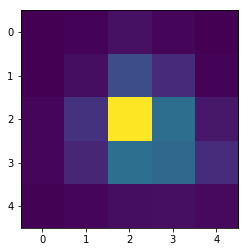

7 12 19
Box Size:  7 x 7
COM:  3.2068616233211427 3.3018465483276582
2dG:  3.220049655340837 3.1705610868246454
783 52 



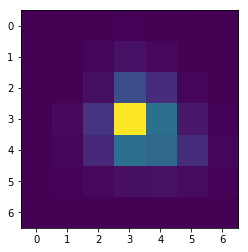

9 11 20
Box Size:  9 x 9
COM:  4.204781881675496 4.3103152442677635
2dG:  4.217238486922211 4.168522090911446
784 52 



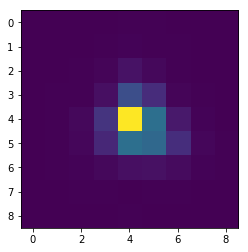

11 10 21
Box Size:  11 x 11
COM:  5.20391146645005 5.302351189164962
2dG:  5.2158671262259375 5.1675076996498905
785 52 



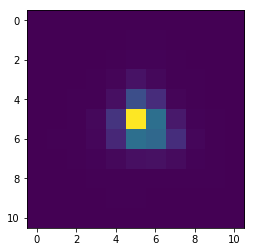

13 9 22
Box Size:  13 x 13
COM:  6.198498089835311 6.300617492663316
2dG:  6.215058261210052 6.166902936071059
786 52 



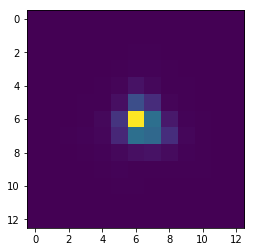

15 8 23
Box Size:  15 x 15
COM:  7.193953604125595 7.29906641703565
2dG:  7.214547066920381 7.166518191463174
787 52 



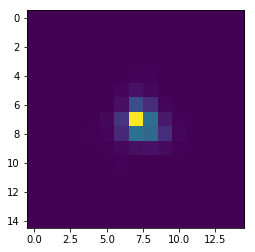

17 7 24
Box Size:  17 x 17
COM:  8.176494075814714 8.293974174409923
2dG:  8.214203020592556 8.166258105558095
788 52 



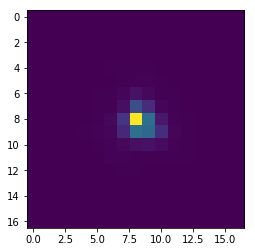

19 6 25
Box Size:  19 x 19
COM:  9.10299811661127 9.149830669571452
2dG:  9.1980475207931 9.161588218837833
789 52 



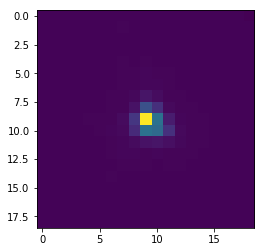

21 5 26
Box Size:  21 x 21
COM:  10.090518367828535 10.135781902530754
2dG:  10.21371894337521 10.165854874820877
790 52 



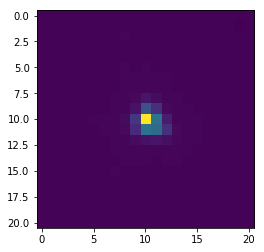

23 4 27
Box Size:  23 x 23
COM:  11.08369450278112 11.126666185153347
2dG:  11.213629498123968 11.165818517700957
791 52 



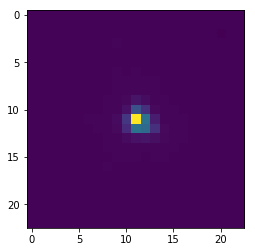

25 3 28
Box Size:  25 x 25
COM:  12.07669977562532 12.11240295062441
2dG:  12.080728699634118 12.02815378353108
792 52 



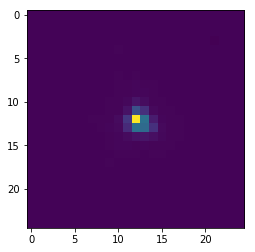

27 2 29
Box Size:  27 x 27
COM:  13.06987429027625 13.103166219839228
2dG:  13.213033757318843 13.165300276963235
793 52 



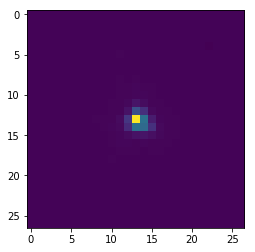

29 1 30
Box Size:  29 x 29
COM:  14.06494414392307 14.092403975800986
2dG:  14.198620676482053 14.150381740154485
794 52 



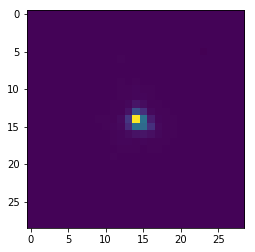

31 0 31
Box Size:  31 x 31
COM:  15.057647786979283 15.087502493270526
2dG:  15.213298180560628 15.165560122200734
795 52 



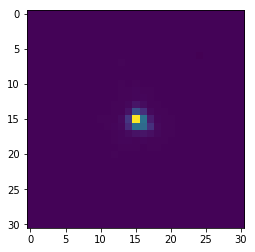

3 14 17
Box Size:  3 x 3
COM:  1.1747451013112569 1.229642317104174
2dG:  1.2977681332103819 1.2146225962841755
796 53 



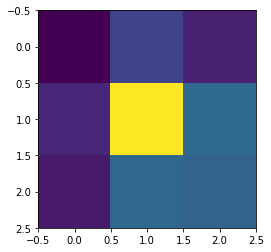

5 13 18
Box Size:  5 x 5
COM:  2.208138633931859 2.311609408749873
2dG:  2.2368159553373257 2.182379470280959
797 53 



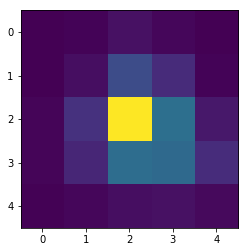

7 12 19
Box Size:  7 x 7
COM:  3.210565714168842 3.3130805563681807
2dG:  3.227959187886533 3.176172785274018
798 53 



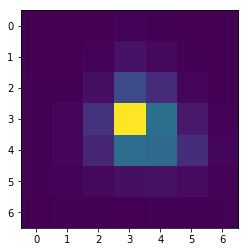

9 11 20
Box Size:  9 x 9
COM:  4.206886064829007 4.319295151239008
2dG:  4.22501966868668 4.173999787598084
799 53 



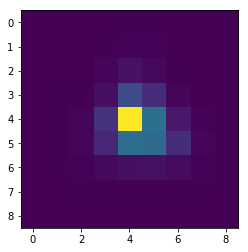

11 10 21
Box Size:  11 x 11
COM:  5.202613398042802 5.314667818235561
2dG:  5.223588852369259 5.1729186208010605
800 53 



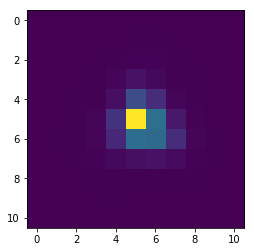

13 9 22
Box Size:  13 x 13
COM:  6.199427245035693 6.311228240434933
2dG:  6.222750257210381 6.17227728385537
801 53 



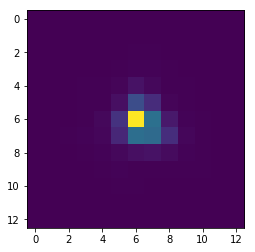

15 8 23
Box Size:  15 x 15
COM:  7.190772668915306 7.30463586027821
2dG:  7.222214516859821 7.17186444392033
802 53 



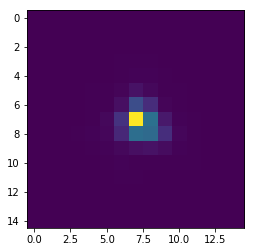

17 7 24
Box Size:  17 x 17
COM:  8.177267527057406 8.300495644260815
2dG:  8.221859510178653 8.171589493236402
803 53 



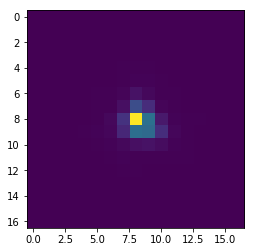

19 6 25
Box Size:  19 x 19
COM:  9.139169395405048 9.317909385379147
2dG:  9.221580485185378 9.171350923673538
804 53 



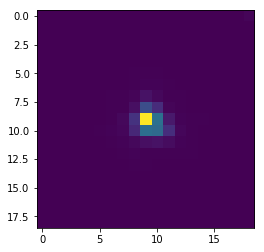

21 5 26
Box Size:  21 x 21
COM:  10.132083855301907 10.309827261740493
2dG:  10.221420154971128 10.171244802128632
805 53 



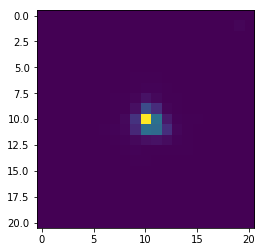

23 4 27
Box Size:  23 x 23
COM:  11.12576639225905 11.292404726665847
2dG:  11.221264338706364 11.171118324638261
806 53 



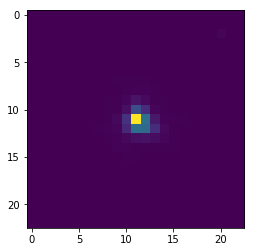

25 3 28
Box Size:  25 x 25
COM:  12.118640299201447 12.28984185862136
2dG:  12.221003644553223 12.170827227796552
807 53 



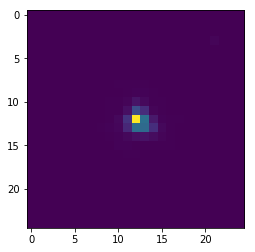

27 2 29
Box Size:  27 x 27
COM:  13.125690535302823 13.29171767239595
2dG:  13.221068406447406 13.170972751442271
808 53 



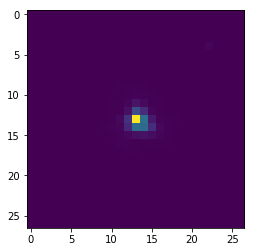

29 1 30
Box Size:  29 x 29
COM:  14.126384358995724 14.286874044192587
2dG:  14.22099262751527 14.17091257981055
809 53 



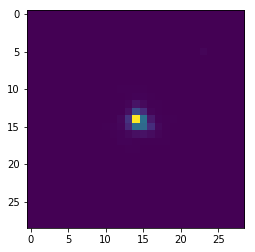

31 0 31
Box Size:  31 x 31
COM:  15.11566575697297 15.277480097186455
2dG:  15.217529917943024 15.167805263031598
810 53 



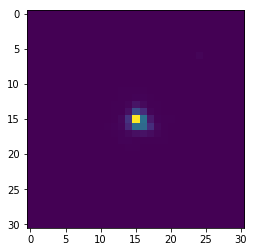

3 14 17
Box Size:  3 x 3
COM:  1.1659816617284153 1.233088843756133
2dG:  1.3045248905921285 1.2054780203463393
811 54 



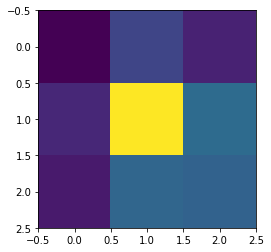

5 13 18
Box Size:  5 x 5
COM:  2.1972267810445865 2.313734573985311
2dG:  2.2396735487847836 2.1728871908530984
812 54 



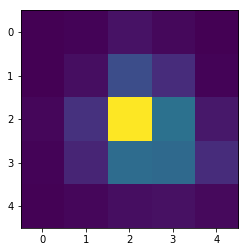

7 12 19
Box Size:  7 x 7
COM:  3.2019623193311344 3.3167723430695544
2dG:  3.230792753716816 3.166943151636066
813 54 



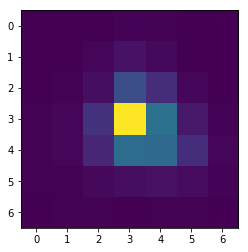

9 11 20
Box Size:  9 x 9
COM:  4.200887948210973 4.3224234647169455
2dG:  4.22785837225493 4.164860843199196
814 54 



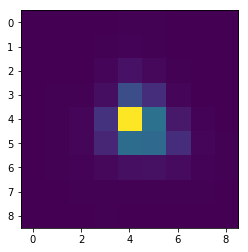

11 10 21
Box Size:  11 x 11
COM:  5.2006983556175985 5.315390231523351
2dG:  5.226424847153745 5.1638185248352535
815 54 



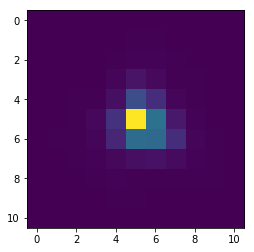

13 9 22
Box Size:  13 x 13
COM:  6.193222635216152 6.310598311169993
2dG:  6.225587453591089 6.1632013854016225
816 54 



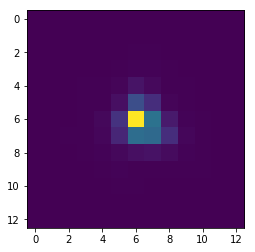

15 8 23
Box Size:  15 x 15
COM:  7.190143422336883 7.310540907639694
2dG:  7.225061412711831 7.162810430129321
817 54 



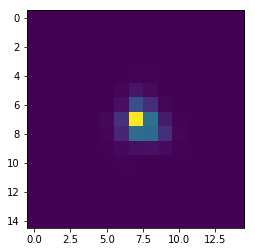

17 7 24
Box Size:  17 x 17
COM:  8.175416371507913 8.303948108610301
2dG:  8.224699047153807 8.162539583610668
818 54 



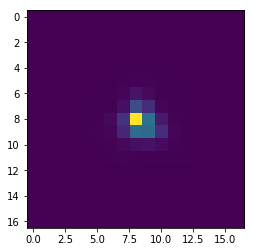

19 6 25
Box Size:  19 x 19
COM:  9.12146766667362 9.198341310099114
2dG:  9.224436384991545 9.162341926280188
819 54 



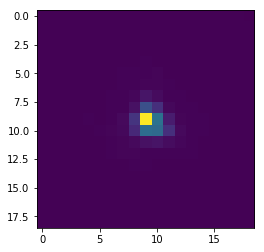

21 5 26
Box Size:  21 x 21
COM:  10.112597345492109 10.180793871439699
2dG:  10.224234375976742 10.162183107653586
820 54 



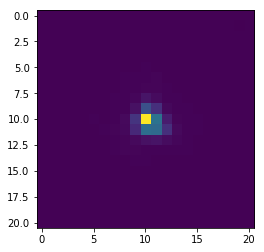

23 4 27
Box Size:  23 x 23
COM:  11.104571424508284 11.169898374609309
2dG:  11.22295437112241 11.160272358850227
821 54 



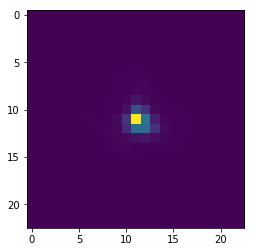

25 3 28
Box Size:  25 x 25
COM:  12.09617743228082 12.15699735849834
2dG:  12.223991553244401 12.16200180448299
822 54 



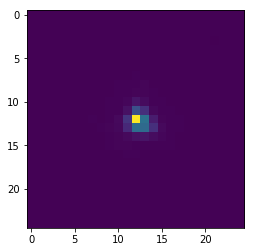

27 2 29
Box Size:  27 x 27
COM:  13.09071852761864 13.150472226468972
2dG:  13.36713683134991 13.201225456750779
823 54 



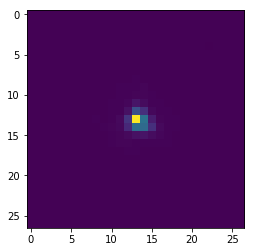

29 1 30
Box Size:  29 x 29
COM:  14.083818091071775 14.13787419441598
2dG:  14.22383249055416 14.161876433552552
824 54 



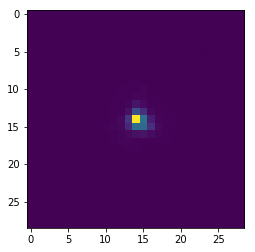

31 0 31
Box Size:  31 x 31
COM:  15.082609759513206 15.126563046715646
2dG:  15.223781131664273 15.161836759435786
825 54 



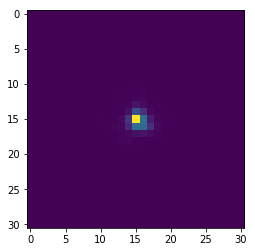

3 14 17
Box Size:  3 x 3
COM:  1.1612990610410598 1.23818221427673
2dG:  1.3134450354286515 1.2005273617547148
826 55 



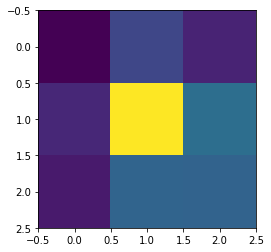

5 13 18
Box Size:  5 x 5
COM:  2.1945607671648992 2.321294842274254
2dG:  2.2458474183278123 2.167959221586703
827 55 



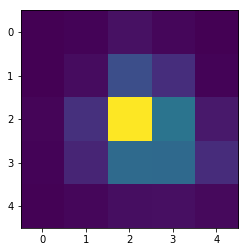

7 12 19
Box Size:  7 x 7
COM:  3.1958539903435104 3.3238381689014385
2dG:  3.236776462188077 3.1620669888244075
828 55 



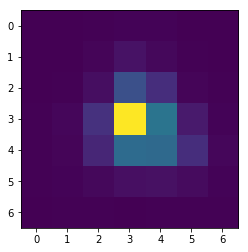

9 11 20
Box Size:  9 x 9
COM:  4.192265991605289 4.329702261382736
2dG:  4.233826808398863 4.160024716948129
829 55 



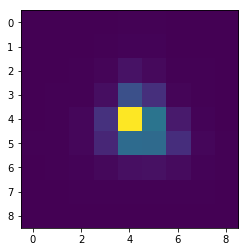

11 10 21
Box Size:  11 x 11
COM:  5.190354877967519 5.32459918828777
2dG:  5.2323829853666295 5.158998038072881
830 55 



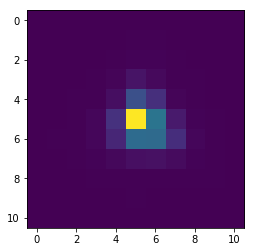

13 9 22
Box Size:  13 x 13
COM:  6.1856967471288575 6.322490319366331
2dG:  6.231548041453947 6.1583954394886655
831 55 



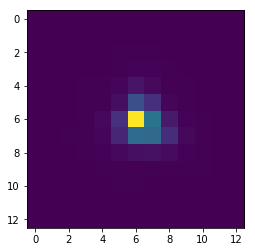

15 8 23
Box Size:  15 x 15
COM:  7.178035769093276 7.317882237068139
2dG:  7.231025841634787 7.158015063452181
832 55 



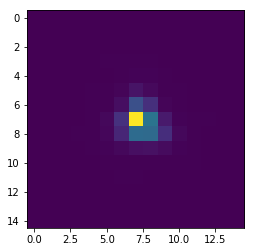

17 7 24
Box Size:  17 x 17
COM:  8.159160673534759 8.30422058561715
2dG:  8.230671649553145 8.15775545795193
833 55 



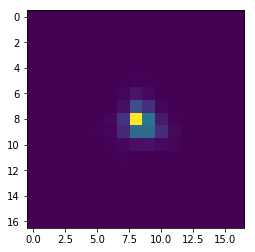

19 6 25
Box Size:  19 x 19
COM:  9.117319420848668 9.226435352817022
2dG:  9.23038422529132 9.15752222435022
834 55 



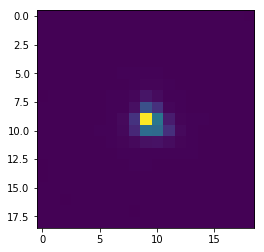

21 5 26
Box Size:  21 x 21
COM:  10.10519946978831 10.212332988171484
2dG:  10.230223832737298 10.157422699726734
835 55 



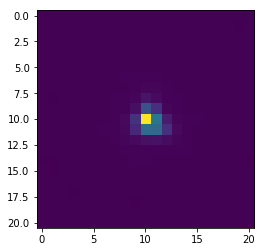

23 4 27
Box Size:  23 x 23
COM:  11.098041282052206 11.198730363004563
2dG:  11.230057780351185 11.15728520602245
836 55 



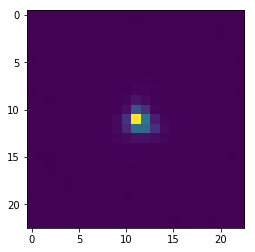

25 3 28
Box Size:  25 x 25
COM:  12.094649230926208 12.183910643637645
2dG:  12.229882394494213 12.157108714850837
837 55 



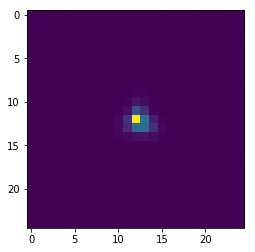

27 2 29
Box Size:  27 x 27
COM:  13.086781530909915 13.173162241769898
2dG:  13.218814709323215 13.145185381332197
838 55 



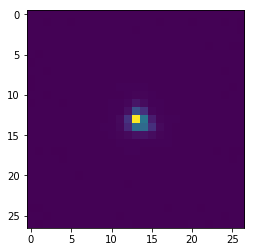

29 1 30
Box Size:  29 x 29
COM:  14.079859058267495 14.160239778830382
2dG:  14.229827409368273 14.157045859494003
839 55 



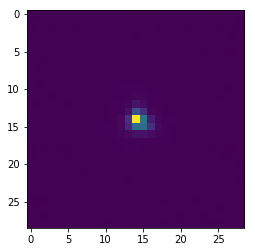

31 0 31
Box Size:  31 x 31
COM:  15.074314535873201 15.145716876792108
2dG:  15.211527234868903 15.137874762986442
840 55 



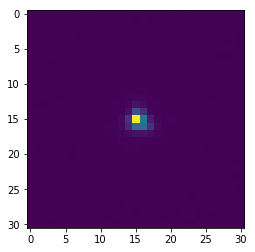

3 14 17
Box Size:  3 x 3
COM:  1.174619265015989 1.243786145309412
2dG:  1.3280232434596058 1.223310207392226
841 56 



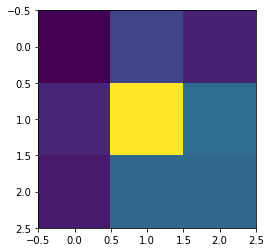

5 13 18
Box Size:  5 x 5
COM:  2.2114317478876004 2.330350039538403
2dG:  2.253215555508779 2.1861840675466766
842 56 



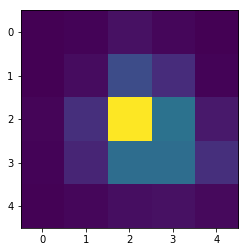

7 12 19
Box Size:  7 x 7
COM:  3.213020385779194 3.3339589009465658
2dG:  3.2438595945121684 3.179847221502979
843 56 



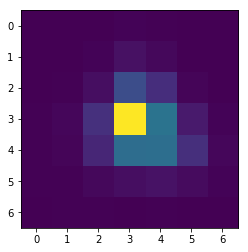

9 11 20
Box Size:  9 x 9
COM:  4.210396816897092 4.334075247194768
2dG:  4.240779447766301 4.177627792765656
844 56 



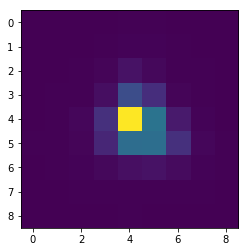

11 10 21
Box Size:  11 x 11
COM:  5.2078687821386165 5.3261572989604975
2dG:  5.239300007633074 5.176533514489875
845 56 



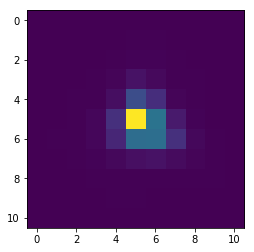

13 9 22
Box Size:  13 x 13
COM:  6.205477076895639 6.323864136984019
2dG:  6.238430887526567 6.175881235372446
846 56 



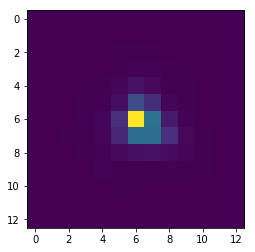

15 8 23
Box Size:  15 x 15
COM:  7.1966416003360765 7.3226324411275385
2dG:  7.237891306534332 7.175472565135964
847 56 



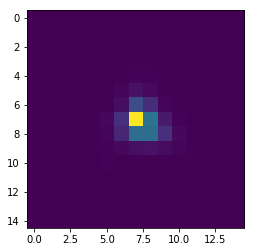

17 7 24
Box Size:  17 x 17
COM:  8.183743820937677 8.313963251303647
2dG:  8.237528151081255 8.175195816009936
848 56 



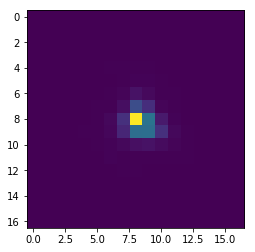

19 6 25
Box Size:  19 x 19
COM:  9.147806217324234 9.338720223134173
2dG:  9.237279805965526 9.175003180828583
849 56 



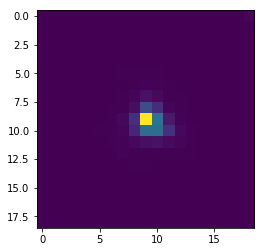

21 5 26
Box Size:  21 x 21
COM:  10.143790279525204 10.328776782125994
2dG:  10.237081142017239 10.174852704667284
850 56 



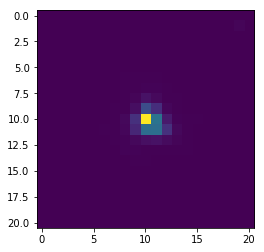

23 4 27
Box Size:  23 x 23
COM:  11.137186342522655 11.313663160184701
2dG:  11.236880766292765 11.174656988221136
851 56 



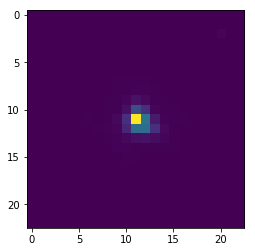

25 3 28
Box Size:  25 x 25
COM:  12.133043968532073 12.31385533468833
2dG:  12.23680422540469 12.174633729970209
852 56 



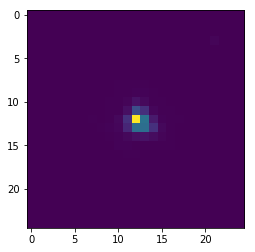

27 2 29
Box Size:  27 x 27
COM:  13.134378376046618 13.309680327447836
2dG:  13.236710909827783 13.174563705038848
853 56 



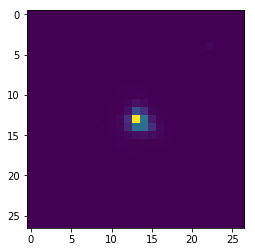

29 1 30
Box Size:  29 x 29
COM:  14.135223476317979 14.301670797130809
2dG:  14.236632903006106 14.174492828924082
854 56 



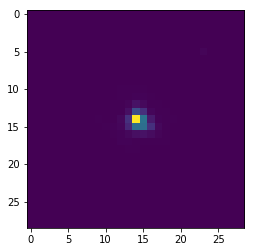

31 0 31
Box Size:  31 x 31
COM:  15.12978661387536 15.298596083783304
2dG:  15.236588134280954 15.174471576539348
855 56 



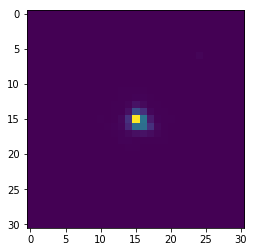

3 14 17
Box Size:  3 x 3
COM:  1.1757259575907273 1.2399316491554502
2dG:  1.323291604527643 1.2216336374729952
856 57 



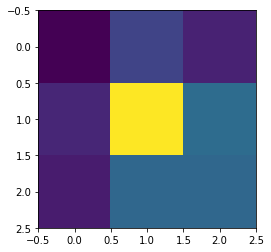

5 13 18
Box Size:  5 x 5
COM:  2.2132029477814146 2.3260723855369383
2dG:  2.250527847811388 2.1854478876460184
857 57 



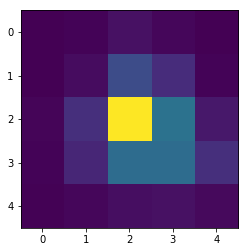

7 12 19
Box Size:  7 x 7
COM:  3.2165713790844026 3.3270402778249237
2dG:  3.2412333963866846 3.1791708137146073
858 57 



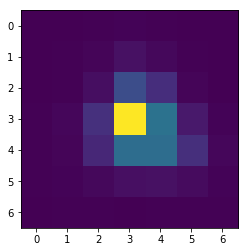

9 11 20
Box Size:  9 x 9
COM:  4.214566016887602 4.3319729464150205
2dG:  4.238144937090255 4.17695927252583
859 57 



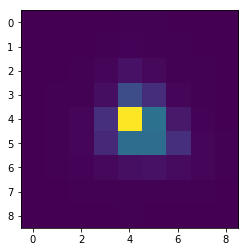

11 10 21
Box Size:  11 x 11
COM:  5.213441717548073 5.323048852943384
2dG:  5.2366514130351876 5.1758632839082095
860 57 



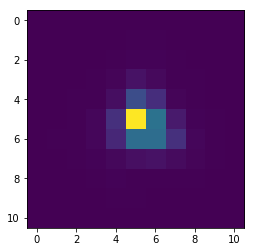

13 9 22
Box Size:  13 x 13
COM:  6.209562933207049 6.320557613125458
2dG:  6.235784476373758 6.175218420034749
861 57 



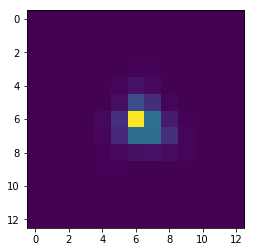

15 8 23
Box Size:  15 x 15
COM:  7.206763846706879 7.313042888289012
2dG:  7.235240827237262 7.174810629818307
862 57 



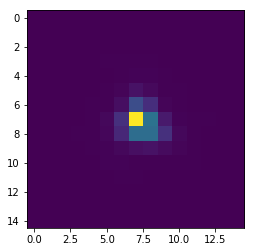

17 7 24
Box Size:  17 x 17
COM:  8.203084208260893 8.305718883432515
2dG:  8.234880455089309 8.17453877518817
863 57 



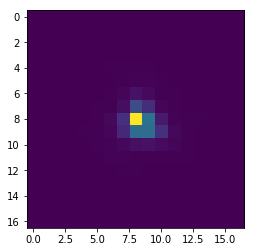

19 6 25
Box Size:  19 x 19
COM:  9.191908209658532 9.299730105948132
2dG:  9.234618947630556 9.17434064023007
864 57 



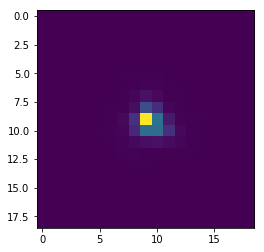

21 5 26
Box Size:  21 x 21
COM:  10.197331282482823 10.286196567212318
2dG:  10.234397407490011 10.174152089263966
865 57 



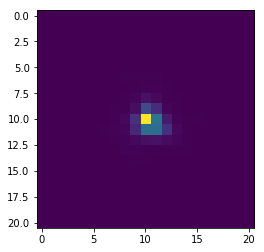

23 4 27
Box Size:  23 x 23
COM:  11.213656866773581 11.27544925908037
2dG:  11.23428014115702 11.174081828881404
866 57 



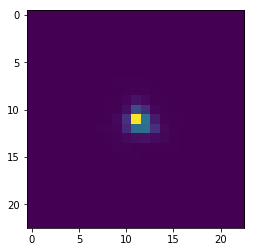

25 3 28
Box Size:  25 x 25
COM:  12.236993379982223 12.254123744600713
2dG:  12.2341670589252 12.173996140589
867 57 



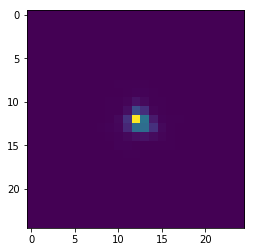

27 2 29
Box Size:  27 x 27
COM:  13.264243357325475 13.241570673152257
2dG:  13.23330770485468 13.172972064423728
868 57 



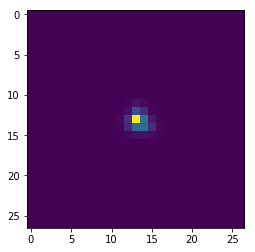

29 1 30
Box Size:  29 x 29
COM:  14.30269872730125 14.227019043526019
2dG:  14.233948448347522 14.173778308037166
869 57 



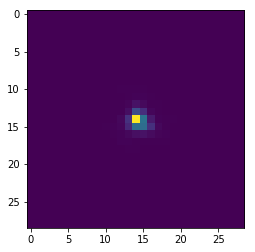

31 0 31
Box Size:  31 x 31
COM:  15.329421754648175 15.208820216273054
2dG:  15.233953248506255 15.173829483647596
870 57 



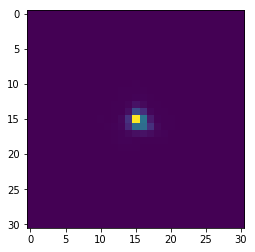

3 14 17
Box Size:  3 x 3
COM:  1.173467401368712 1.2357511797441287
2dG:  1.3090186243329338 1.2163290866239718
871 58 



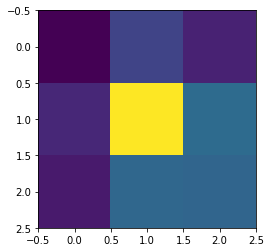

5 13 18
Box Size:  5 x 5
COM:  2.2093104251386775 2.3198337091982446
2dG:  2.2437208108639157 2.1827761320569827
872 58 



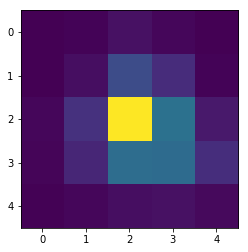

7 12 19
Box Size:  7 x 7
COM:  3.2151886997906565 3.3221655669413725
2dG:  3.2346808095703525 3.1765069620908366
873 58 



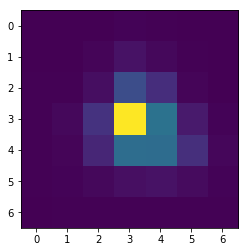

9 11 20
Box Size:  9 x 9
COM:  4.213942932997286 4.328584425916504
2dG:  4.231749778990828 4.174351852637486
874 58 



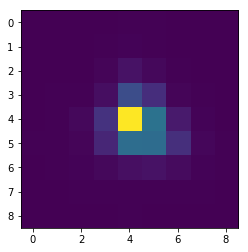

11 10 21
Box Size:  11 x 11
COM:  5.211578394173888 5.319730556691719
2dG:  5.230305555413496 5.173263830852842
875 58 



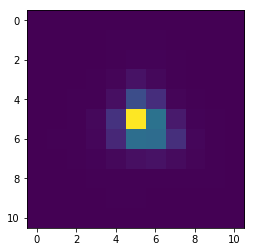

13 9 22
Box Size:  13 x 13
COM:  6.206979719380157 6.317553414795594
2dG:  6.229465784895028 6.172622504109002
876 58 



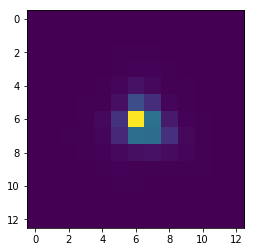

15 8 23
Box Size:  15 x 15
COM:  7.199065858452836 7.312169390721141
2dG:  7.228932514149713 7.172211731593451
877 58 



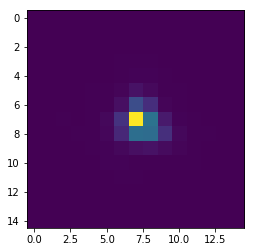

17 7 24
Box Size:  17 x 17
COM:  8.19213866526827 8.311169707226174
2dG:  8.228572219743912 8.171932594215948
878 58 



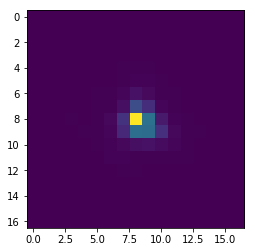

19 6 25
Box Size:  19 x 19
COM:  9.166394436752917 9.294435354972986
2dG:  9.228320908219812 9.171734296055988
879 58 



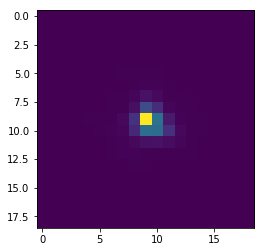

21 5 26
Box Size:  21 x 21
COM:  10.164539955430365 10.282516486140063
2dG:  10.228129406409044 10.171584814691704
880 58 



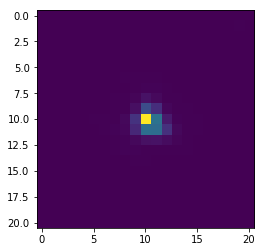

23 4 27
Box Size:  23 x 23
COM:  11.161921155468772 11.278769156582852
2dG:  11.227981978173338 11.171471581862114
881 58 



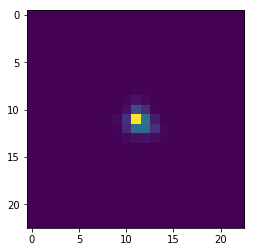

25 3 28
Box Size:  25 x 25
COM:  12.16056648738964 12.268985176717266
2dG:  12.227870594780281 12.171384332522893
882 58 



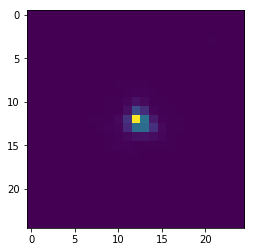

27 2 29
Box Size:  27 x 27
COM:  13.155465575210117 13.264131861491943
2dG:  13.227766669181605 13.171296217286626
883 58 



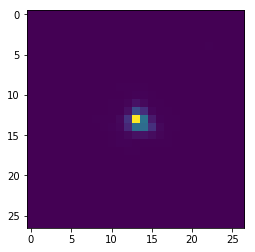

29 1 30
Box Size:  29 x 29
COM:  14.15078383954247 14.261816184825879
2dG:  14.227705990324747 14.171253922455444
884 58 



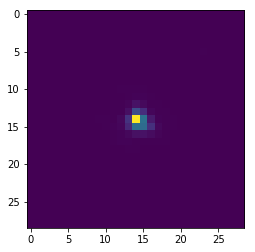

31 0 31
Box Size:  31 x 31
COM:  15.15551291403233 15.251933244263528
2dG:  15.227652037268356 15.171211777142389
885 58 



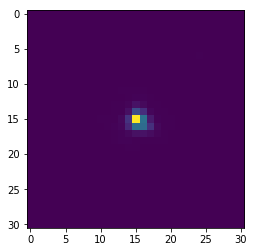

3 14 17
Box Size:  3 x 3
COM:  1.170915329320872 1.243194709717994
2dG:  1.3258471389404747 1.2176137972059005
886 59 



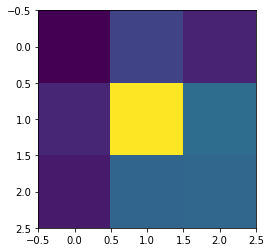

5 13 18
Box Size:  5 x 5
COM:  2.2067419555931393 2.330017106501714
2dG:  2.2526843501906035 2.1817716005885233
887 59 



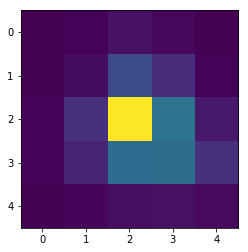

7 12 19
Box Size:  7 x 7
COM:  3.2098642688062604 3.3352828308394376
2dG:  3.243266338533587 3.175445791047132
888 59 



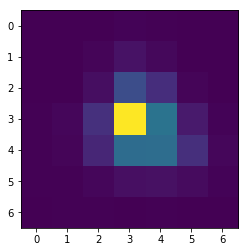

9 11 20
Box Size:  9 x 9
COM:  4.206934604931177 4.335622730163046
2dG:  4.240176195578841 4.1732330099717965
889 59 



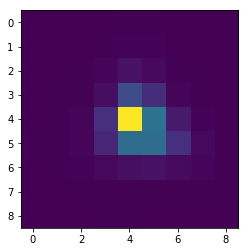

11 10 21
Box Size:  11 x 11
COM:  5.20679913772553 5.329823415072275
2dG:  5.238664005501316 5.172120288909258
890 59 



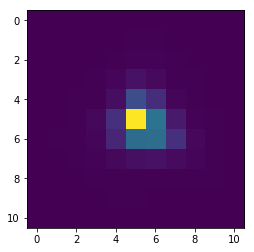

13 9 22
Box Size:  13 x 13
COM:  6.2013845113404225 6.3245370293361995
2dG:  6.237796551507894 6.171472206436338
891 59 



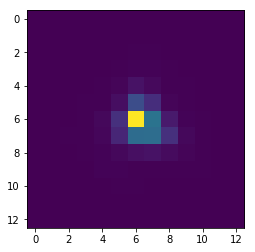

15 8 23
Box Size:  15 x 15
COM:  7.194445409067069 7.319990578247524
2dG:  7.237245415150611 7.171056484226459
892 59 



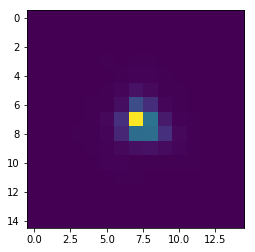

17 7 24
Box Size:  17 x 17
COM:  8.177170297601055 8.308594023978822
2dG:  8.236878397256458 8.170777865251434
893 59 



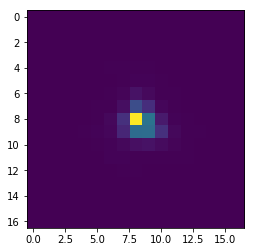

19 6 25
Box Size:  19 x 19
COM:  9.108772188987968 9.167129457922893
2dG:  9.23657664662155 9.170525898551428
894 59 



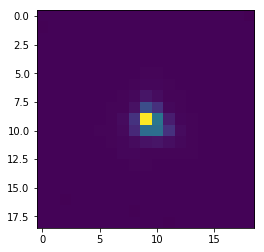

21 5 26
Box Size:  21 x 21
COM:  10.098004188167968 10.150798365485876
2dG:  10.196304662390682 10.133724843995969
895 59 



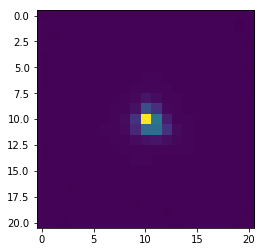

23 4 27
Box Size:  23 x 23
COM:  11.085889075971894 11.135988803254152
2dG:  11.236163691238454 11.17014446221829
896 59 



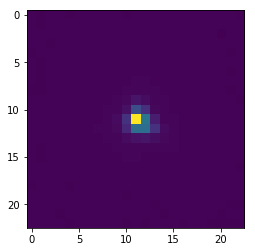

25 3 28
Box Size:  25 x 25
COM:  12.076927370677321 12.122832682941867
2dG:  12.236140382258688 12.170206219008733
897 59 



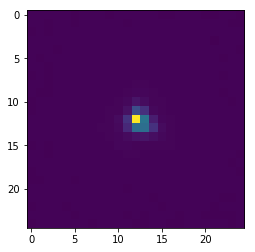

27 2 29
Box Size:  27 x 27
COM:  13.071763435719003 13.113384493482137
2dG:  13.236041445959259 13.170125525615743
898 59 



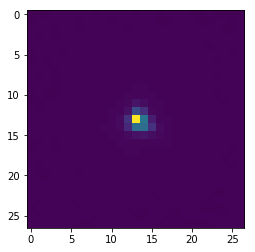

29 1 30
Box Size:  29 x 29
COM:  14.063749915301747 14.103805604905133
2dG:  14.23594870248197 14.170048386919765
899 59 



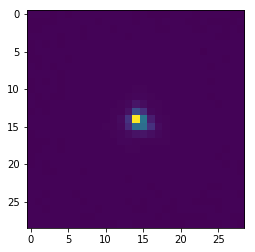

31 0 31
Box Size:  31 x 31
COM:  15.058704876575204 15.098000848813637
2dG:  15.235606558156142 15.169690871357988
900 59 



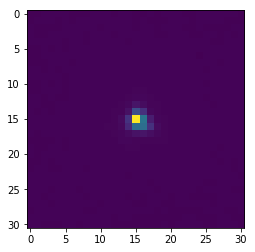

3 14 17
Box Size:  3 x 3
COM:  1.1673134809474421 1.2421662143202328
2dG:  1.321237141596042 1.2115401773867052
901 60 



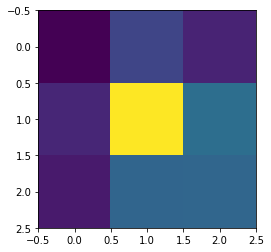

5 13 18
Box Size:  5 x 5
COM:  2.204130686553422 2.329318393838801
2dG:  2.250764029481375 2.1771778941173734
902 60 



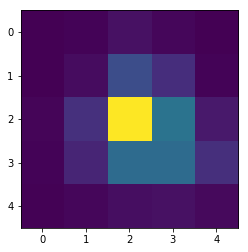

7 12 19
Box Size:  7 x 7
COM:  3.2062598070949413 3.328778583721963
2dG:  3.241541136039932 3.1710190315741595
903 60 



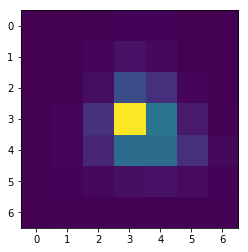

9 11 20
Box Size:  9 x 9
COM:  4.204442783807233 4.338449495441766
2dG:  4.23854959916715 4.168885795093928
904 60 



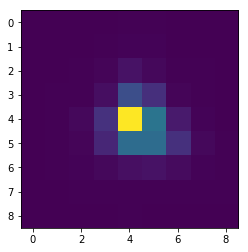

11 10 21
Box Size:  11 x 11
COM:  5.202478983566074 5.3354498224178935
2dG:  5.237094233409073 5.167818718955409
905 60 



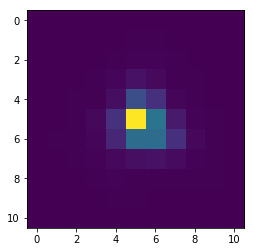

13 9 22
Box Size:  13 x 13
COM:  6.197617557051851 6.329831068363818
2dG:  6.236245464190159 6.167186573951259
906 60 



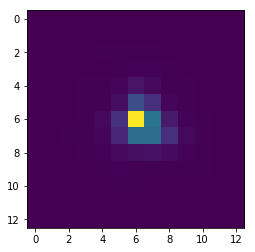

15 8 23
Box Size:  15 x 15
COM:  7.191851289156794 7.323232006176129
2dG:  7.235707845822869 7.166782184270547
907 60 



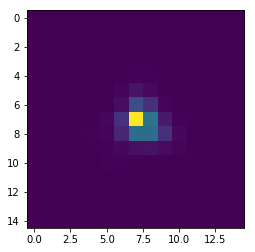

17 7 24
Box Size:  17 x 17
COM:  8.183432102541593 8.319940584270269
2dG:  8.235349865476719 8.166511117144214
908 60 



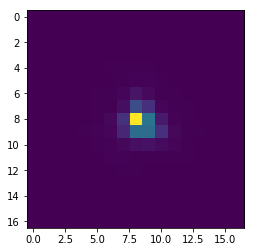

19 6 25
Box Size:  19 x 19
COM:  9.14290477636667 9.242826876114249
2dG:  9.233954178579863 9.16469834142777
909 60 



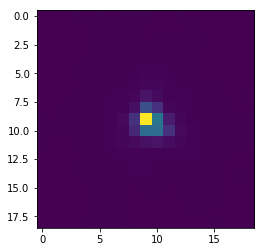

21 5 26
Box Size:  21 x 21
COM:  10.136632630814391 10.233018996099009
2dG:  10.234907238669367 10.166170251237869
910 60 



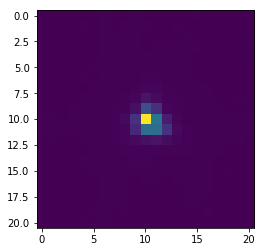

23 4 27
Box Size:  23 x 23
COM:  11.11392894605437 11.233617302308389
2dG:  11.23476081074913 11.166056985648781
911 60 



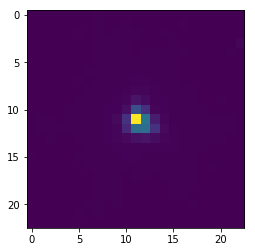

25 3 28
Box Size:  25 x 25
COM:  12.110047317579502 12.218849221998104
2dG:  12.23337707909679 12.164407541560763
912 60 



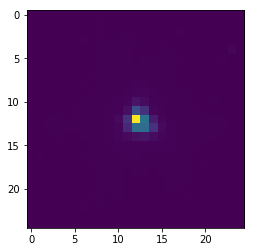

27 2 29
Box Size:  27 x 27
COM:  13.107032317220837 13.208445082158113
2dG:  13.232065149784981 13.163149190098245
913 60 



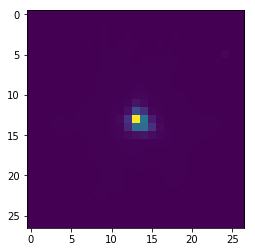

29 1 30
Box Size:  29 x 29
COM:  14.101376420289212 14.197010184583034
2dG:  14.234479381987695 14.165842263503098
914 60 



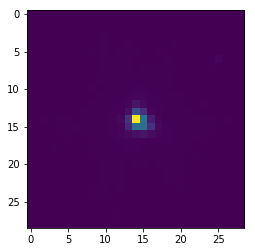

31 0 31
Box Size:  31 x 31
COM:  15.093558263505011 15.182559976714458
2dG:  15.234099353092402 15.165301177130267
915 60 



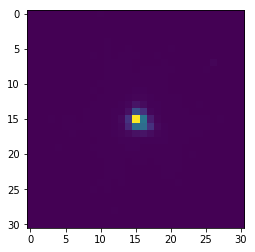

3 14 17
Box Size:  3 x 3
COM:  1.1746999480308065 1.2405745708417257
2dG:  1.3259300858614238 1.223216329412985
916 61 



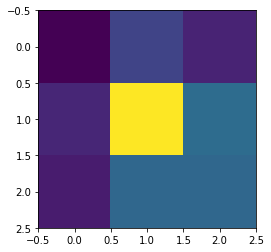

5 13 18
Box Size:  5 x 5
COM:  2.2136489672187114 2.3255439743246233
2dG:  2.250902370285996 2.1860454721270934
917 61 



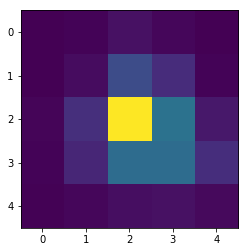

7 12 19
Box Size:  7 x 7
COM:  3.216406749624859 3.327008061051715
2dG:  3.2413904346905693 3.179584228021506
918 61 



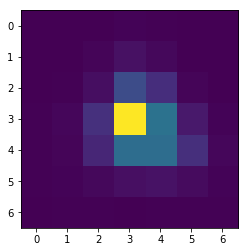

9 11 20
Box Size:  9 x 9
COM:  4.215746055729521 4.331480813308607
2dG:  4.238276744179137 4.177337443247736
919 61 



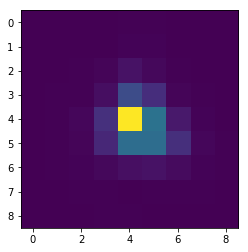

11 10 21
Box Size:  11 x 11
COM:  5.212872291288739 5.327126609235192
2dG:  5.2367679058194785 5.176221008194302
920 61 



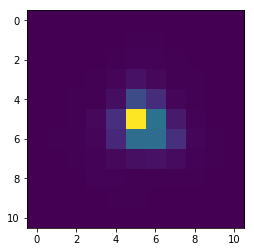

13 9 22
Box Size:  13 x 13
COM:  6.207325900478342 6.324145660700795
2dG:  6.235879698225202 6.1755545428302225
921 61 



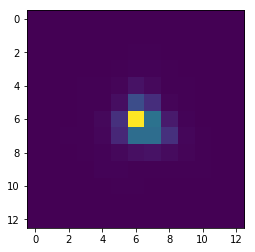

15 8 23
Box Size:  15 x 15
COM:  7.200560033682345 7.325384189503026
2dG:  7.235324379667911 7.175134204617828
922 61 



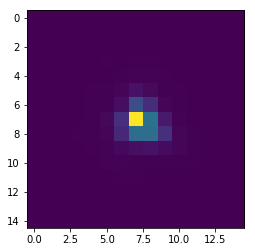

17 7 24
Box Size:  17 x 17
COM:  8.191124387514993 8.321825658807306
2dG:  8.234955119855135 8.174853053869802
923 61 



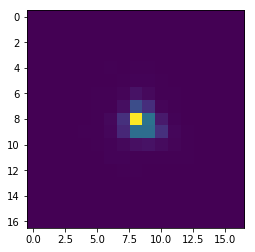

19 6 25
Box Size:  19 x 19
COM:  9.168152370422625 9.290744196572119
2dG:  9.23468470551547 9.174646074878396
924 61 



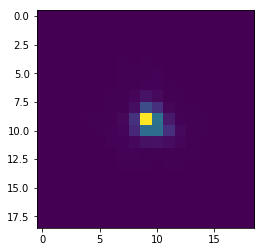

21 5 26
Box Size:  21 x 21
COM:  10.162763613320395 10.284240340697187
2dG:  10.234484859692156 10.174492677274676
925 61 



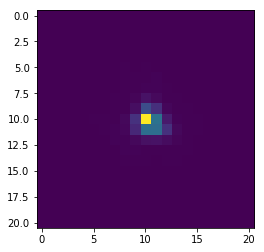

23 4 27
Box Size:  23 x 23
COM:  11.15846864785869 11.280522542378442
2dG:  11.234337064662972 11.174379384008214
926 61 



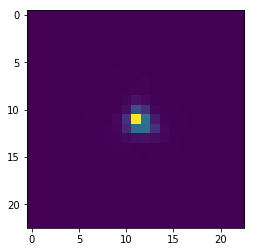

25 3 28
Box Size:  25 x 25
COM:  12.153884251556816 12.271086663471939
2dG:  12.234206995764241 12.17427268152186
927 61 



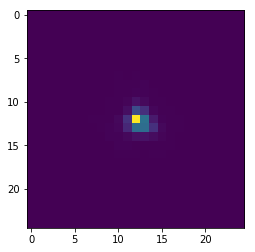

27 2 29
Box Size:  27 x 27
COM:  13.15074411661206 13.267818577302876
2dG:  13.234131041228672 13.17421626755
928 61 



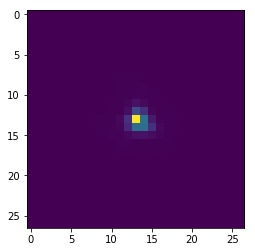

29 1 30
Box Size:  29 x 29
COM:  14.144104535936263 14.263787520141479
2dG:  14.23405505666998 14.174159783924416
929 61 



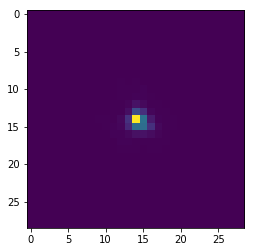

31 0 31
Box Size:  31 x 31
COM:  15.145158805561834 15.253335241040592
2dG:  15.233991323035784 15.174108868416315
930 61 



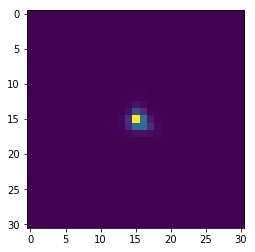

3 14 17
Box Size:  3 x 3
COM:  1.179323832724287 1.2357875862288124
2dG:  1.3165433113925096 1.2260618905346021
931 62 



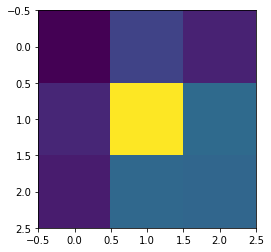

5 13 18
Box Size:  5 x 5
COM:  2.2181980132252637 2.3218010761901584
2dG:  2.2463313105935017 2.190049544668403
932 62 



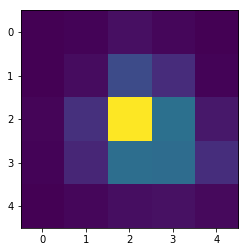

7 12 19
Box Size:  7 x 7
COM:  3.220844398192809 3.3235142058333618
2dG:  3.237002281116863 3.1835826603587107
933 62 



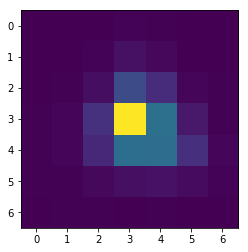

9 11 20
Box Size:  9 x 9
COM:  4.219502470439634 4.330182893235976
2dG:  4.233922203886953 4.181326277832135
934 62 



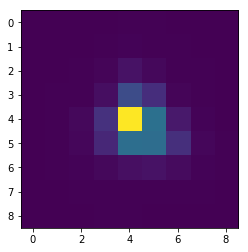

11 10 21
Box Size:  11 x 11
COM:  5.21668254661075 5.323455633862299
2dG:  5.232427877996452 5.180206462525472
935 62 



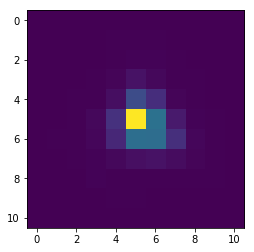

13 9 22
Box Size:  13 x 13
COM:  6.2157389182757266 6.322700402033999
2dG:  6.231541762960822 6.179534033017425
936 62 



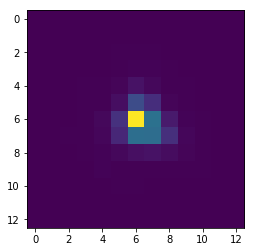

15 8 23
Box Size:  15 x 15
COM:  7.207533086368357 7.320922734895334
2dG:  7.230990434020731 7.179112363531197
937 62 



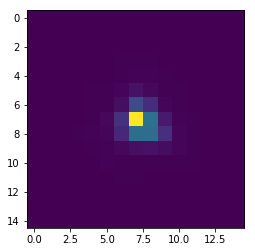

17 7 24
Box Size:  17 x 17
COM:  8.198700852562911 8.314278063606327
2dG:  8.230625288700873 8.178831609818191
938 62 



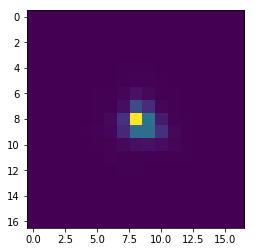

19 6 25
Box Size:  19 x 19
COM:  9.16219425493511 9.249873219169002
2dG:  9.230337211710708 9.17860020874601
939 62 



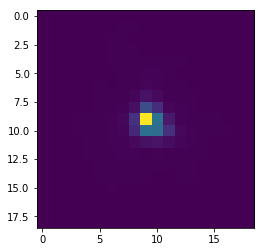

21 5 26
Box Size:  21 x 21
COM:  10.15335867858039 10.23564150336958
2dG:  10.230148613209861 10.178458158912056
940 62 



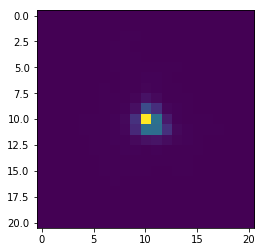

23 4 27
Box Size:  23 x 23
COM:  11.145043651967613 11.226079954762202
2dG:  11.230016081730096 11.178357780769787
941 62 



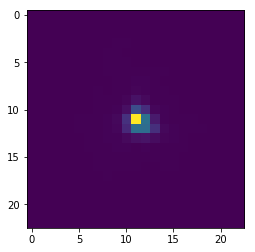

25 3 28
Box Size:  25 x 25
COM:  12.143745847392994 12.221005785635324
2dG:  12.229883110603277 12.178244045016026
942 62 



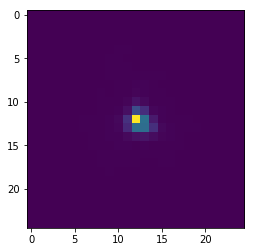

27 2 29
Box Size:  27 x 27
COM:  13.135828001752252 13.210544462499955
2dG:  13.229792599966549 13.178177103483213
943 62 



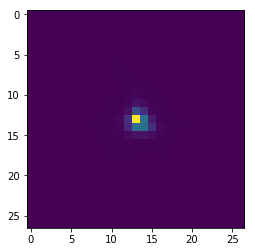

29 1 30
Box Size:  29 x 29
COM:  14.131867270948991 14.202947601423862
2dG:  13.860261699003395 14.066674268453314
944 62 



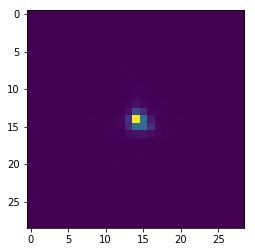

31 0 31
Box Size:  31 x 31
COM:  15.128541090371327 15.186504691650661
2dG:  15.229646991046346 15.178068576482483
945 62 



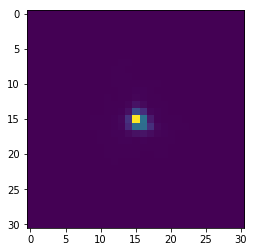

3 14 17
Box Size:  3 x 3
COM:  1.1842656216776208 1.228881596288636
2dG:  1.3057328234019638 1.2276775191270717
946 63 



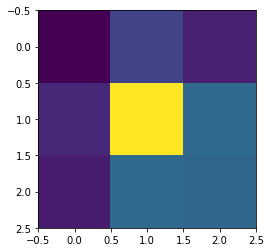

5 13 18
Box Size:  5 x 5
COM:  2.223104894289365 2.314851015366702
2dG:  2.2405536559352437 2.1931708890301578
947 63 



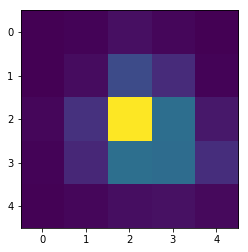

7 12 19
Box Size:  7 x 7
COM:  3.224652875575868 3.3170701702855316
2dG:  3.231508479123586 3.1868073331046896
948 63 



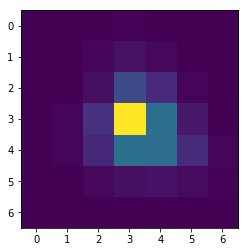

9 11 20
Box Size:  9 x 9
COM:  4.223648110257532 4.323340272777597
2dG:  4.228509148395252 4.1845915234860325
949 63 



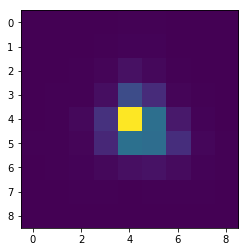

11 10 21
Box Size:  11 x 11
COM:  5.220902657857802 5.317407980200753
2dG:  5.2270316125049785 5.183478316455397
950 63 



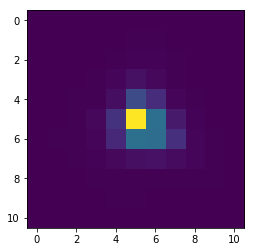

13 9 22
Box Size:  13 x 13
COM:  6.2174725305299265 6.316819389725439
2dG:  6.226180018050739 6.182829779569704
951 63 



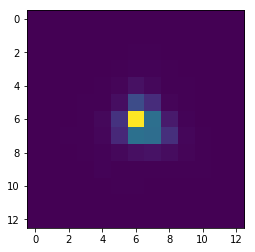

15 8 23
Box Size:  15 x 15
COM:  7.214916175856572 7.320310782279636
2dG:  7.225638318470811 7.182414534756476
952 63 



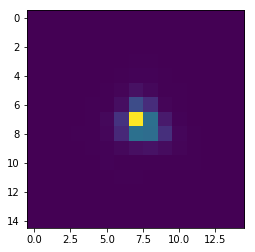

17 7 24
Box Size:  17 x 17
COM:  8.201919623574495 8.312235243217444
2dG:  8.225276556833627 8.182135975621353
953 63 



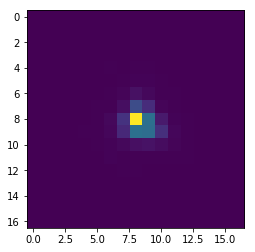

19 6 25
Box Size:  19 x 19
COM:  9.18840161366485 9.310385307786746
2dG:  9.225015049245219 9.181933946887703
954 63 



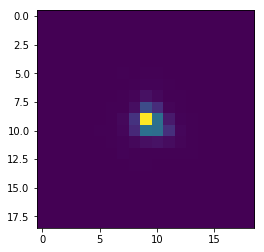

21 5 26
Box Size:  21 x 21
COM:  10.184831935413541 10.308142234594818
2dG:  10.224752654868249 10.181699890665582
955 63 



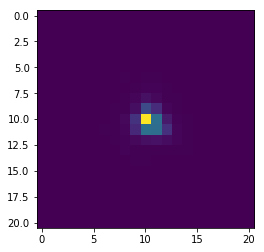

23 4 27
Box Size:  23 x 23
COM:  11.174867654375632 11.296824940537189
2dG:  11.224667841643667 11.181660438015138
956 63 



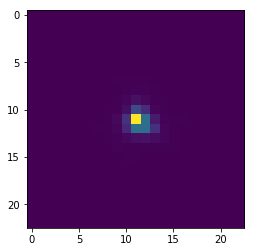

25 3 28
Box Size:  25 x 25
COM:  12.180841992933974 12.289850330769683
2dG:  12.224555928609348 12.181573017264226
957 63 



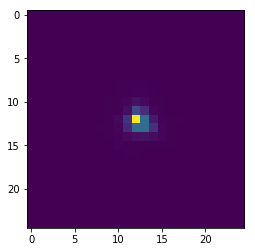

27 2 29
Box Size:  27 x 27
COM:  13.18143868945424 13.287503311586397
2dG:  13.22446120303378 13.181503634007436
958 63 



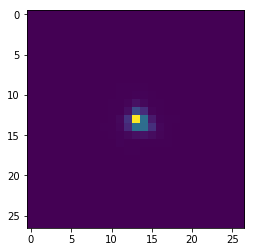

29 1 30
Box Size:  29 x 29
COM:  14.170010913983946 14.275221914884645
2dG:  14.224386447216187 14.181446245375477
959 63 



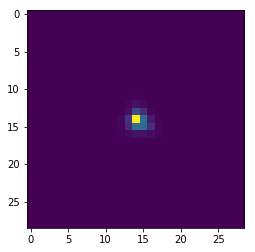

31 0 31
Box Size:  31 x 31
COM:  15.166971635871445 15.271118609667399
2dG:  15.224317709828457 15.181382543641044
960 63 



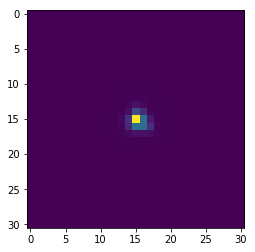

In [100]:
num = 0
# cen_2dg_x=[]
# cen_2dg_y=[]
# cen_com_x=[]
# cen_com_y=[]
centroid_com_arr_x = []
centroid_com_arr_y = []
centroid_2dG_arr_x = []
centroid_2dG_arr_y = []
time_i = 0
scale_num = 100
npix = 32
start_i = 3
steps_i = 2

# /////Original bottom code that measures both 2dg and COM x&y centroids.
for time_i in range(0,64):        
    for i_box in range(start_i,npix,steps_i):
        strt, end = slicing_im(npix,i_box)
        interval = PercentileInterval(scale_num) ###
        interval.get_limits(counts_image[time_i,strt:end,strt:end])
        scale_array = interval(counts_image[time_i,strt:end,strt:end])
        sliced_image = counts_image[0,strt:end,strt:end] 
        result = scale_array
        if i_box < 3:
            print('too small of an image to calculate\n')
        elif i_box >= 3:
            x1, y1 = centroid_com(result)
            x2, y2 = centroid_2dg(result)
            print(i_box,strt,end)
            print('Box Size: ', i_box,'x',i_box)
            print('COM: ',x1,y1)
            print('2dG: ',x2,y2)
            centroid_com_arr_x.append(x1)
            centroid_com_arr_y.append(y1)
            centroid_2dG_arr_x.append(x2)
            centroid_2dG_arr_y.append(y2)
#             if i_box == 31:
#                 cen_com_x.append(x1)
#                 cen_com_y.append(y1)
#                 cen_2dg_x.append(x2)
#                 cen_2dg_y.append(y2)
            num = num+1
            print(num,time_i,'\n')
            plt.imshow(result)
            plt.show()

# print(len(centroid_com_arr_x))
# print(centroid_com_arr_x[6]) 
# NOTE com is much faster than 2dg measurements. In this case, it must means that when measuring 
# the aperture photometry... its the com it uses.. not the 2dg. In fact I don't think we use 2dg at all.

In [9]:
#//--------------------------------------------------------------------------------
## //Original bottom code for both 2dc and com
def org_dict(dict_name,str_num_name,com_x,com_y,dg_x,dg_y):
    start_ind =0 
    end_ind = 15
    str_arr_list = ["cen_com_arr_x", "cen_com_arr_y","cen_2dg_arr_x","cen_2dg_arr_y"]
    dict_cen = dict_name
# puts each into a seperate array of 15 indexes
    for i in range(0,64):
        dict_cen[str_arr_list[0]+'_'+str(i)] = com_x[start_ind:end_ind]
        dict_cen[str_arr_list[1]+'_'+str(i)] = com_y[start_ind:end_ind]
        dict_cen[str_arr_list[2]+'_'+str(i)] = dg_x[start_ind:end_ind]
        dict_cen[str_arr_list[3]+'_'+str(i)] = dg_y[start_ind:end_ind]
        start_ind = start_ind + 15
        end_ind = end_ind+15
#creates an array of numbered names.
    str_num_arr=str_num_name
    for j in range(0,64):
        str_name_1 = str_arr_list[0]+'_'+str(j)
        str_name_2 = str_arr_list[1]+'_'+str(j)
        str_name_3 = str_arr_list[2]+'_'+str(j)
        str_name_4 = str_arr_list[3]+'_'+str(j)
        str_num_arr.append(str_name_1)
        str_num_arr.append(str_name_2)
        str_num_arr.append(str_name_3)
        str_num_arr.append(str_name_4)

str_num_arr=[]      
dict_cen = {}
org_dict(dict_cen,str_num_arr,centroid_com_arr_x,centroid_com_arr_y,centroid_2dG_arr_x,centroid_2dG_arr_y)
# print(str_num_arr)
# print(dict_cen)

# print(dict_cen[str_num_arr[2]][14])
# print(dict_cen['cen_2dg_arr_x_1'][2])

# print(dict_cen[str_num_arr[4]][6])
# print(dict_cen[str_num_arr[5]][6])
# print(str_num_arr)
# print(dict_cen['cen_2dg_arr_x_0'])
# dict_cen[str_num_arr[2]][14]
# str_num_arr

In [11]:
r_1 = 7
r_2 = 11
r_3 = 14
# # 8,13,23
h_2dg = 2 ## starting index for 2dG
index_box = 14 ##box size of 7x7
photometry_arr =[]
for l in range(0,64):
    aperture_1 = aperture_sum(r_1,counts_image[l,:,:], dict_cen[str_num_arr[h_2dg]][index_box], dict_cen[str_num_arr[h_2dg+1]][index_box]) 
    aperture_2 = aperture_sum(r_2,counts_image[l,:,:], dict_cen[str_num_arr[h_2dg]][index_box], dict_cen[str_num_arr[h_2dg+1]][index_box])
    aperture_3 = aperture_sum(r_3,counts_image[l,:,:], dict_cen[str_num_arr[h_2dg]][index_box], dict_cen[str_num_arr[h_2dg+1]][index_box])
## Area of aperture,
    area_1 = math.pi * r_1**2

## Background in annulus from r_2 to r_3
    background_counts = aperture_3 - aperture_2
    
## Area of Annulus
    area_2 = math.pi*(r_3**2 - r_2**2) #also known as npix

## subtracting background: 
    backgrnd_subtract = aperture_1 - background_counts*area_1/area_2
    photometry_arr.append(backgrnd_subtract)
#     h = h+4
    h_2dg = h_2dg+4


## final aperture photometry value of the time index
# print(len(photometry_arr))
print(photometry_arr)
# print(aperture_3)

# #-------------------------------------------------------------------------------------------------


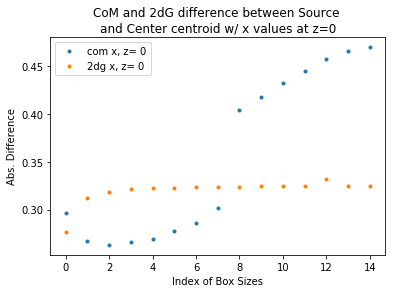

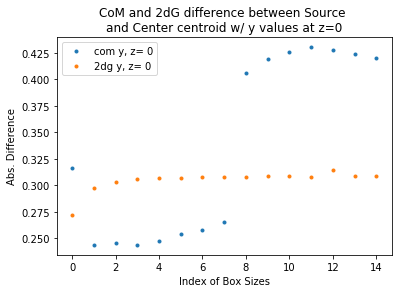

In [92]:
def cen_boxsize_diff(xy,nmb):
#     This calls any x/y centroid array that measures the centroid 
#      from 3x3 to 31x31 for any time frame (z).
#     xy: calls for array that has index for only x or y 
#     nmb: calls for an array at a certain time frame.
    com=dict_cen['cen_com_arr_'+xy+'_'+str(nmb)]
    dg=dict_cen['cen_2dg_arr_'+xy+'_'+str(nmb)]
    array_com=[]
    array_dg = []
    for i in range(len(com)):
#         This box_size variable starts on a 
#         pixel size of 3x3 and jumps by odds (by adding 2)
#         until it reaches the full pixel size
#         (in this case, the closest would 31x31)
        box_size=(3+2*i)
        subtr_com = com[i] -box_size/2 #taking the difference of centroids
        subtr_2dg = dg[i]-box_size/2
        abs_com = np.abs(subtr_com)
        abs_2dg = np.abs(subtr_2dg)
        array_com.append(abs_com)
        array_dg.append(abs_2dg)
#         print('i = '+str(i))
#         print(str(box_size)+'x'+str(box_size))
#         print('abs of subtracting COM center:'+str(abs_com))
#         print('abs of subtracting 2dG center:'+str(abs_2dg),'\n')
    plt.title('CoM and 2dG difference between Source \nand Center centroid w/ '+ str(xy)+' values at z='+str(nmb))    
    plt.plot(array_com,'.',label='com '+str(xy)+', z= '+str(nmb))
    plt.plot(array_dg,'.',label='2dg '+str(xy)+', z= '+str(nmb))
    plt.xlabel('Index of Box Sizes')
    plt.ylabel('Abs. Difference')
    plt.legend(loc='upper left')
    
# Calls the definition in order to run it
cen_boxsize_diff('x',0)
plt.show()
cen_boxsize_diff('y',00)


In [13]:
# array1=[]
# j=1
# plt.figure(figsize=(15,10))
# for i in range(len(centroid_com_arr_x)):
#     test = centroid_com_arr_x[i] - centroid_2dG_arr_x[i]
# #     print(test)
#     array1.append(test)

# plt.plot(array1)
# plt.ylim([-0.2,.1])# x=400 # plt.xlim([x,x+15])# print(dict_cen[str_num_arr[0]][5])

# same_num=14
# print(array[same_num])
# # print(dict_cen['cen_com_arr_'+xy+'_'+str(nmb)][14],dict_cen['cen_2dg_arr_'+xy+'_'+str(nmb)][14])
# test = dict_cen['cen_com_arr_'+xy+'_'+str(nmb)][same_num]-dict_cen['cen_2dg_arr_'+xy+'_'+str(nmb)][same_num]
# print(test)

# # print(ex1,'\n\n',ex2)
# plt.title('CoM and 2dg difference for '+xy+' values at z='+str(nmb))
# plt.xlabel('2D Gaussian values (2dg)')
# plt.ylabel('Center of Mass values (CoM)')
# plt.plot(dg2,com1,'.')
# plt.show()
# plt.plot(centroid_com_arr_x,centroid_2dG_arr_x,'.') 

# test = centroid_com_arr_x[i] - centroid_2dG_arr_x[i]
# plt.plot(test,'.')

# =-----
# xy='y'
# nmb=0
# com=dict_cen['cen_com_arr_'+xy+'_'+str(nmb)]
# dg=dict_cen['cen_2dg_arr_'+xy+'_'+str(nmb)]
# array=[]
# i=0
# for i in range(len(com)):
#     test = com[i] - dg[i]
# #     print(test)
#     array.append(test)
#     plt.title('CoM and 2dg difference for '+xy+' values at z='+str(nmb))
# plt.plot(array)
# ###--------
# # test_2('y',0)
# c pickle 
# plt.plot(com)
# print(com)

<Figure size 1080x720 with 0 Axes>